# Part I: Data Exploration
We need to explore the dataset, find relationship between feature, discover how we should format or modify the dataset for the prediction analysis.

In [1]:
import numpy as np
import pandas
import seaborn

from matplotlib import pyplot as plt
from numpy import log1p

In [2]:
# Load dataset
data = pandas.read_csv('AmesHousing.csv', index_col="Order")

# Display dataset
data

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Order                                                                          
1      526301100           20        RL         141.0     31770   Pave   NaN   
2      526350040           20        RH          80.0     11622   Pave   NaN   
3      526351010           20        RL          81.0     14267   Pave   NaN   
4      526353030           20        RL          93.0     11160   Pave   NaN   
5      527105010           60        RL          74.0     13830   Pave   NaN   
...          ...          ...       ...           ...       ...    ...   ...   
2926   923275080           80        RL          37.0      7937   Pave   NaN   
2927   923276100           20        RL           NaN      8885   Pave   NaN   
2928   923400125           85        RL          62.0     10441   Pave   NaN   
2929   924100070           20        RL          77.0     10010   Pave   NaN   
2930   924151050           60        RL          74.0      9627   Pave   NaN   

      Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
Order                                   ...                            
1           IR1          Lvl    AllPub  ...         0     NaN    NaN   
2           Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
3           IR1          Lvl    AllPub  ...         0     NaN    NaN   
4           Reg          Lvl    AllPub  ...         0     NaN    NaN   
5           IR1          Lvl    AllPub  ...         0     NaN  MnPrv   
...         ...          ...       ...  ...       ...     ...    ...   
2926        IR1          Lvl    AllPub  ...         0     NaN  GdPrv   
2927        IR1          Low    AllPub  ...         0     NaN  MnPrv   
2928        Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2929        Reg          Lvl    AllPub  ...         0     NaN    NaN   
2930        Reg          Lvl    AllPub  ...         0     NaN    NaN   

      Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
Order                                                                    
1              NaN        0       5    2010        WD           Normal   
2              NaN        0       6    2010        WD           Normal   
3             Gar2    12500       6    2010        WD           Normal   
4              NaN        0       4    2010        WD           Normal   
5              NaN        0       3    2010        WD           Normal   
...            ...      ...     ...     ...        ...             ...   
2926           NaN        0       3    2006        WD           Normal   
2927           NaN        0       6    2006        WD           Normal   
2928          Shed      700       7    2006        WD           Normal   
2929           NaN        0       4    2006        WD           Normal   
2930           NaN        0      11    2006        WD           Normal   

       SalePrice  
Order             
1         215000  
2         105000  
3         172000  
4         244000  
5         189900  
...          ...  
2926      142500  
2927      131000  
2928      132000  
2929      170000  
2930      188000  

[2930 rows x 81 columns]

### Data Preprocessingn
Quality Issues & Implementation Fixes

1. Handling Missing Values
LotFrontage (490 missing values)
Fix: Fill missing values using the median LotFrontage per neighborhood.
    
- Garage-related Features (GarageCars, GarageArea, GarageYrBlt, GarageType, etc.)
Fix: Replace missing values with 0 for numeric features and "None" for categorical.

- Basement Features (TotalBsmtSF, BsmtQual, BsmtCond, etc.)
Fix: Set numeric missing values to 0 and categorical ones to "None".
    
2. Handling Outliers
GrLivArea Outliers (Very large houses)
Fix: Remove outliers where GrLivArea > 4000 (identified in previous analysis).

3. Handling Skewed Data
Highly skewed features: SalePrice, LotArea, GrLivArea, TotalBsmtSF
Fix: Apply log transformation to normalize the distribution.

In [3]:
# Fill missing Lot Frontage values with the median per Neighborhood
data.loc[:, "Lot Frontage"] = data.groupby("Neighborhood")["Lot Frontage"].transform(lambda x: x.fillna(x.median()))

# Handle missing garage-related features
garage_features = ["Garage Cars", "Garage Area", "Garage Yr Blt", "Garage Type"]
for feature in garage_features:
    if data[feature].dtype == "object":
        data.loc[:, feature] = data[feature].fillna("None")
    else:
        data.loc[:, feature] = data[feature].fillna(0)

# Handle missing basement-related features
basement_features = ["Total Bsmt SF", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure"]
for feature in basement_features:
    if data[feature].dtype == "object":
        data.loc[:, feature] = data[feature].fillna("None")
    else:
        data.loc[:, feature] = data[feature].fillna(0)

# Remove extreme outliers in GrLivArea (above 4000 sqft)
data = data[data["Gr Liv Area"] < 4000].copy()

# Apply log transformation to normalize highly skewed features
skewed_features = ["SalePrice", "Lot Area", "Gr Liv Area", "Total Bsmt SF"]
for feature in skewed_features:
    data.loc[:, feature] = log1p(data[feature])


In [4]:
#Check the data preprocessing
data.info()  # Check if missing values are gone
data.describe()  # Ensure transformations were applied

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2922 non-null   float64
 4   Lot Area         2925 non-null   float64
 5   Street           2925 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2925 non-null   object 
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   object 
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   object 
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual     29

PID  MS SubClass  Lot Frontage     Lot Area  Overall Qual  \
count  2.925000e+03  2925.000000   2922.000000  2925.000000   2925.000000   
mean   7.143931e+08    57.396581     69.297741     9.090148      6.088205   
std    1.887274e+08    42.668752     21.142528     0.508309      1.402953   
min    5.263011e+08    20.000000     21.000000     7.170888      1.000000   
25%    5.284770e+08    20.000000     60.000000     8.914492      5.000000   
50%    5.354532e+08    50.000000     70.000000     9.151545      6.000000   
75%    9.071801e+08    70.000000     80.000000     9.351493      7.000000   
max    1.007100e+09   190.000000    313.000000    12.279537     10.000000   

       Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
count   2925.000000  2925.000000     2925.000000   2902.000000   2924.000000   
mean       5.563761  1971.302906     1984.234188    100.710544    438.097469   
std        1.112262    30.242474       20.861774    176.034290    438.032289   
min        1.000000  1872.000000     1950.000000      0.000000      0.000000   
25%        5.000000  1954.000000     1965.000000      0.000000      0.000000   
50%        5.000000  1973.000000     1993.000000      0.000000    369.500000   
75%        6.000000  2001.000000     2004.000000    164.000000    733.250000   
max        9.000000  2010.000000     2010.000000   1600.000000   2288.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2925.000000    2925.000000     2925.000000  2925.000000   
mean   ...     93.392137      47.166838       23.050940     2.596923   
std    ...    126.034142      66.571810       64.186809    25.162589   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2925.000000  2925.000000   2925.000000  2925.000000  2925.000000   
mean      16.029402     1.893333     44.909744     6.216752  2007.791453   
std       56.131397    32.964272    472.237990     2.711541     1.317408   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  15500.000000    12.000000  2010.000000   

         SalePrice  
count  2925.000000  
mean     12.019887  
std       0.406013  
min       9.456419  
25%      11.771444  
50%      11.982935  
75%      12.271397  
max      13.345509  

[8 rows x 38 columns]

In [5]:
# Function to map categorical features to int
def generate_ordinal_encoding(column):
    values = column.unique()
    mapping = {i: values[i] for i in range(len(values))}
    return mapping

def generate_ordinal_encoding_for_all_columns(dataset):
    encoding = {}
    for column in dataset.columns:
        if dataset[column].dtype == object:
            encoding[column] = generate_ordinal_encoding(dataset[column])
    return encoding

def apply_ordinal_encoding_to_all_columns(dataset, columns_dict):
    for column in columns_dict:
        dataset[column] = dataset[column].map({v: k for k, v in columns_dict[column].items()})

def apply_onehot_encoding(column):
    encoding = {}
    for feature in column.unique():
        encoding[feature] = column.apply(lambda x: x == feature)
    return pandas.DataFrame(encoding, index=column.index)

# Function to draw correlation matrix
def draw_correlation_matrix(dataset, figsize=None, title="Correlation Heatmap"):
    if figsize:
        plt.figure(figsize=figsize)
    seaborn.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
    plt.title(title)
    plt.show()

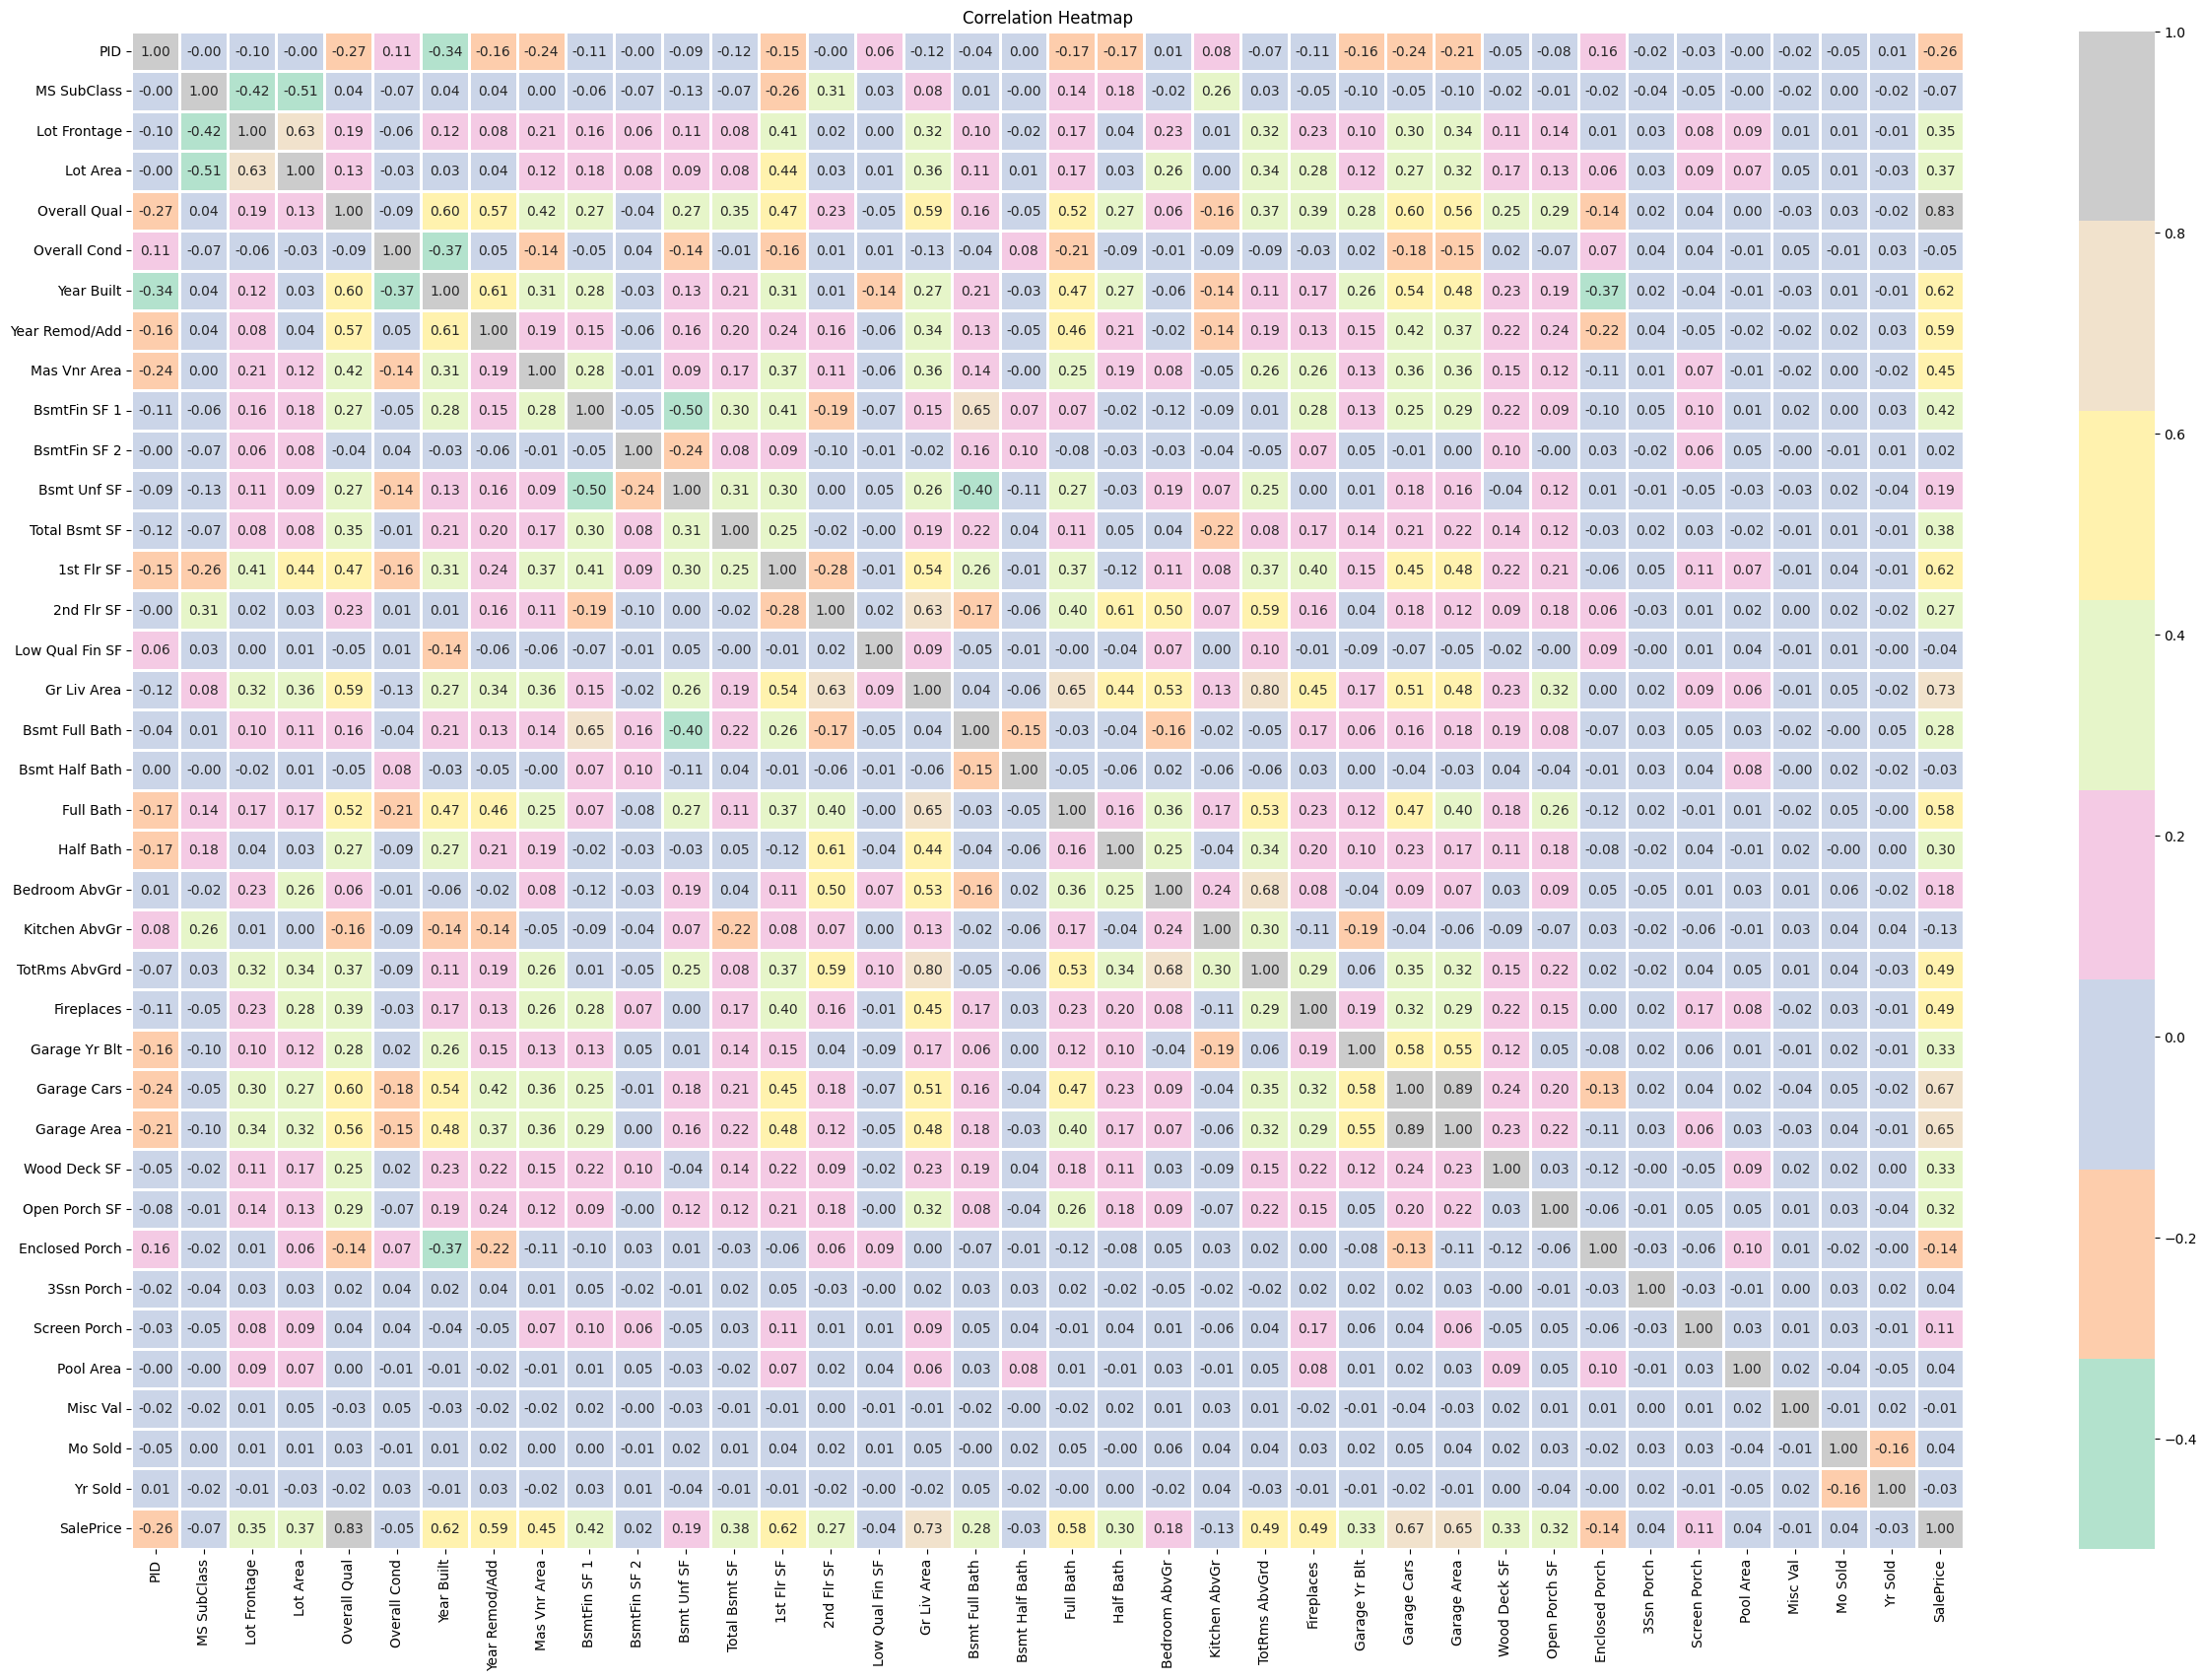

In [6]:
# Draw correlation matrix for numerical features
draw_correlation_matrix(data.select_dtypes(include=[np.number]), figsize=(30, 20))

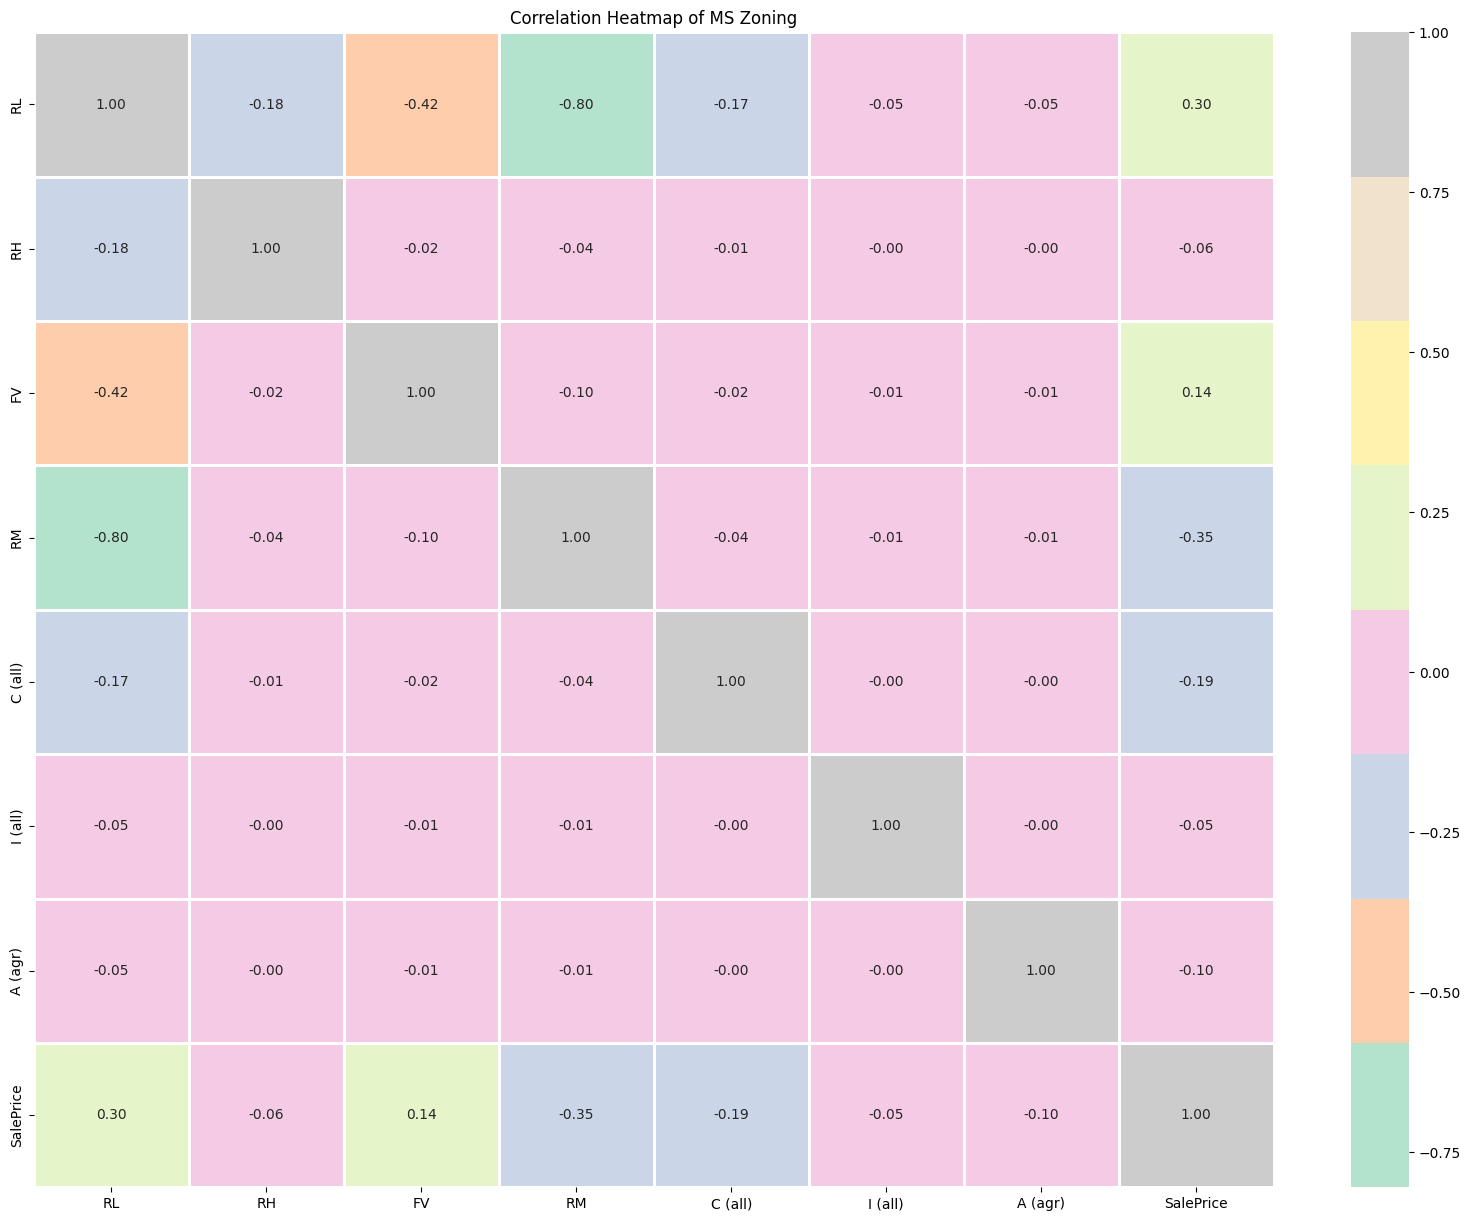

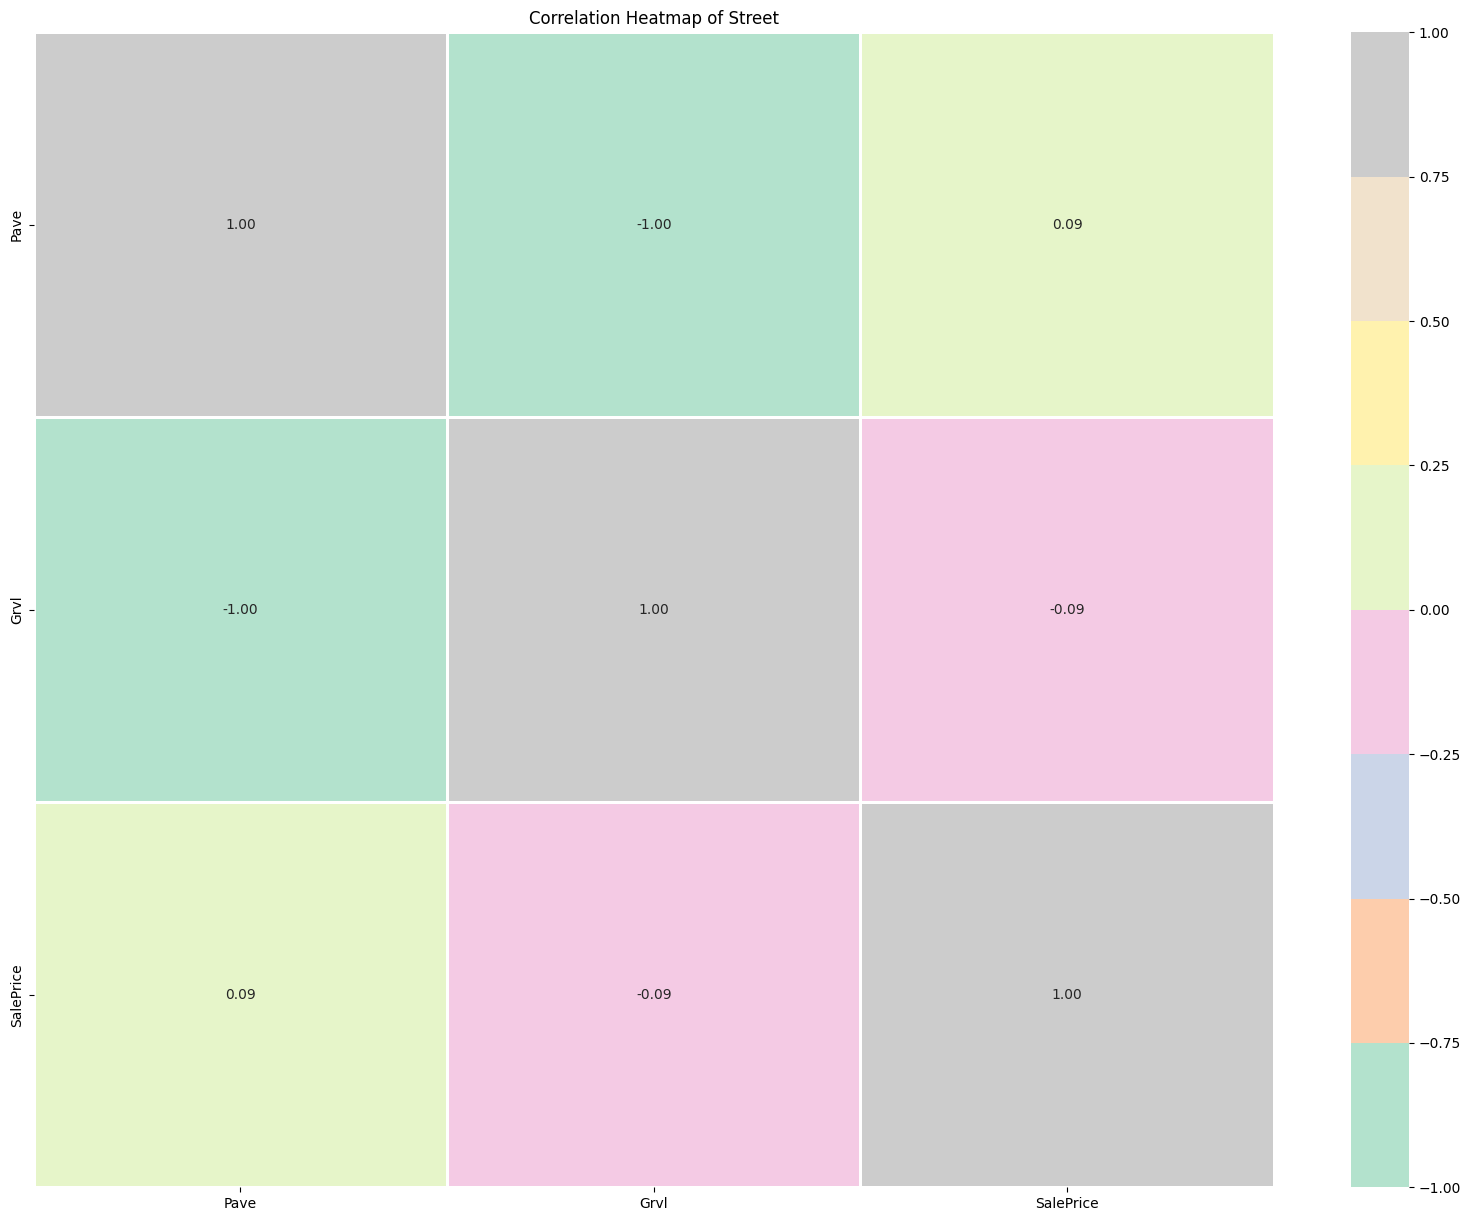

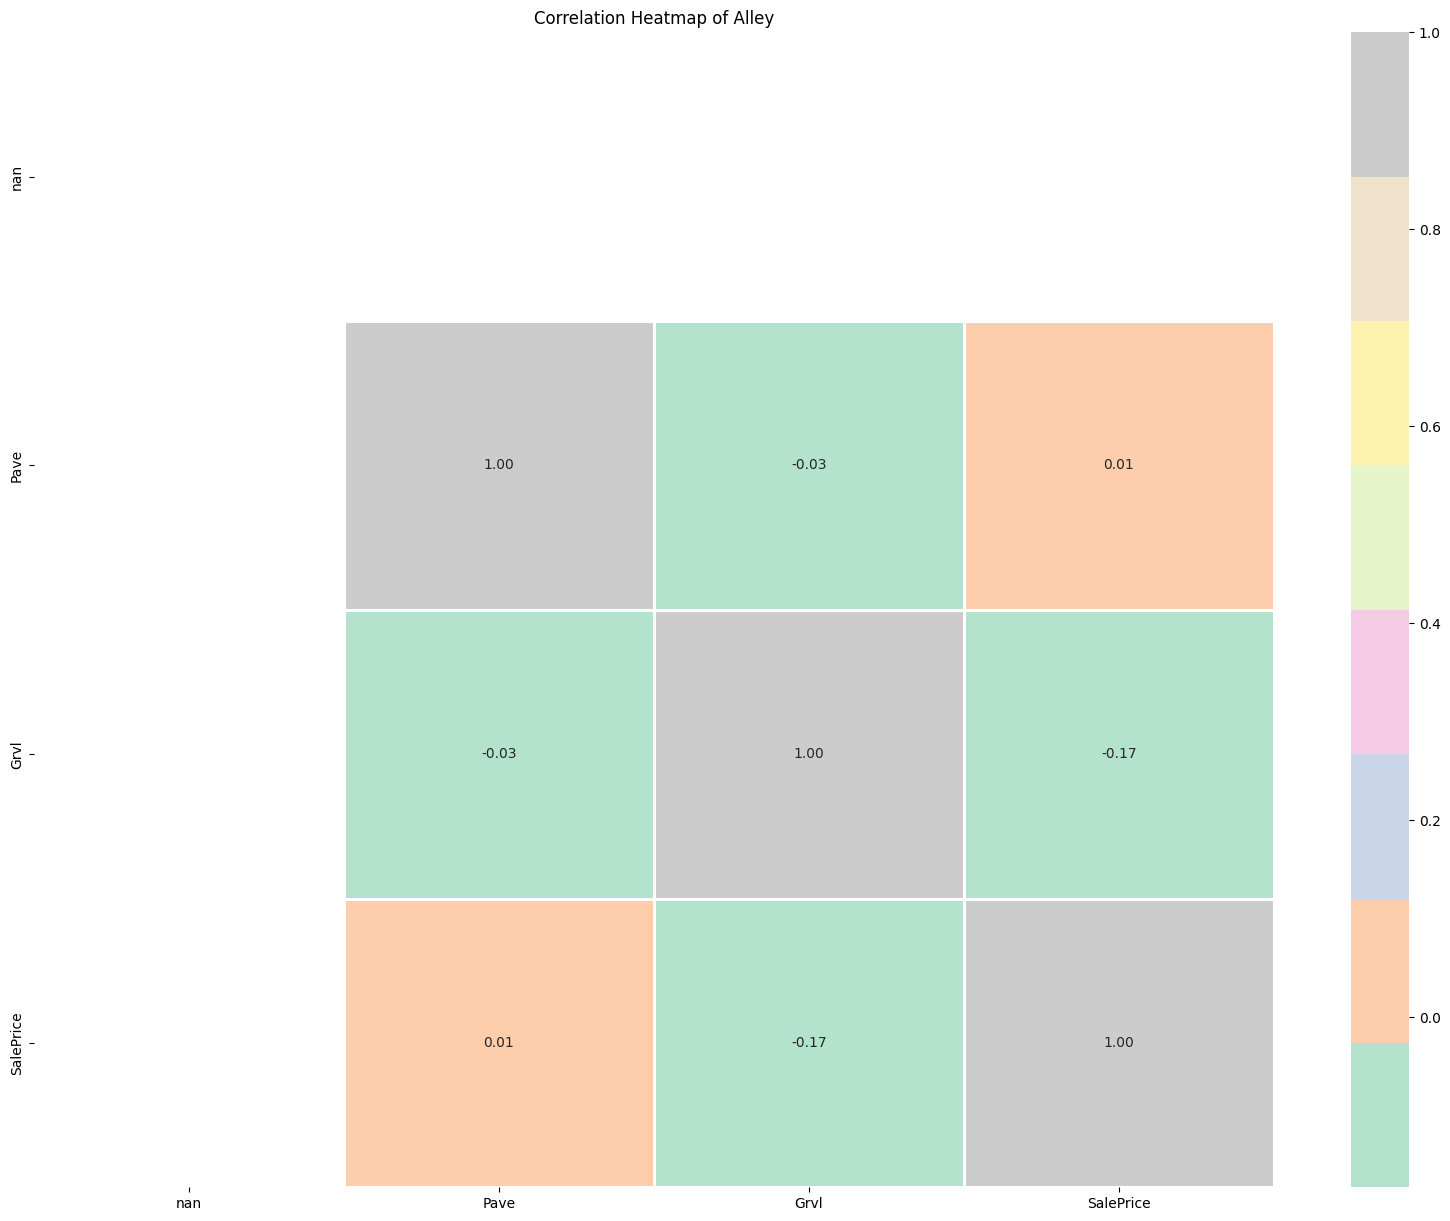

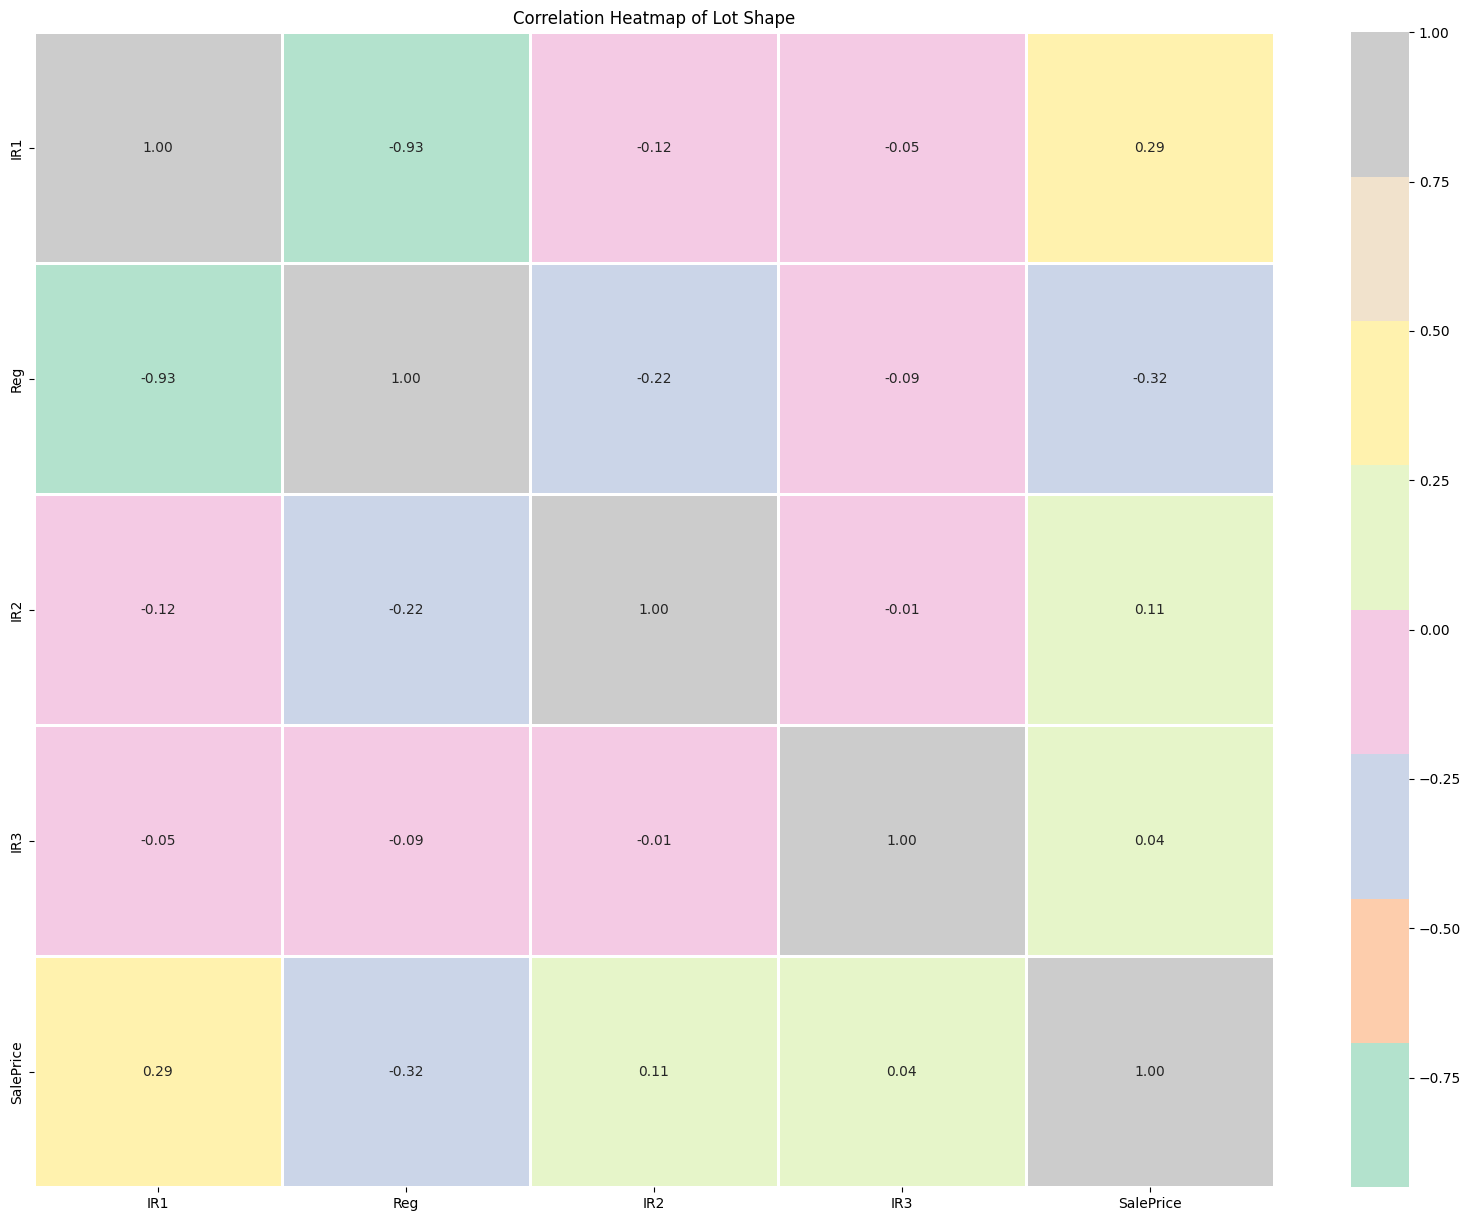

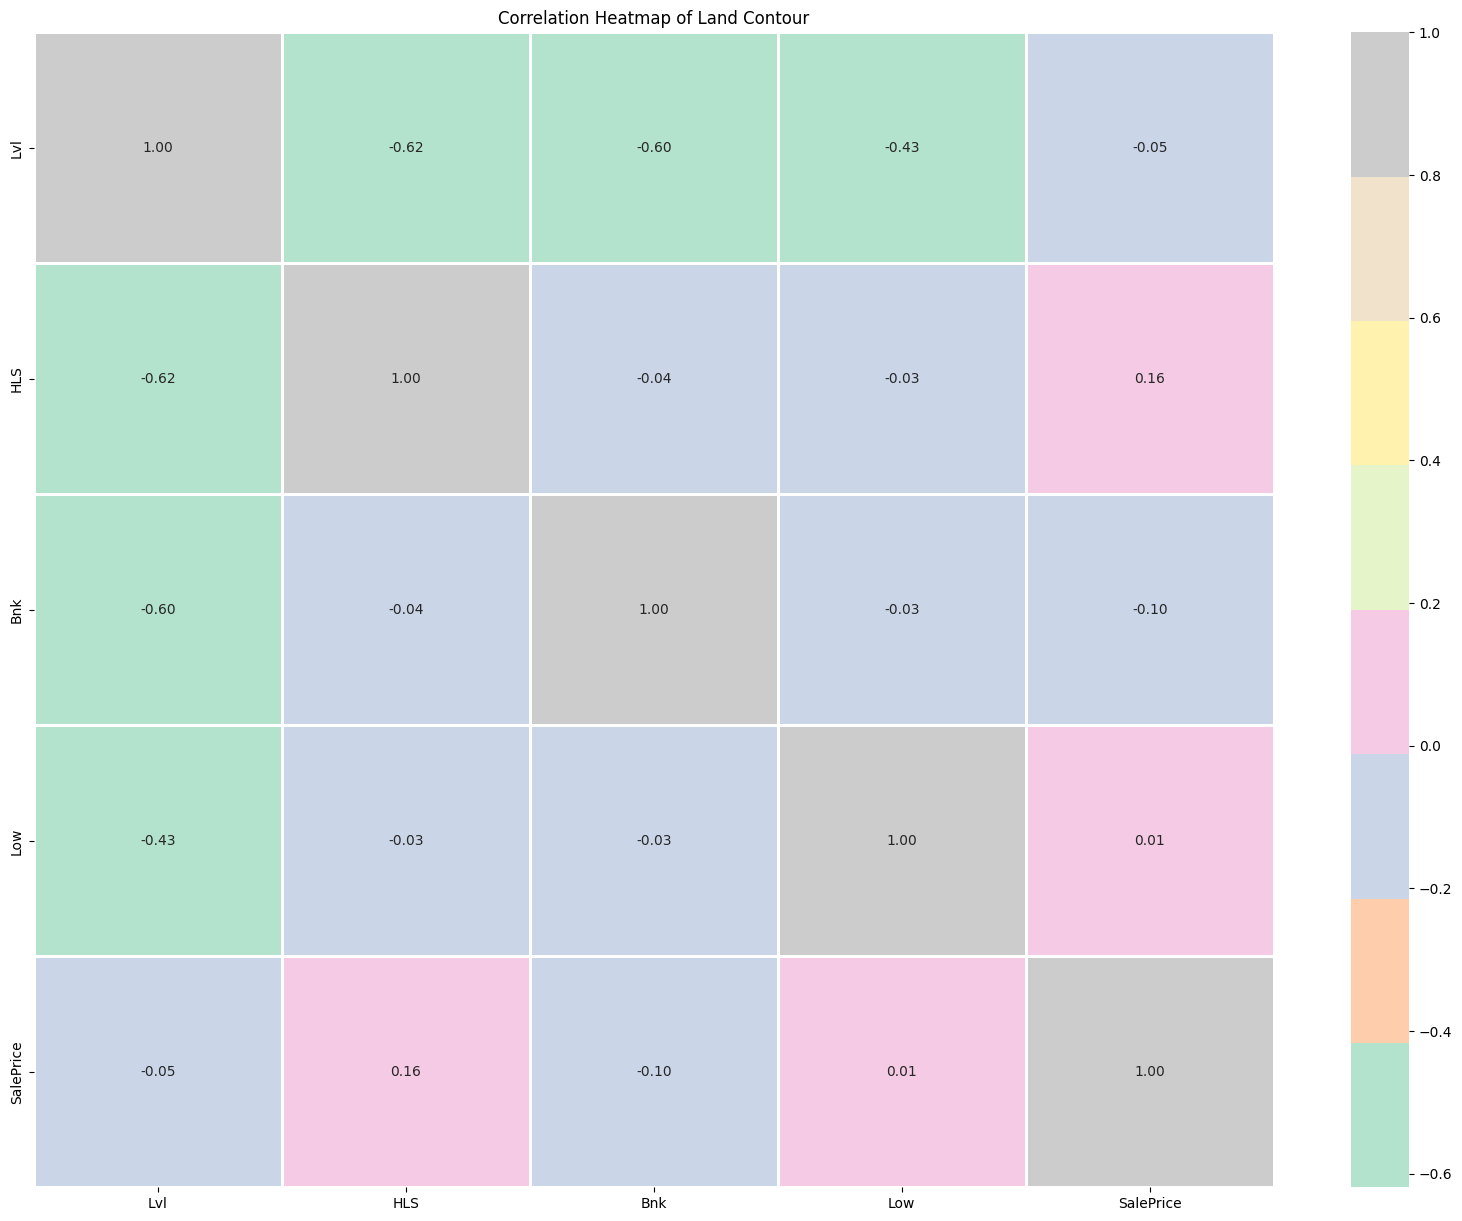

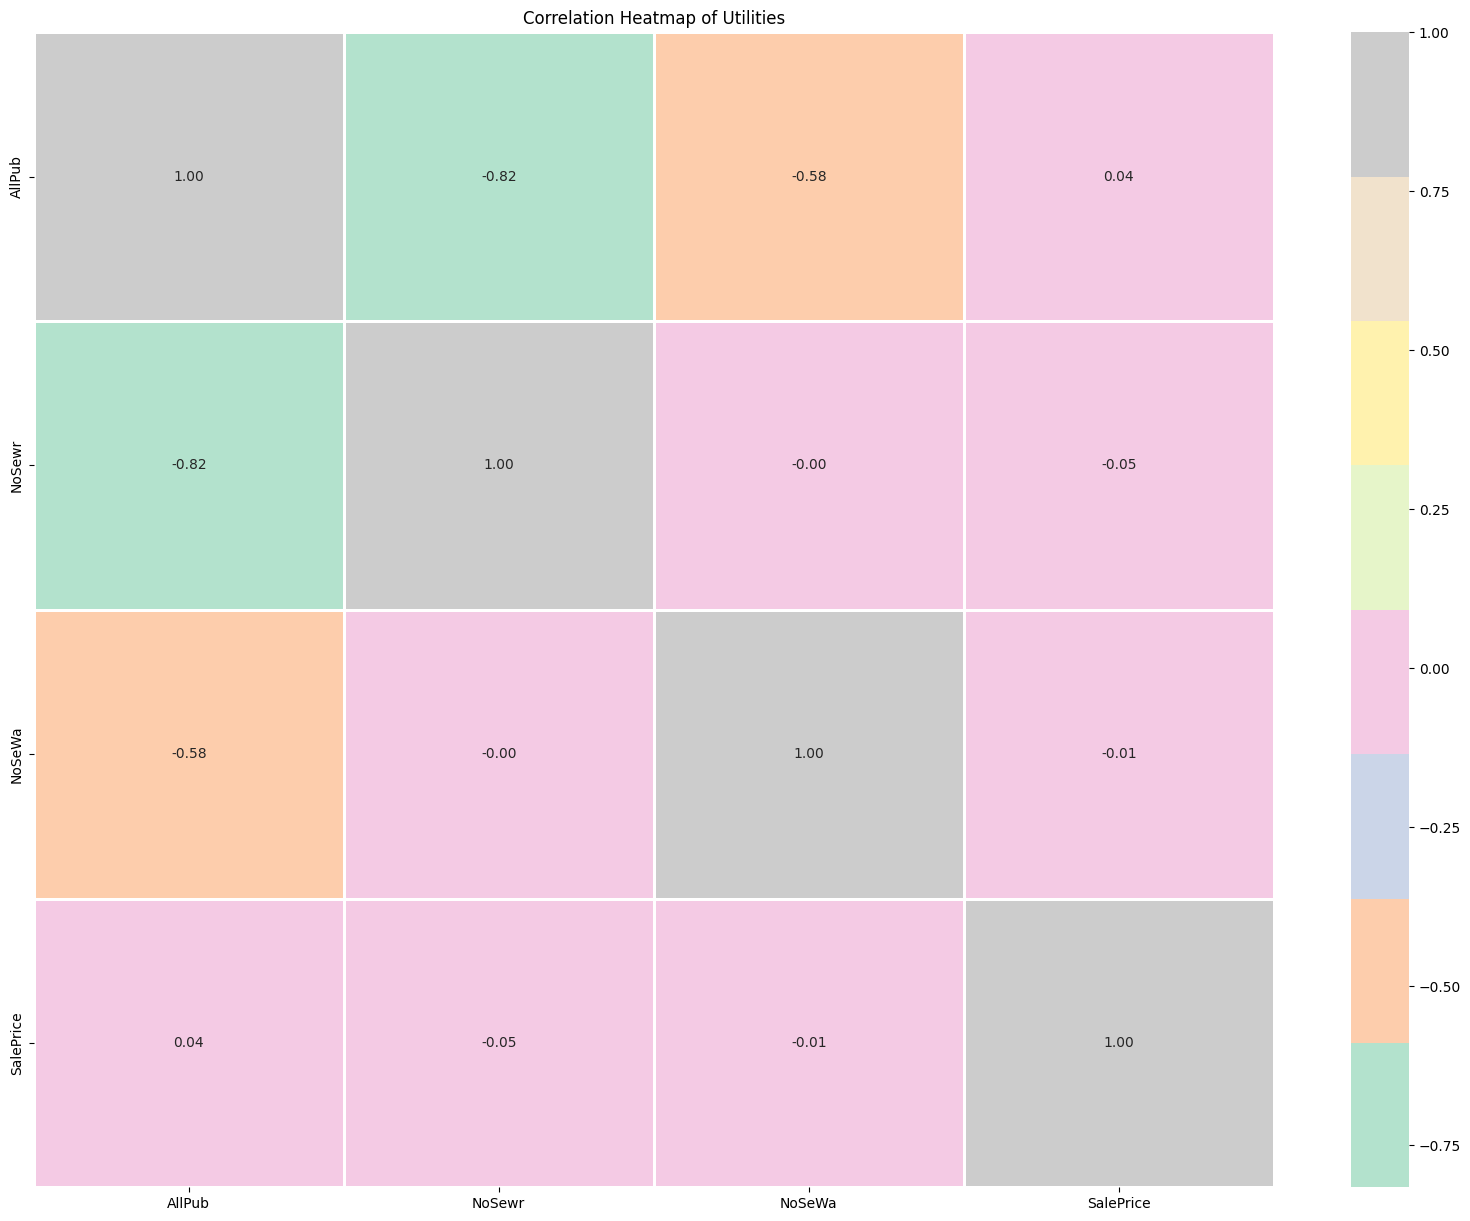

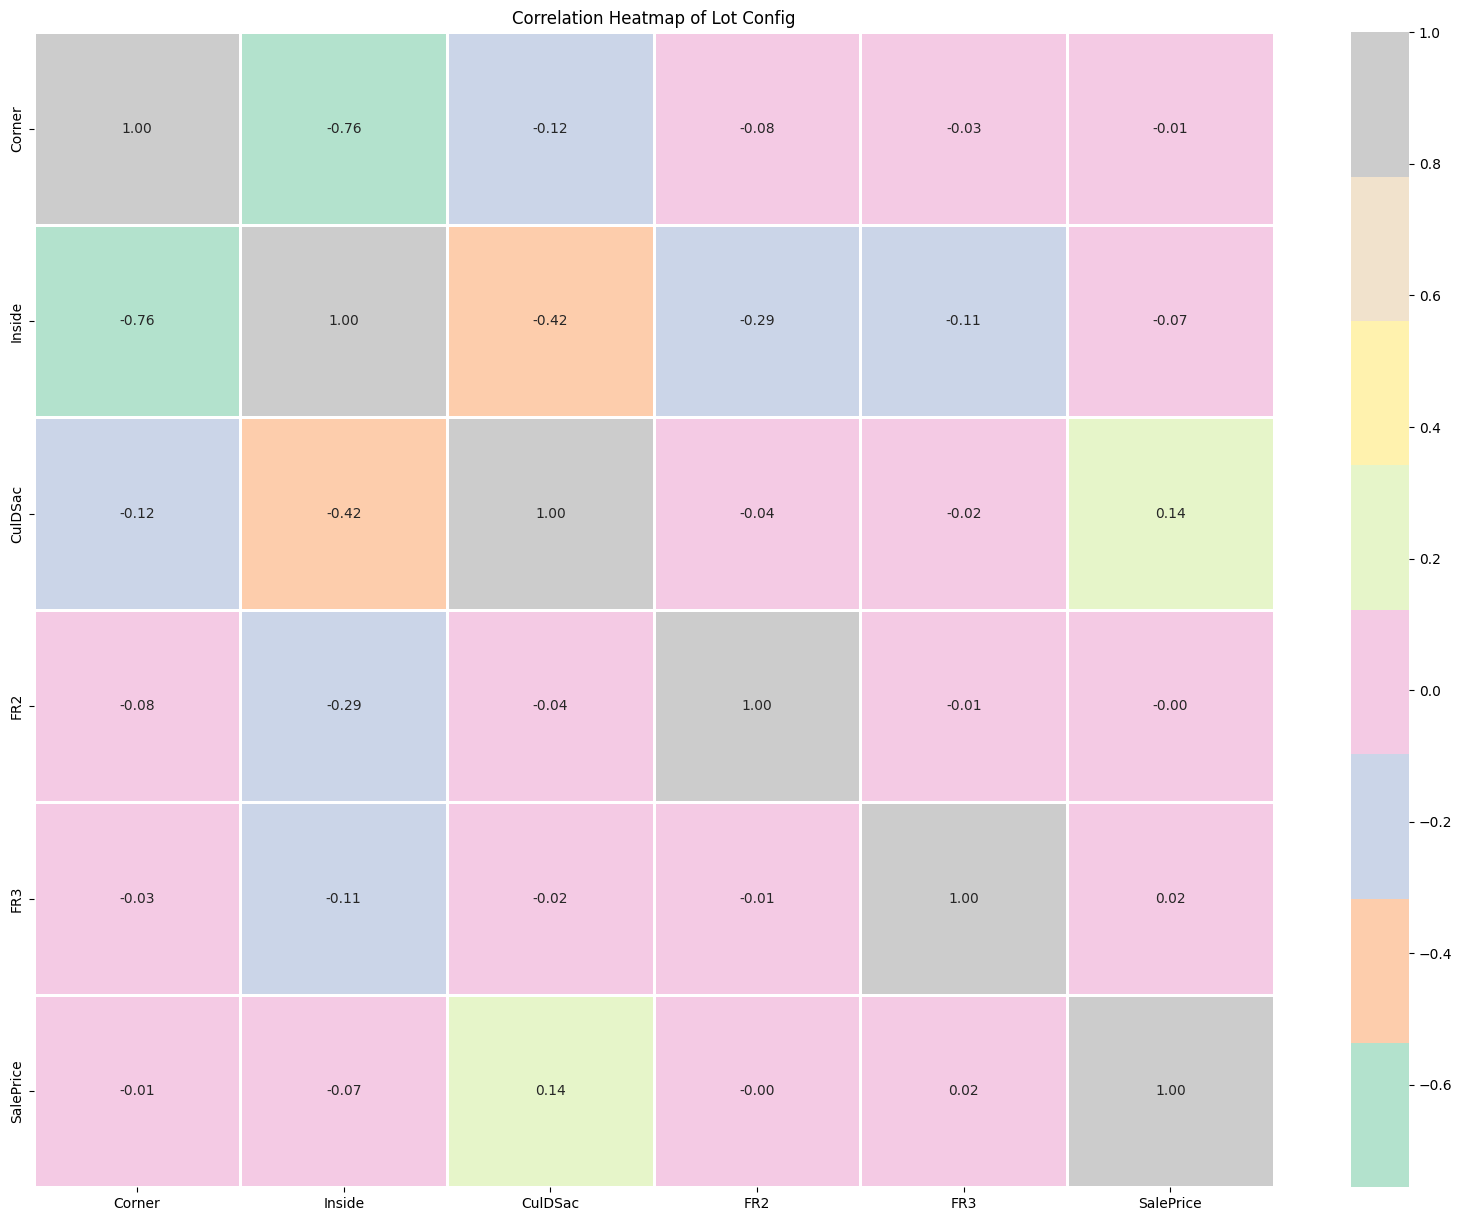

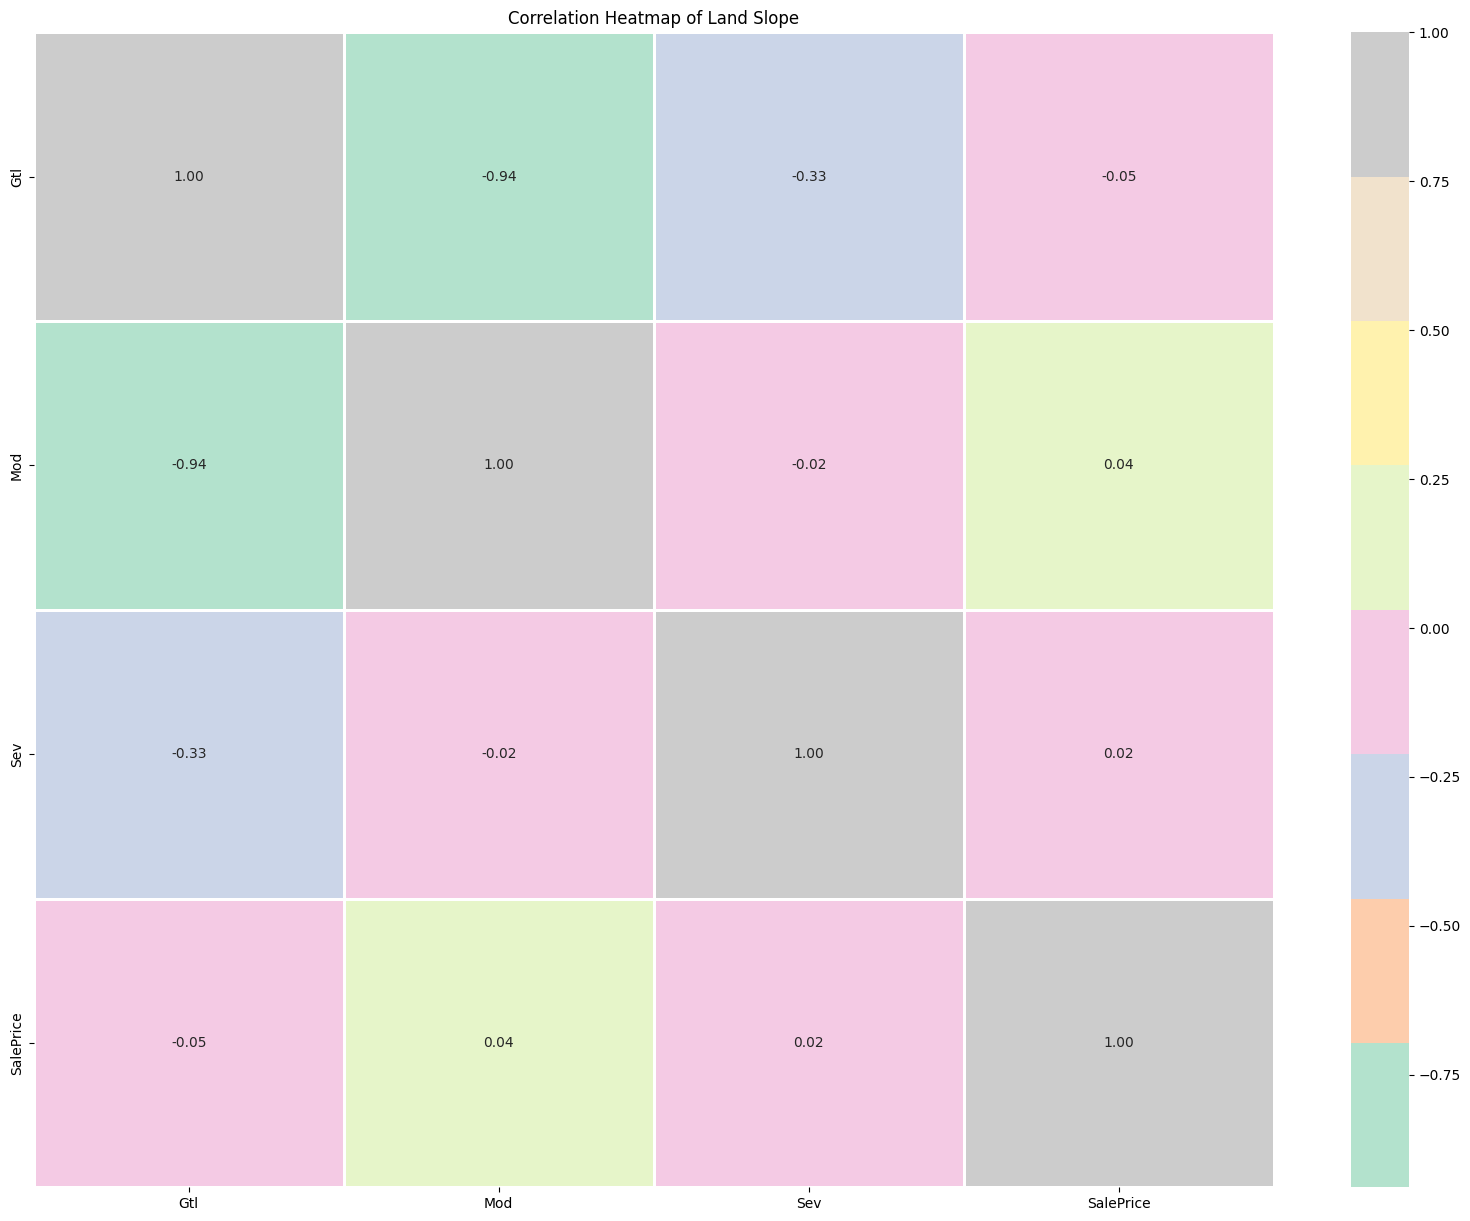

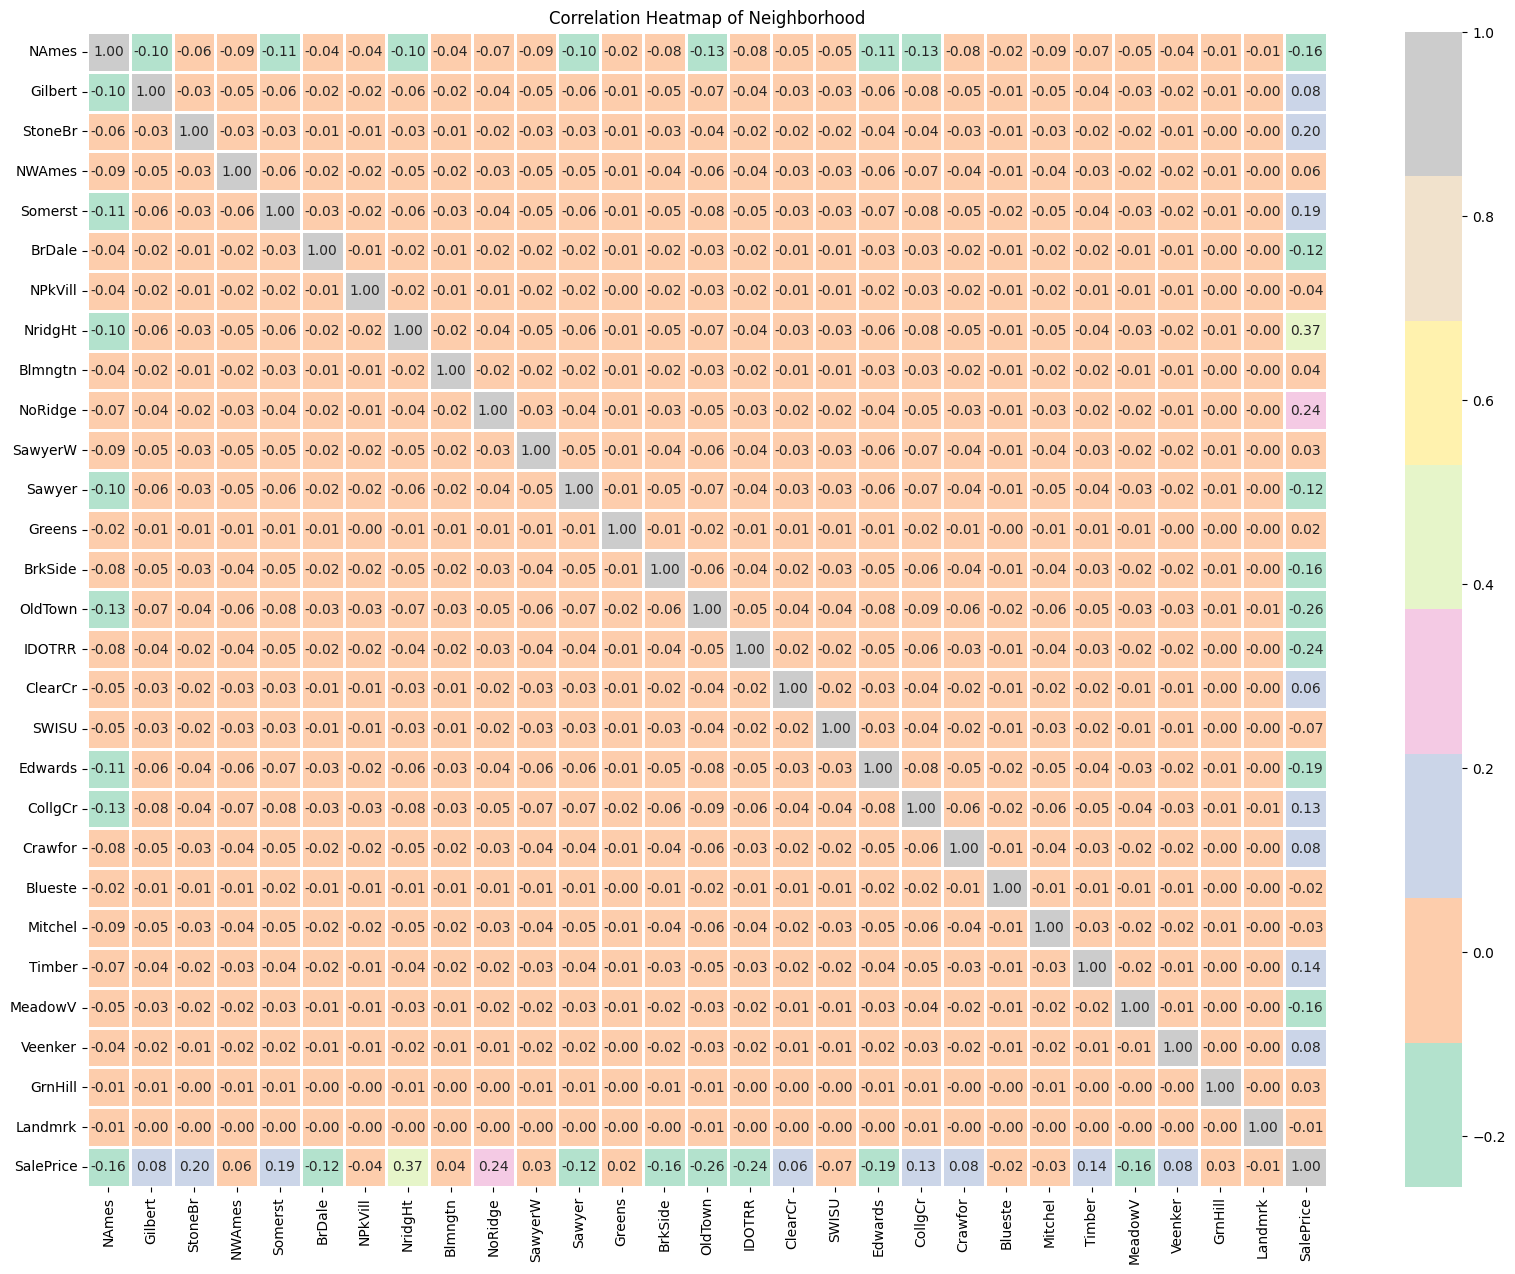

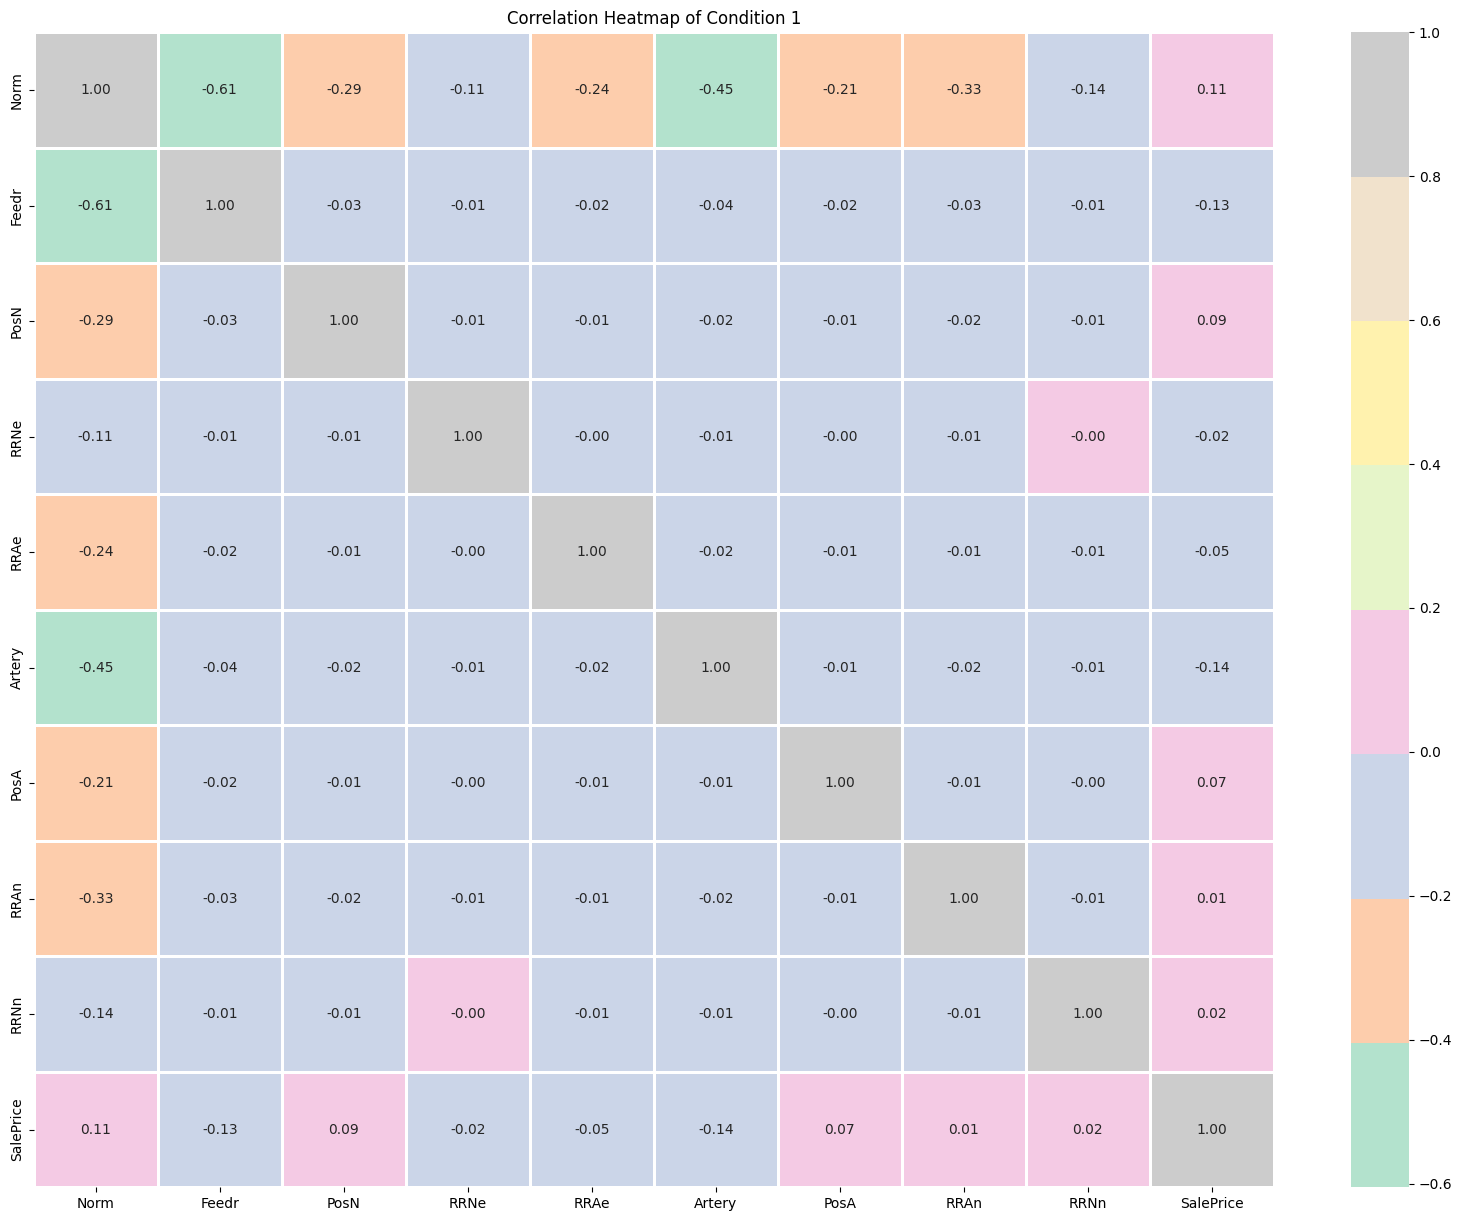

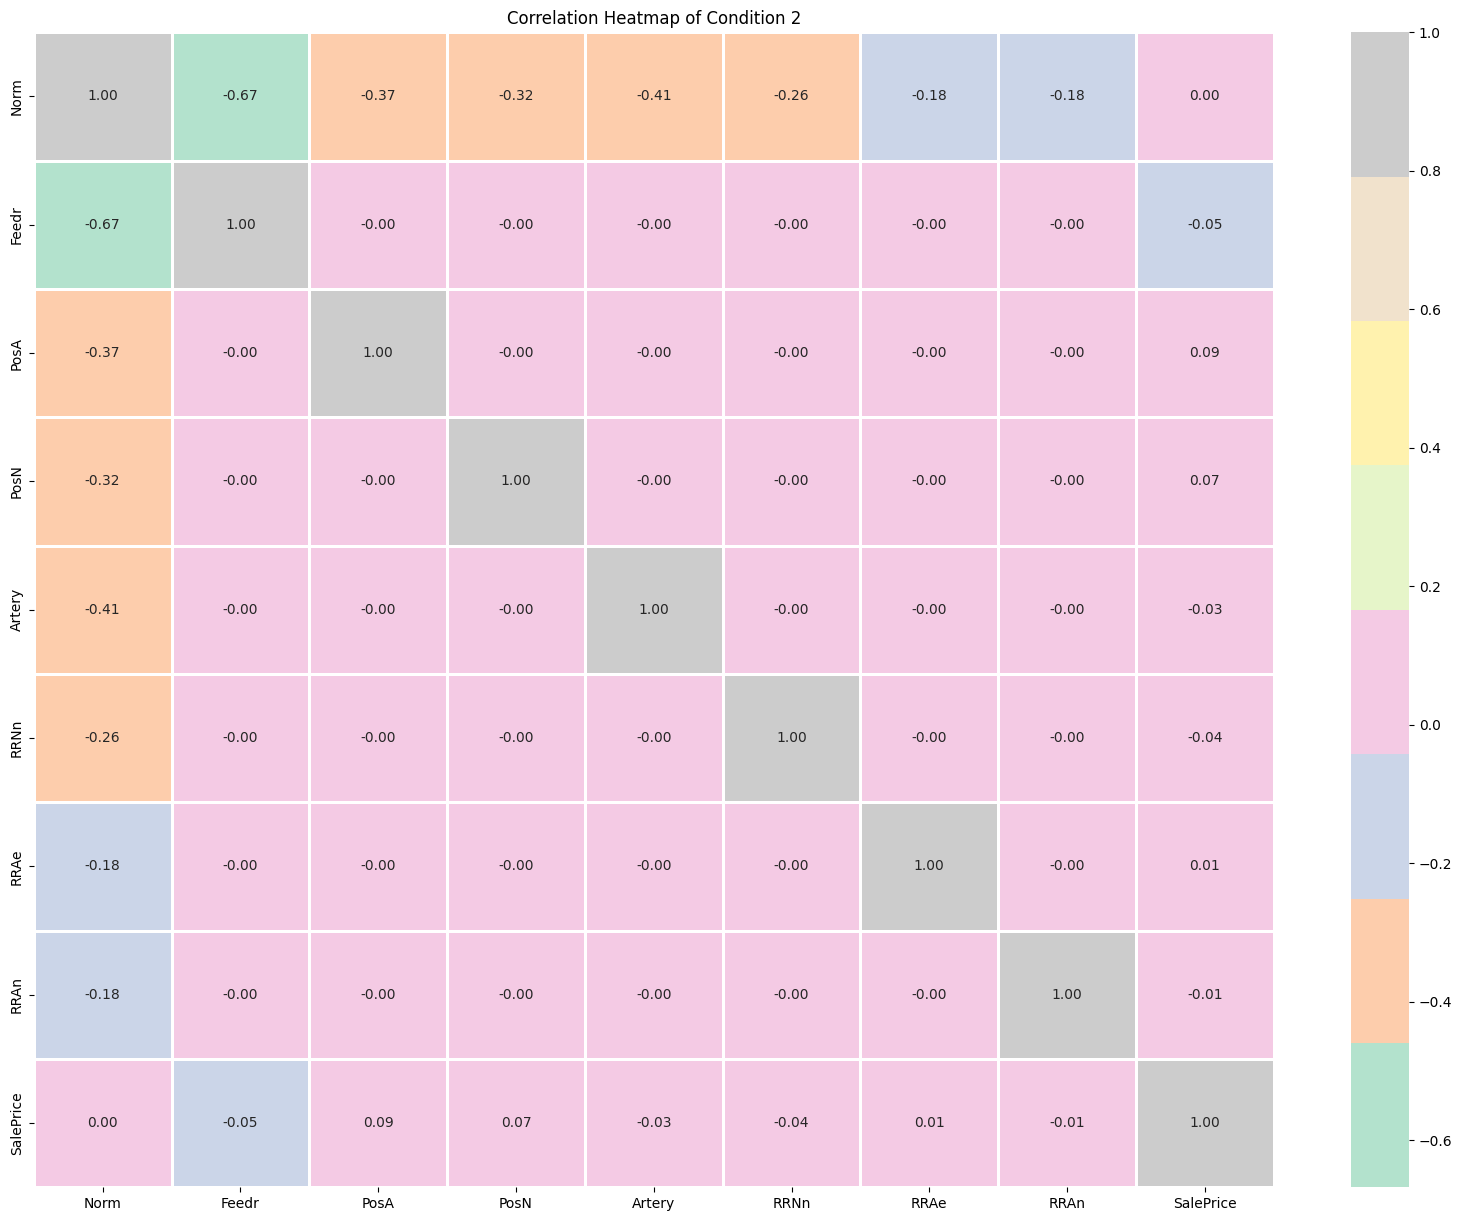

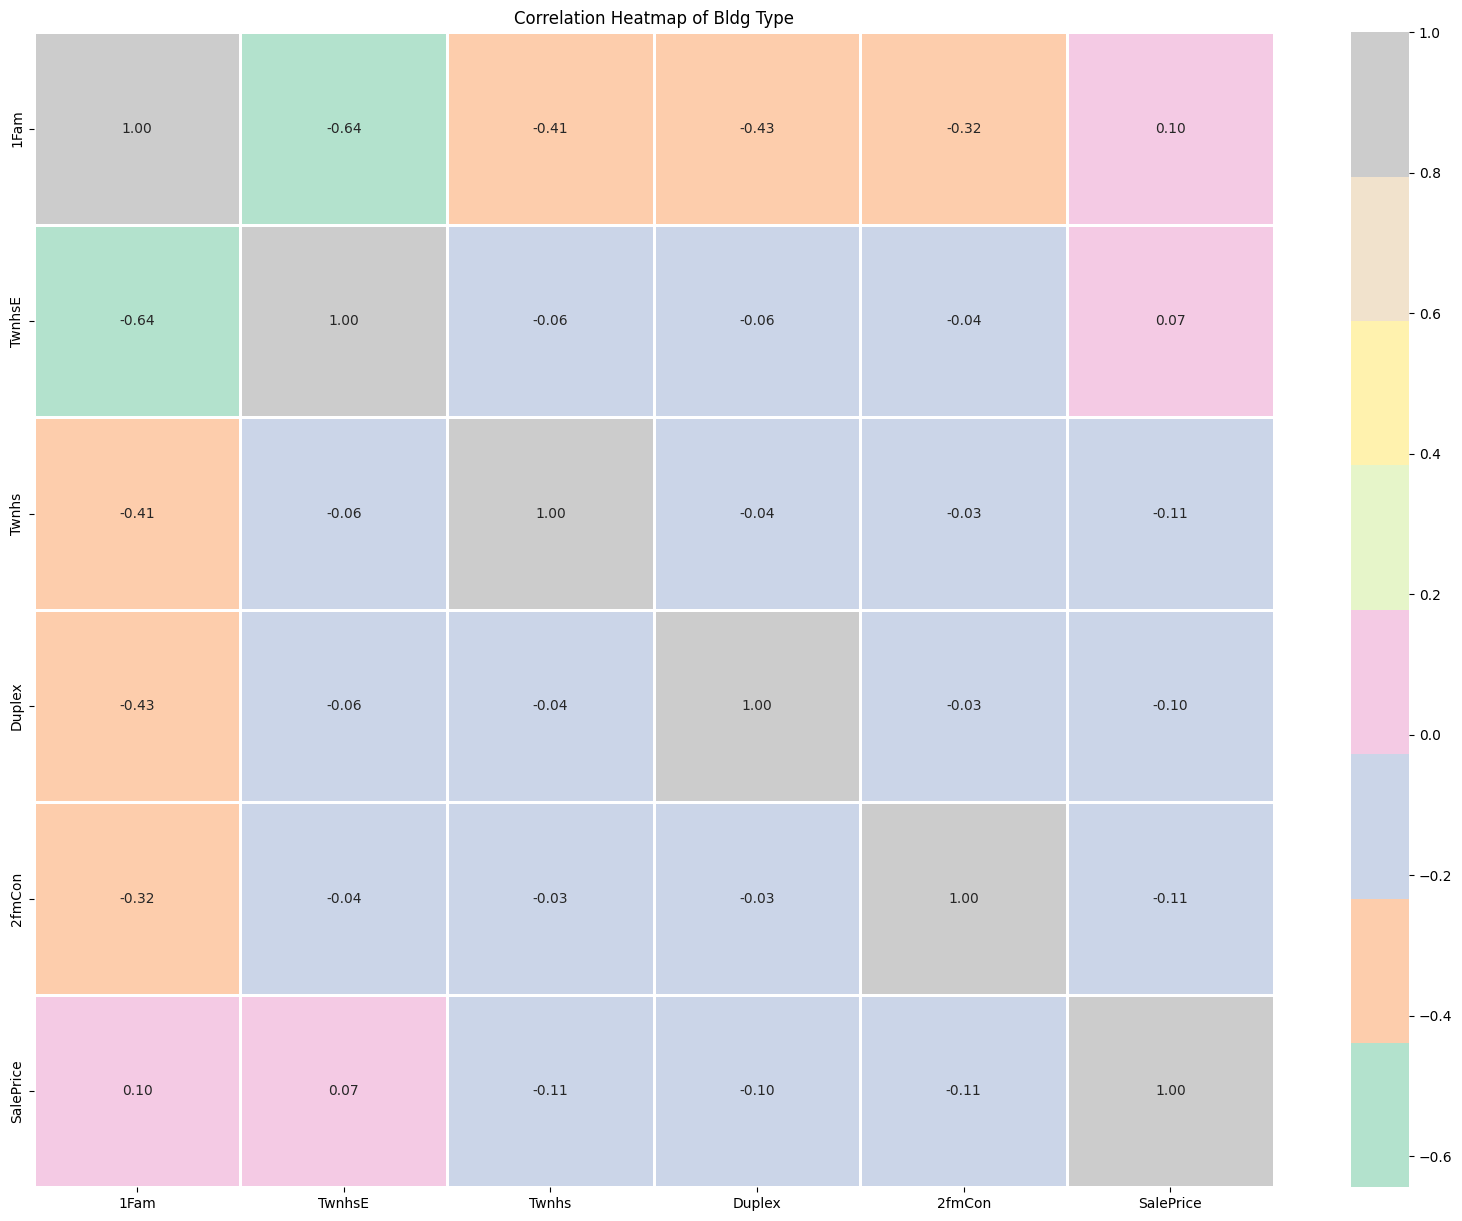

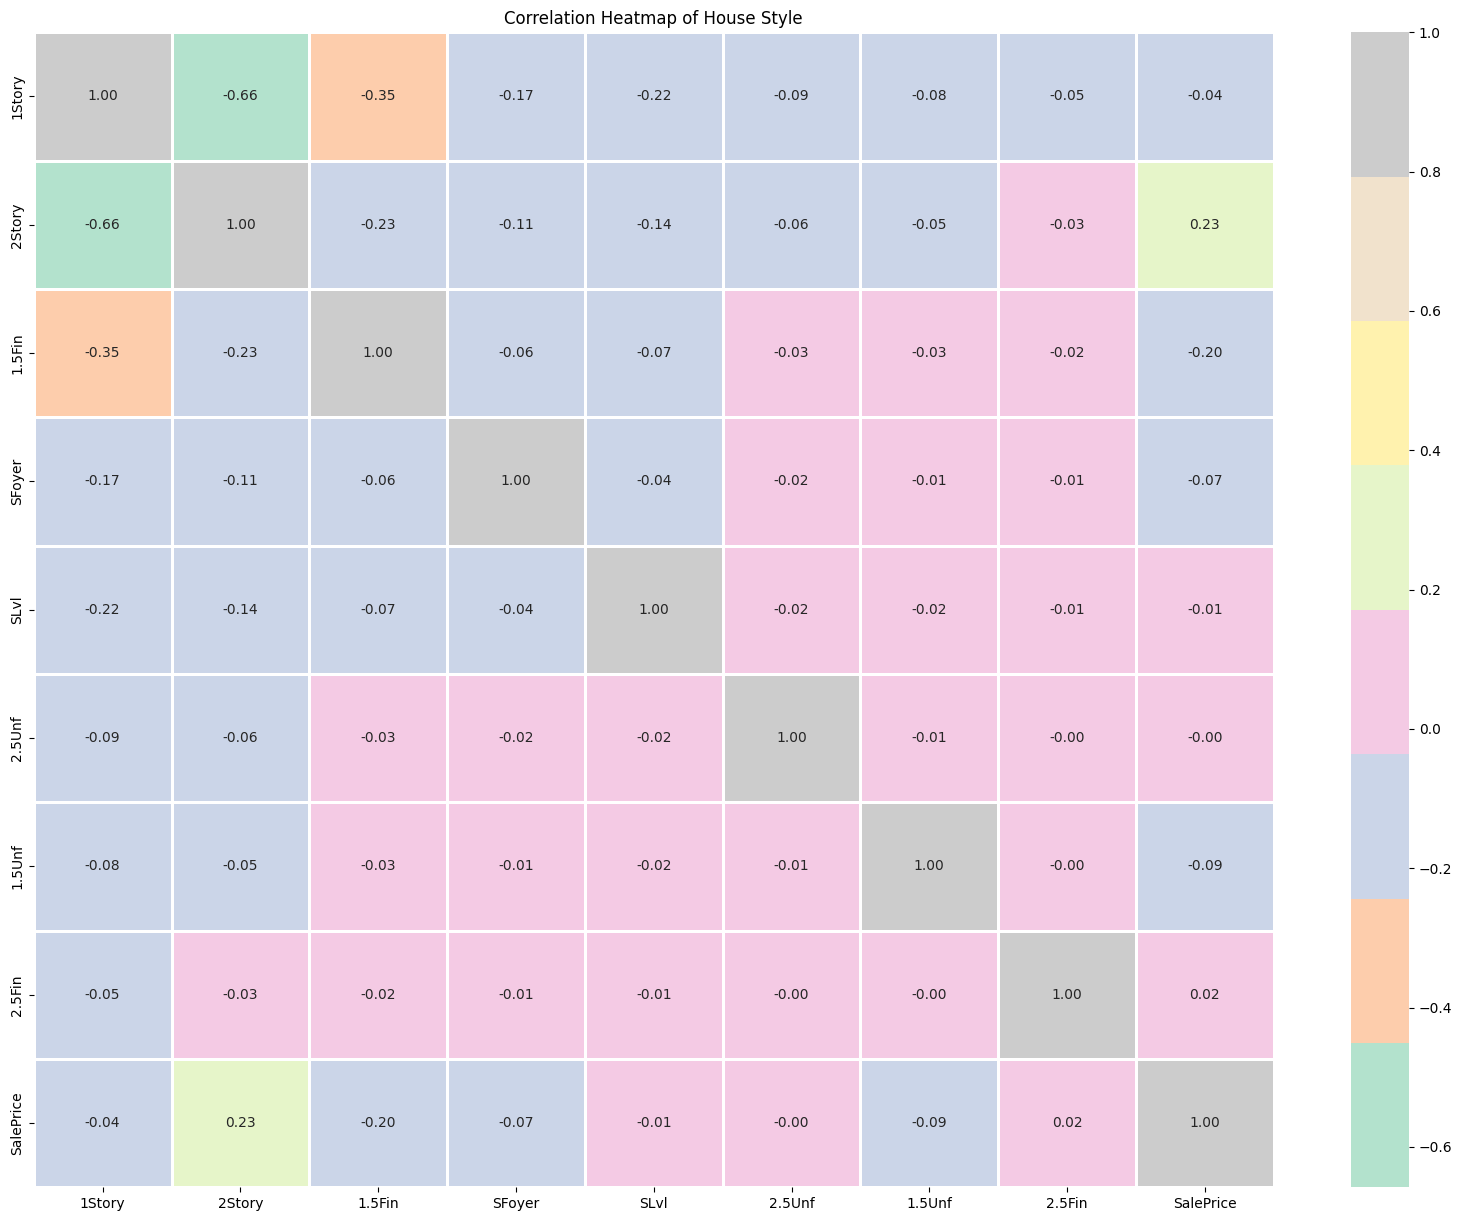

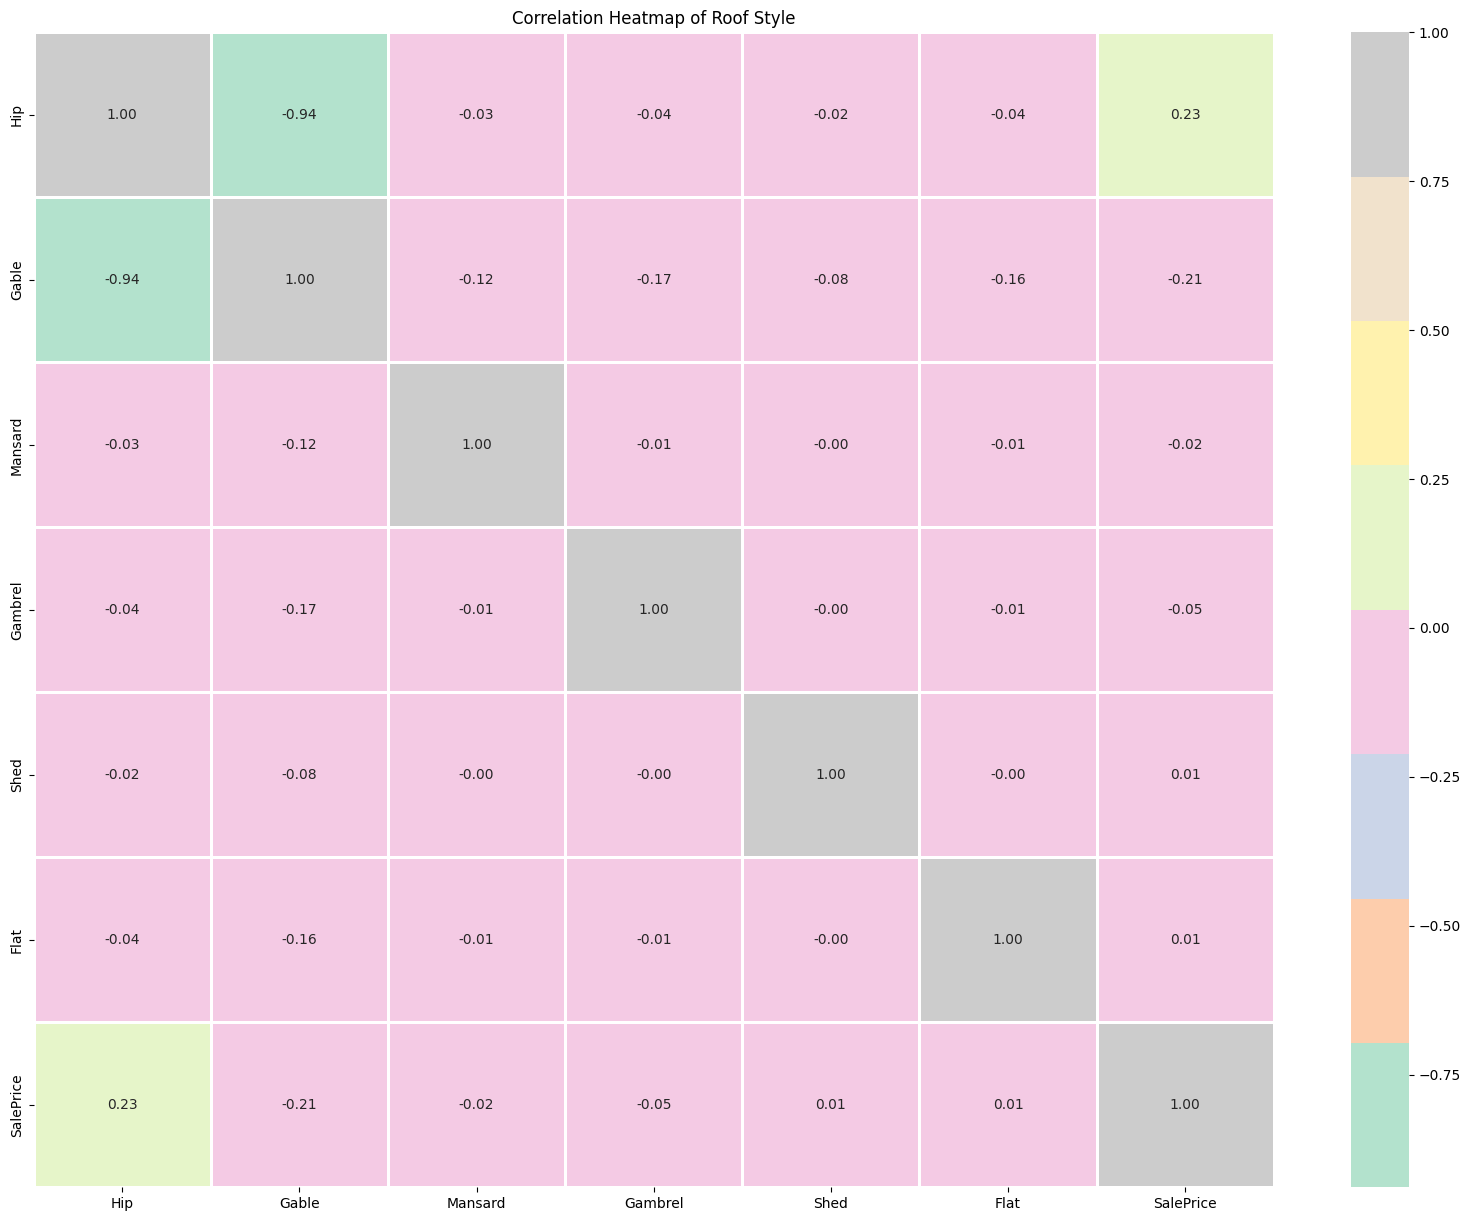

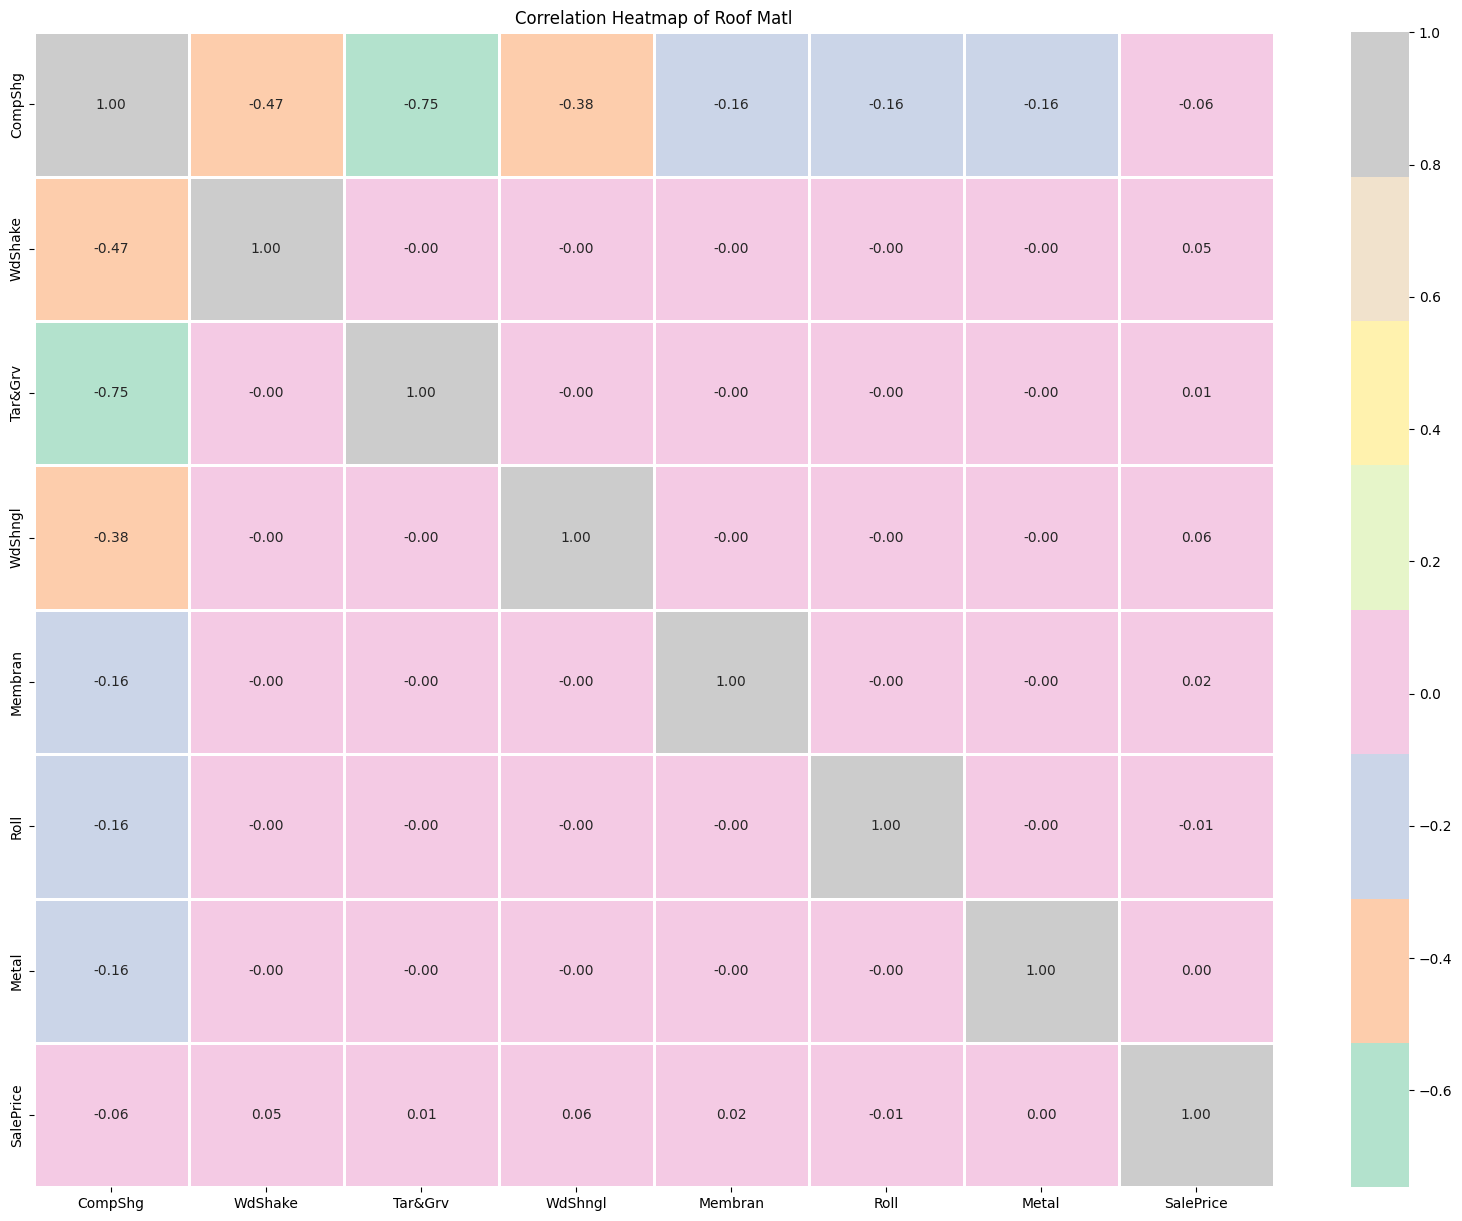

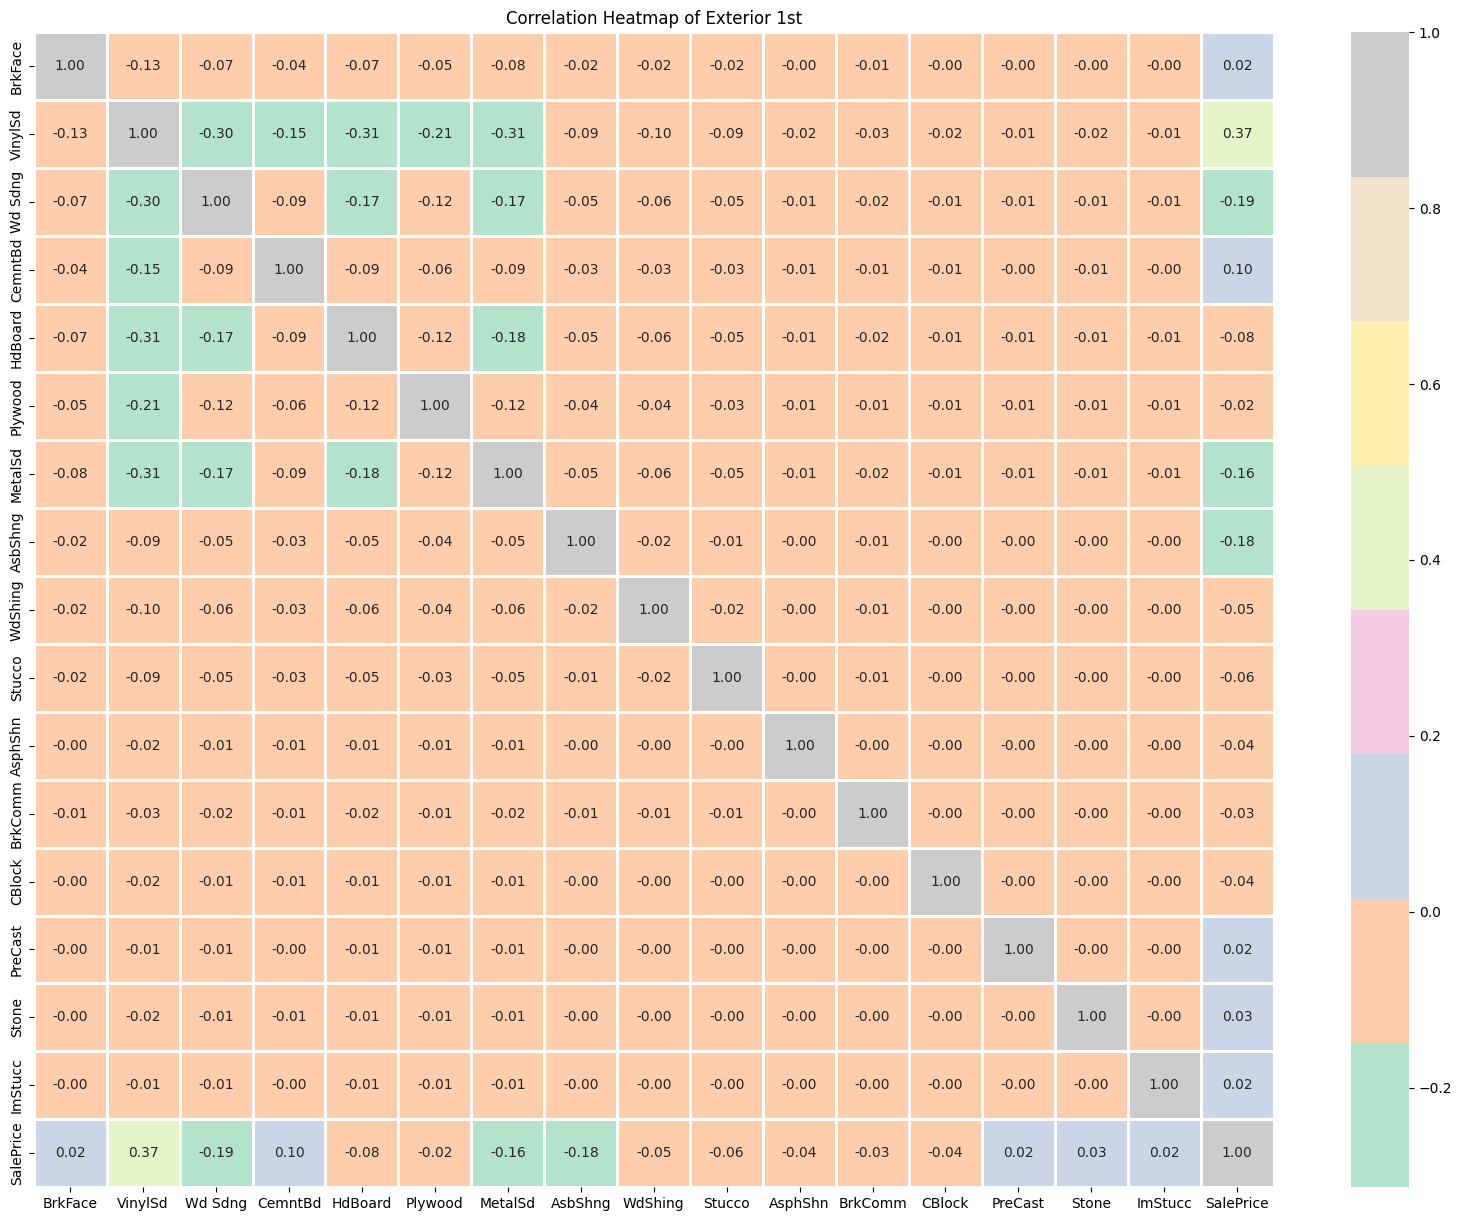

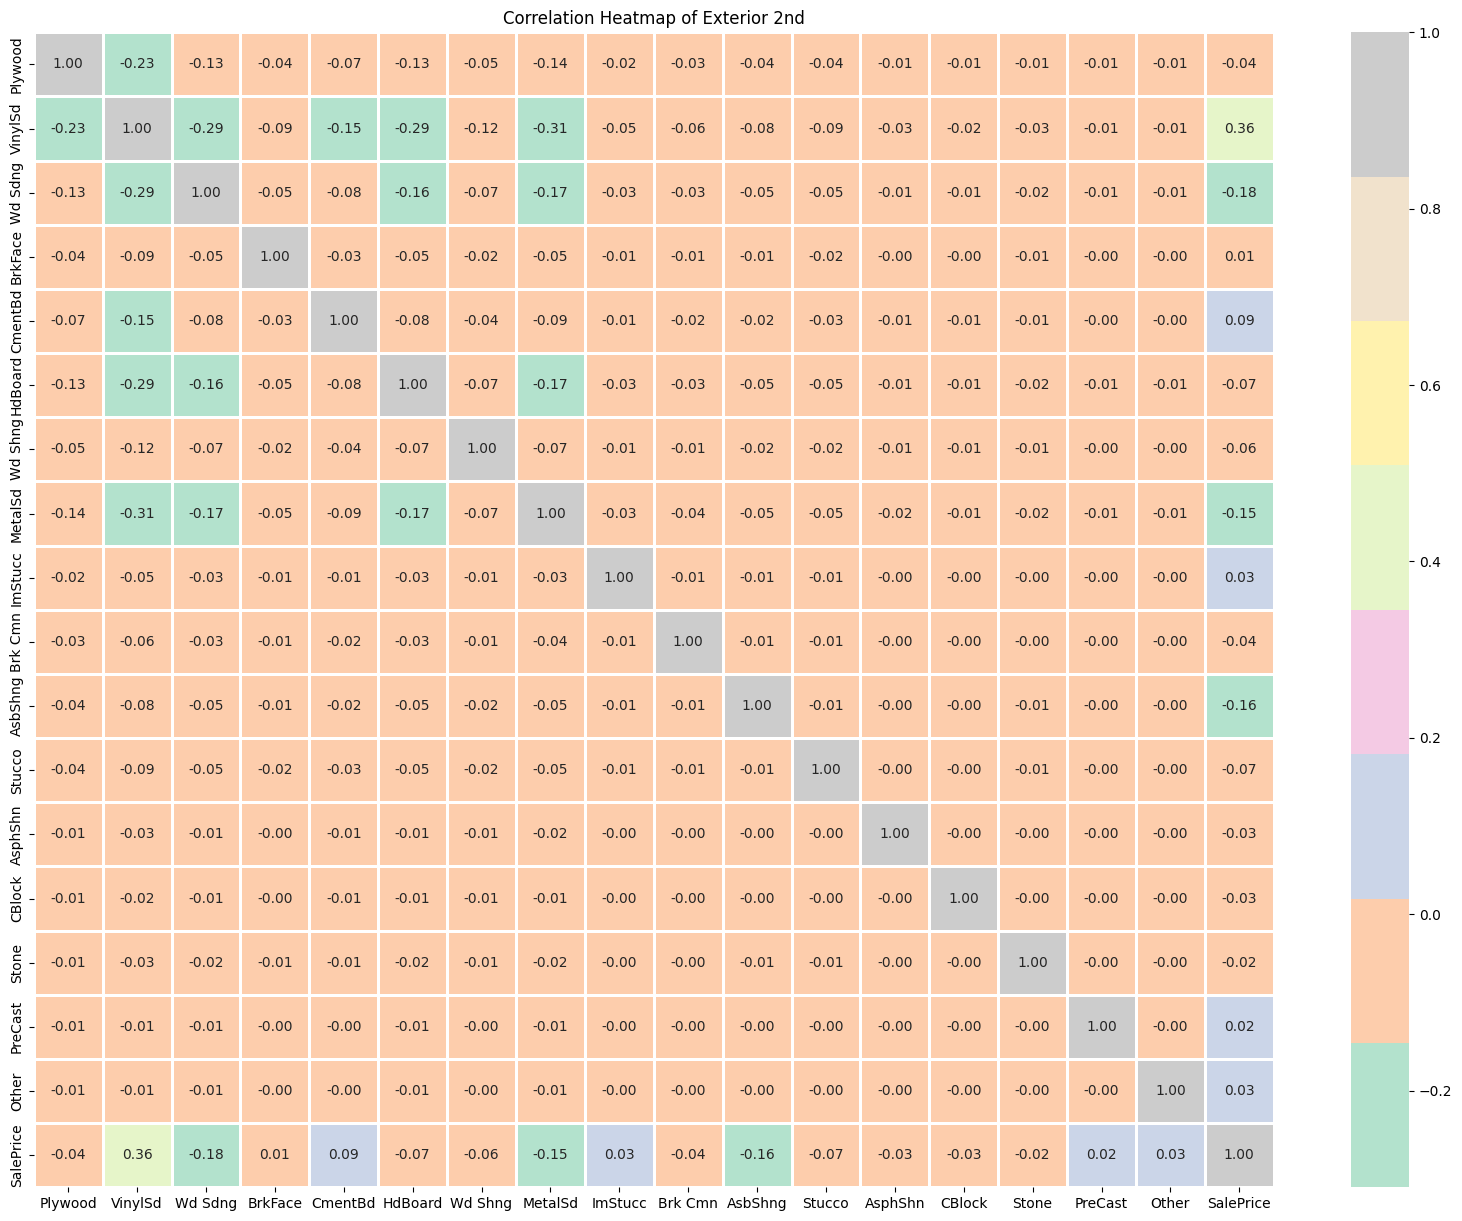

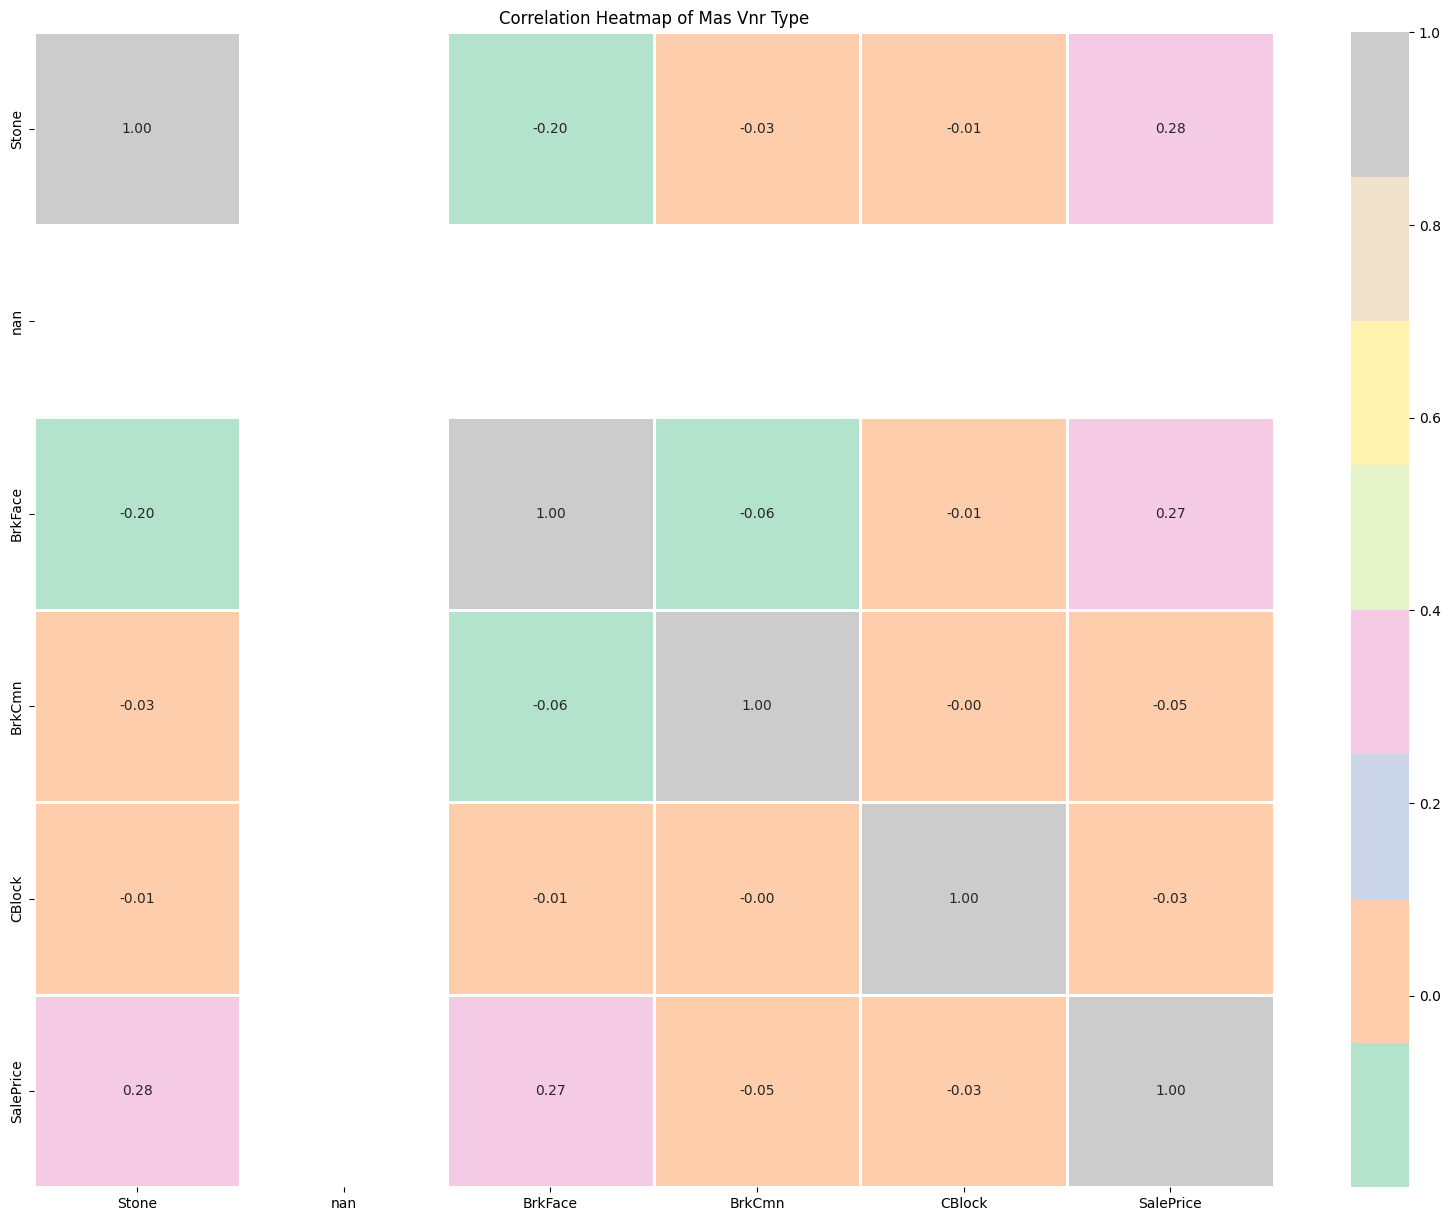

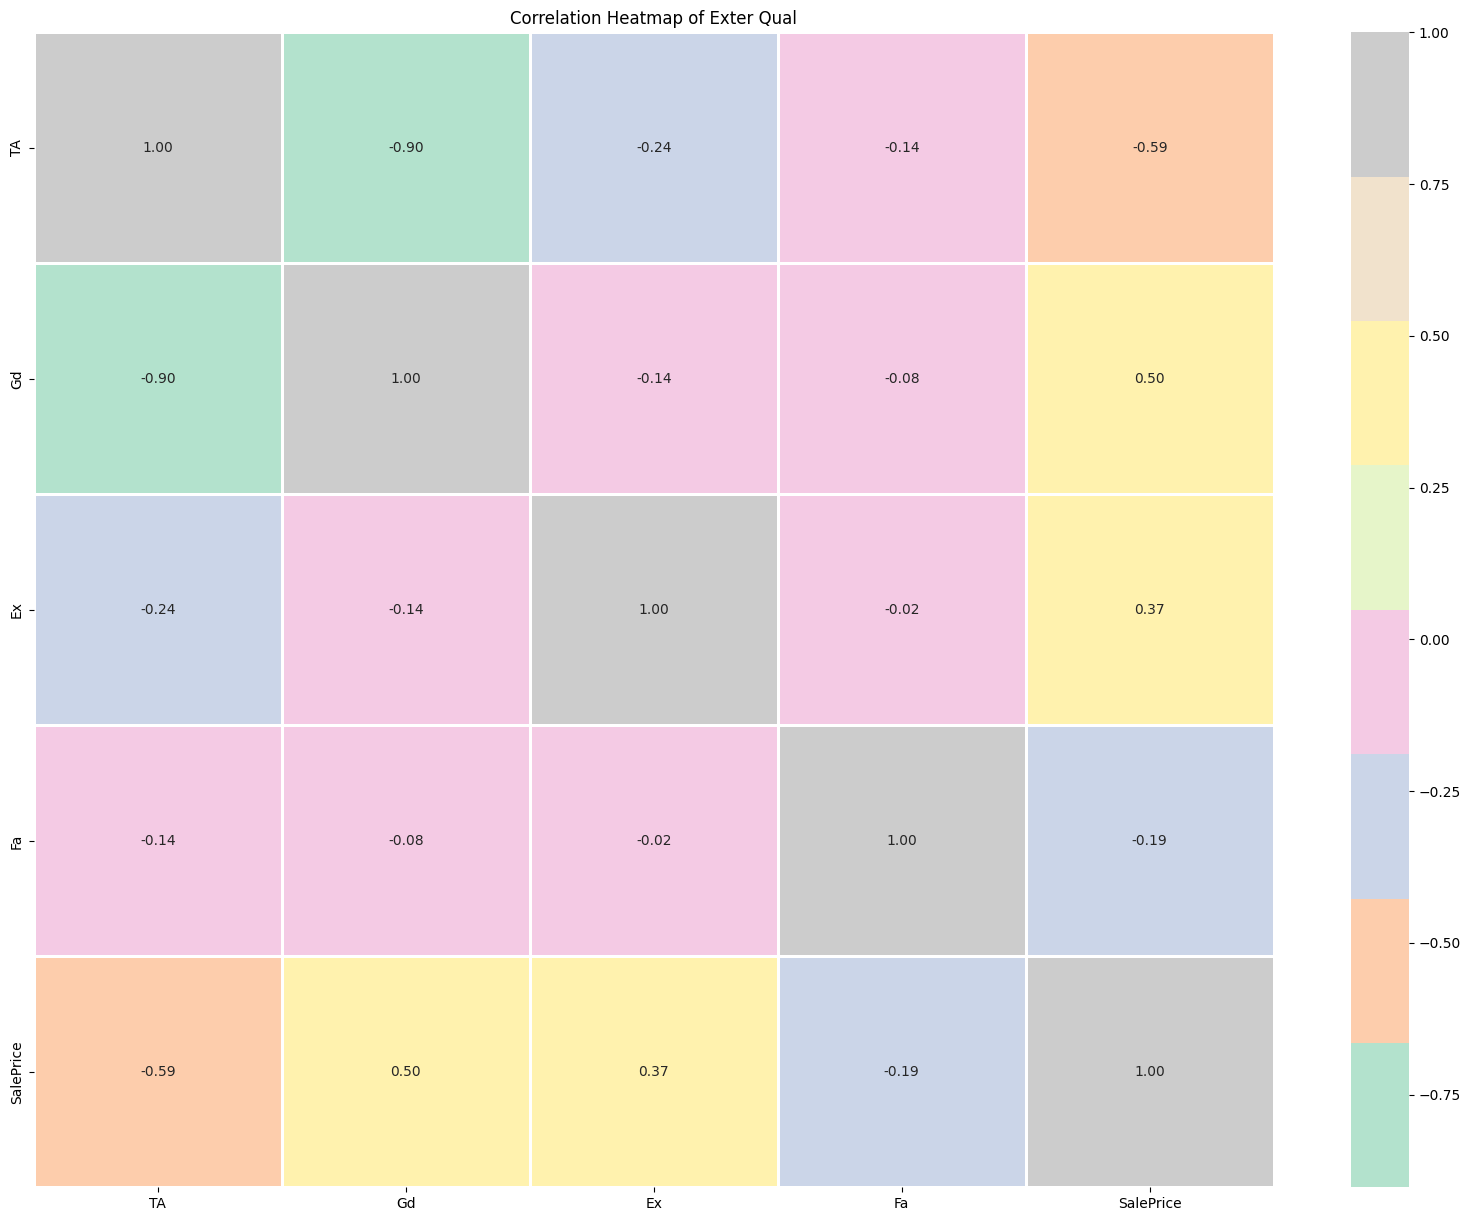

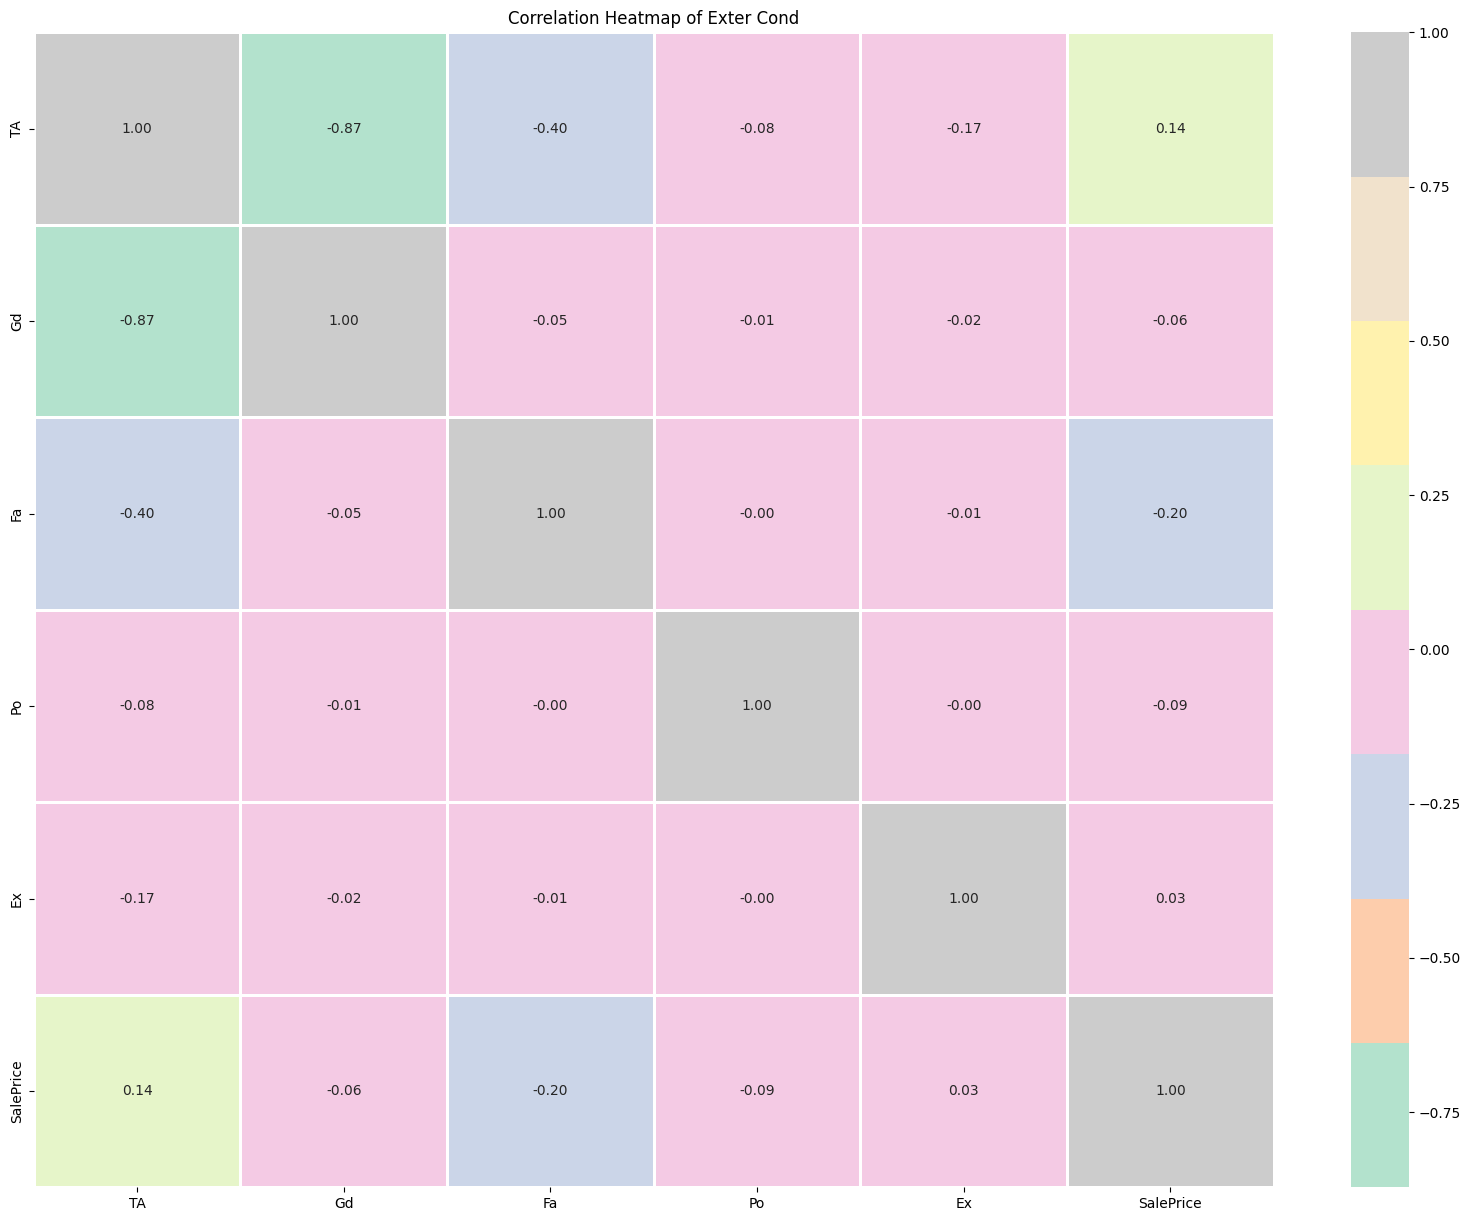

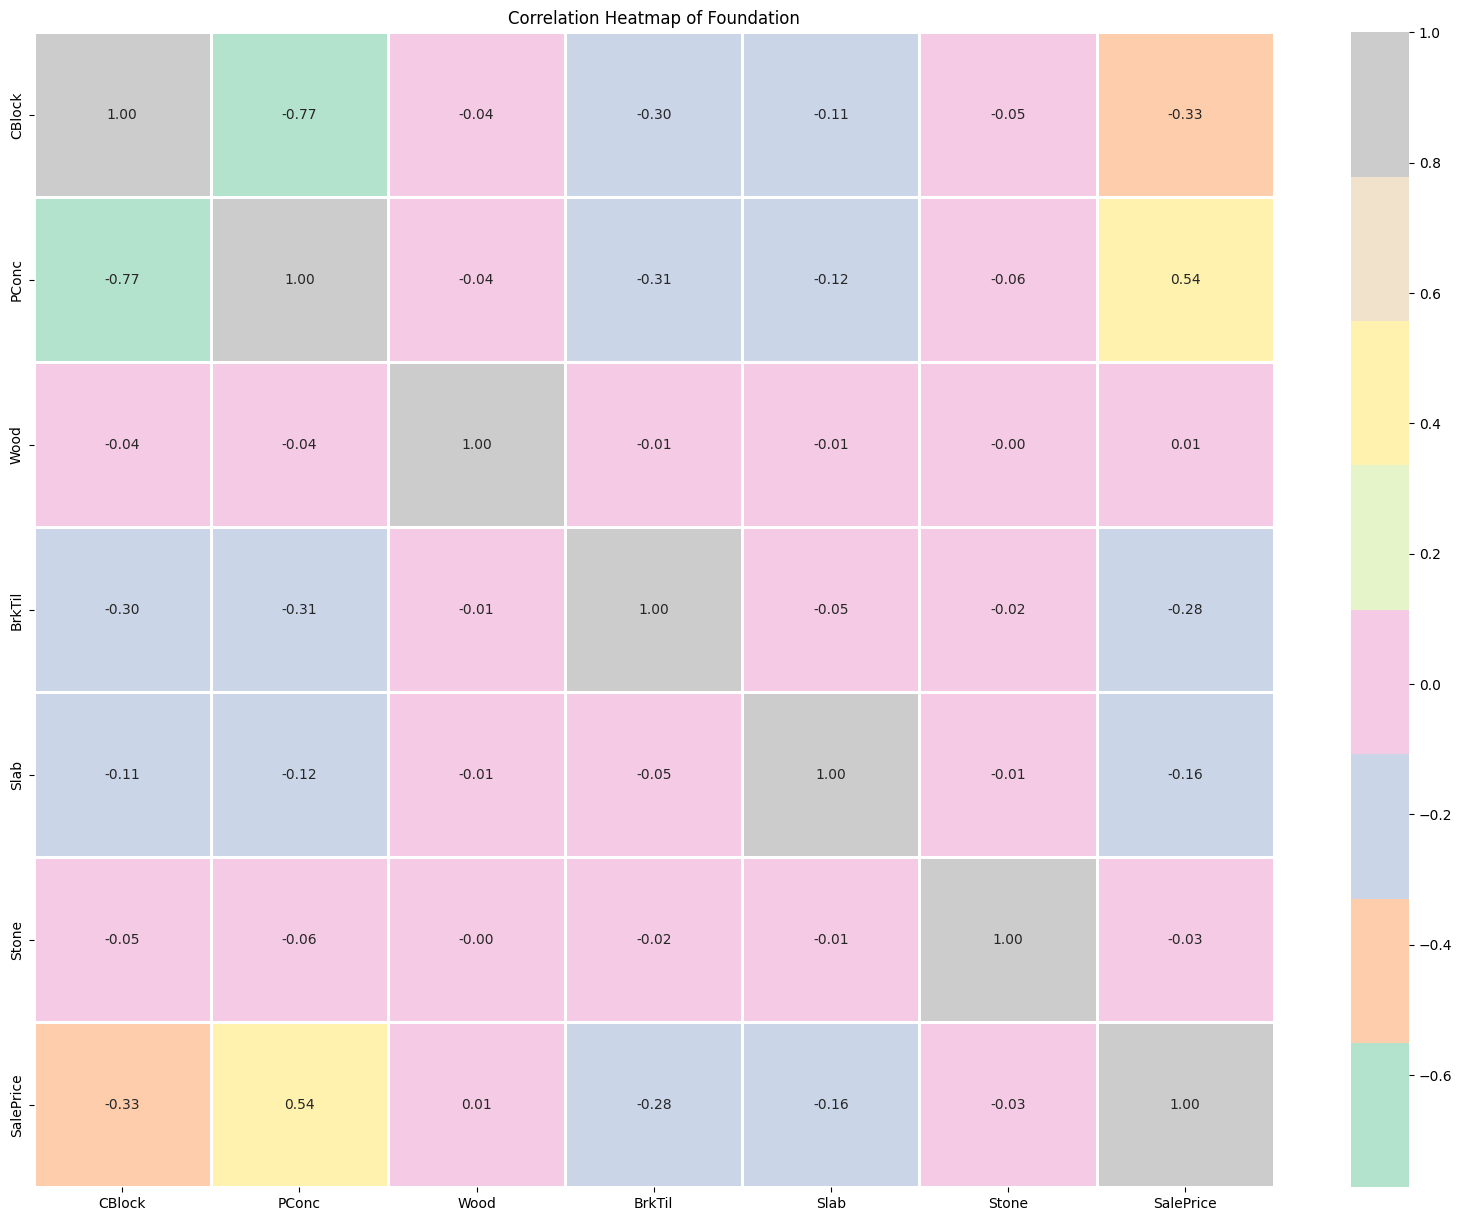

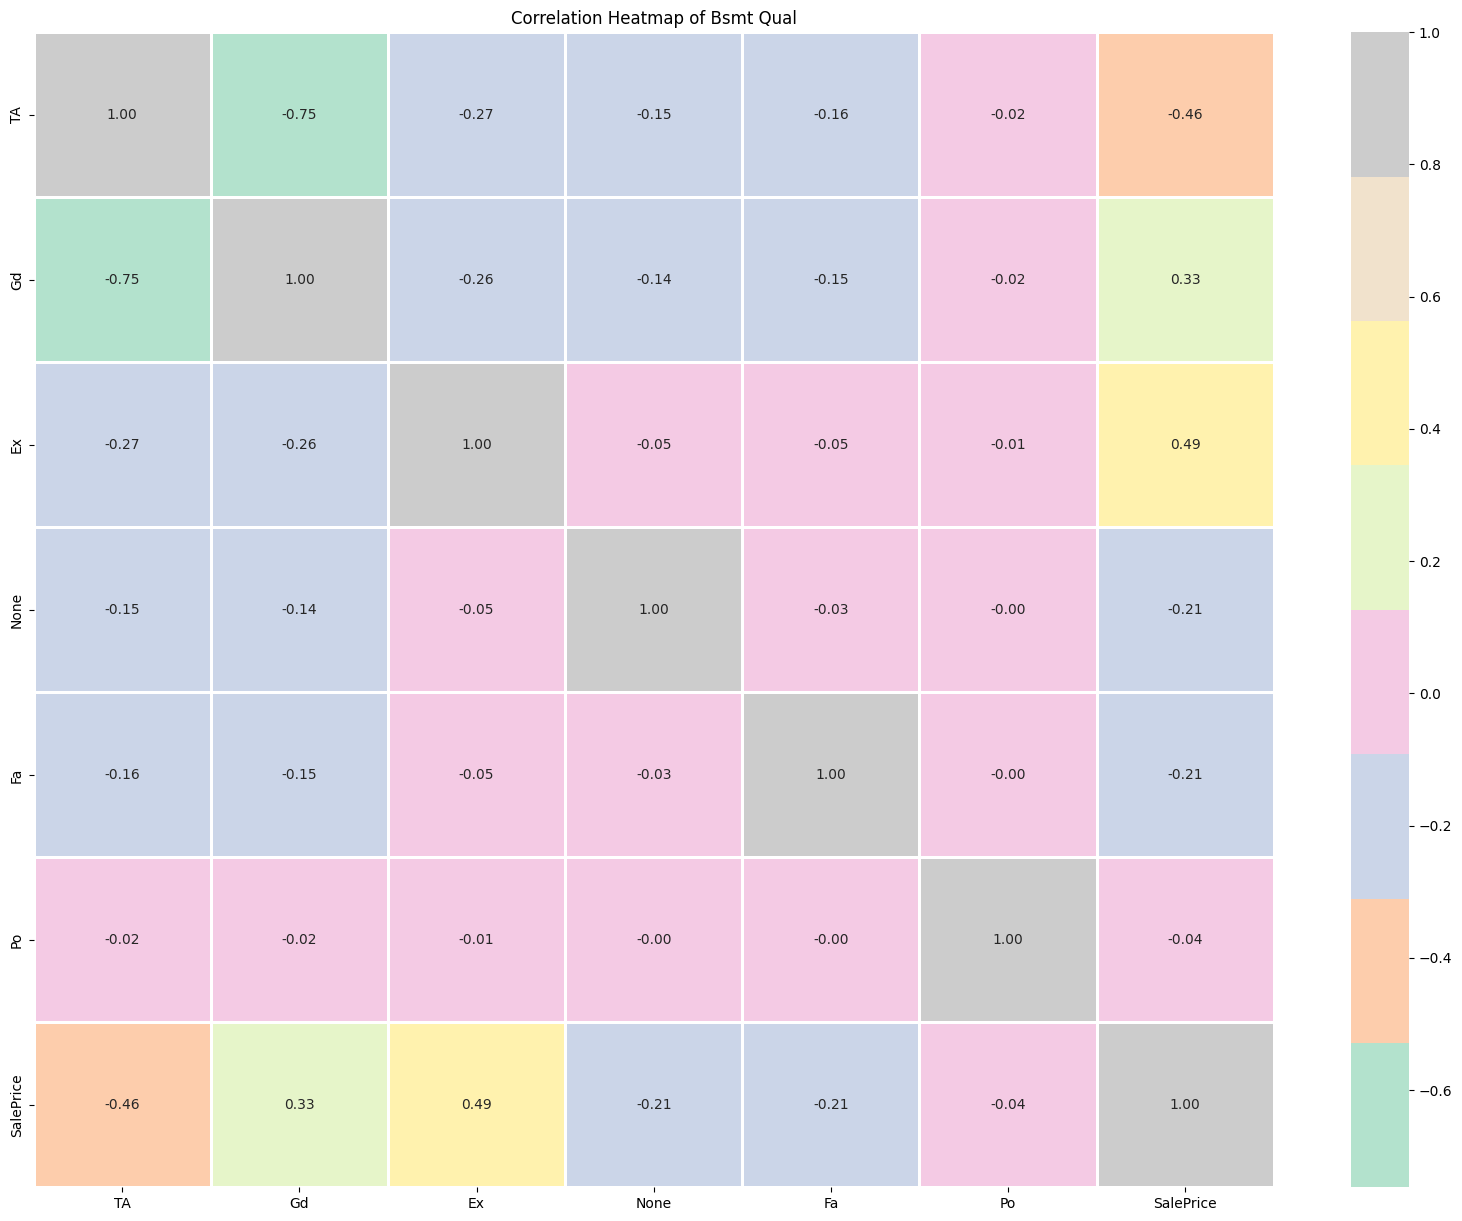

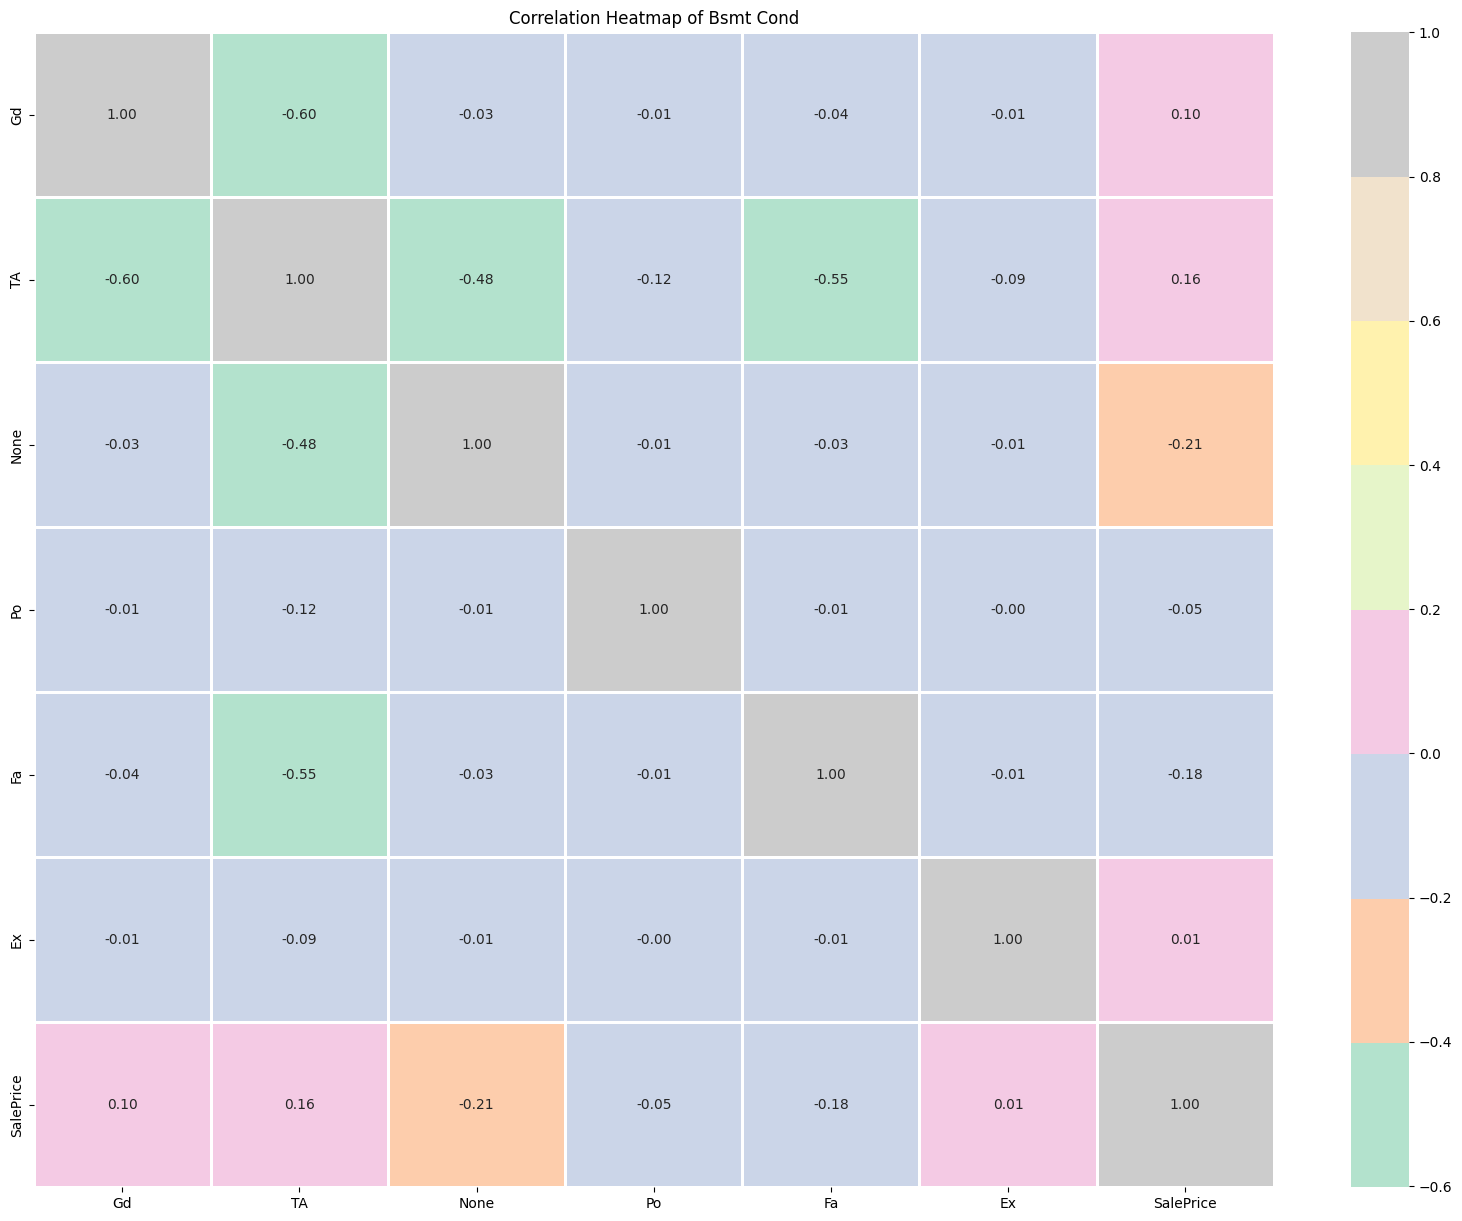

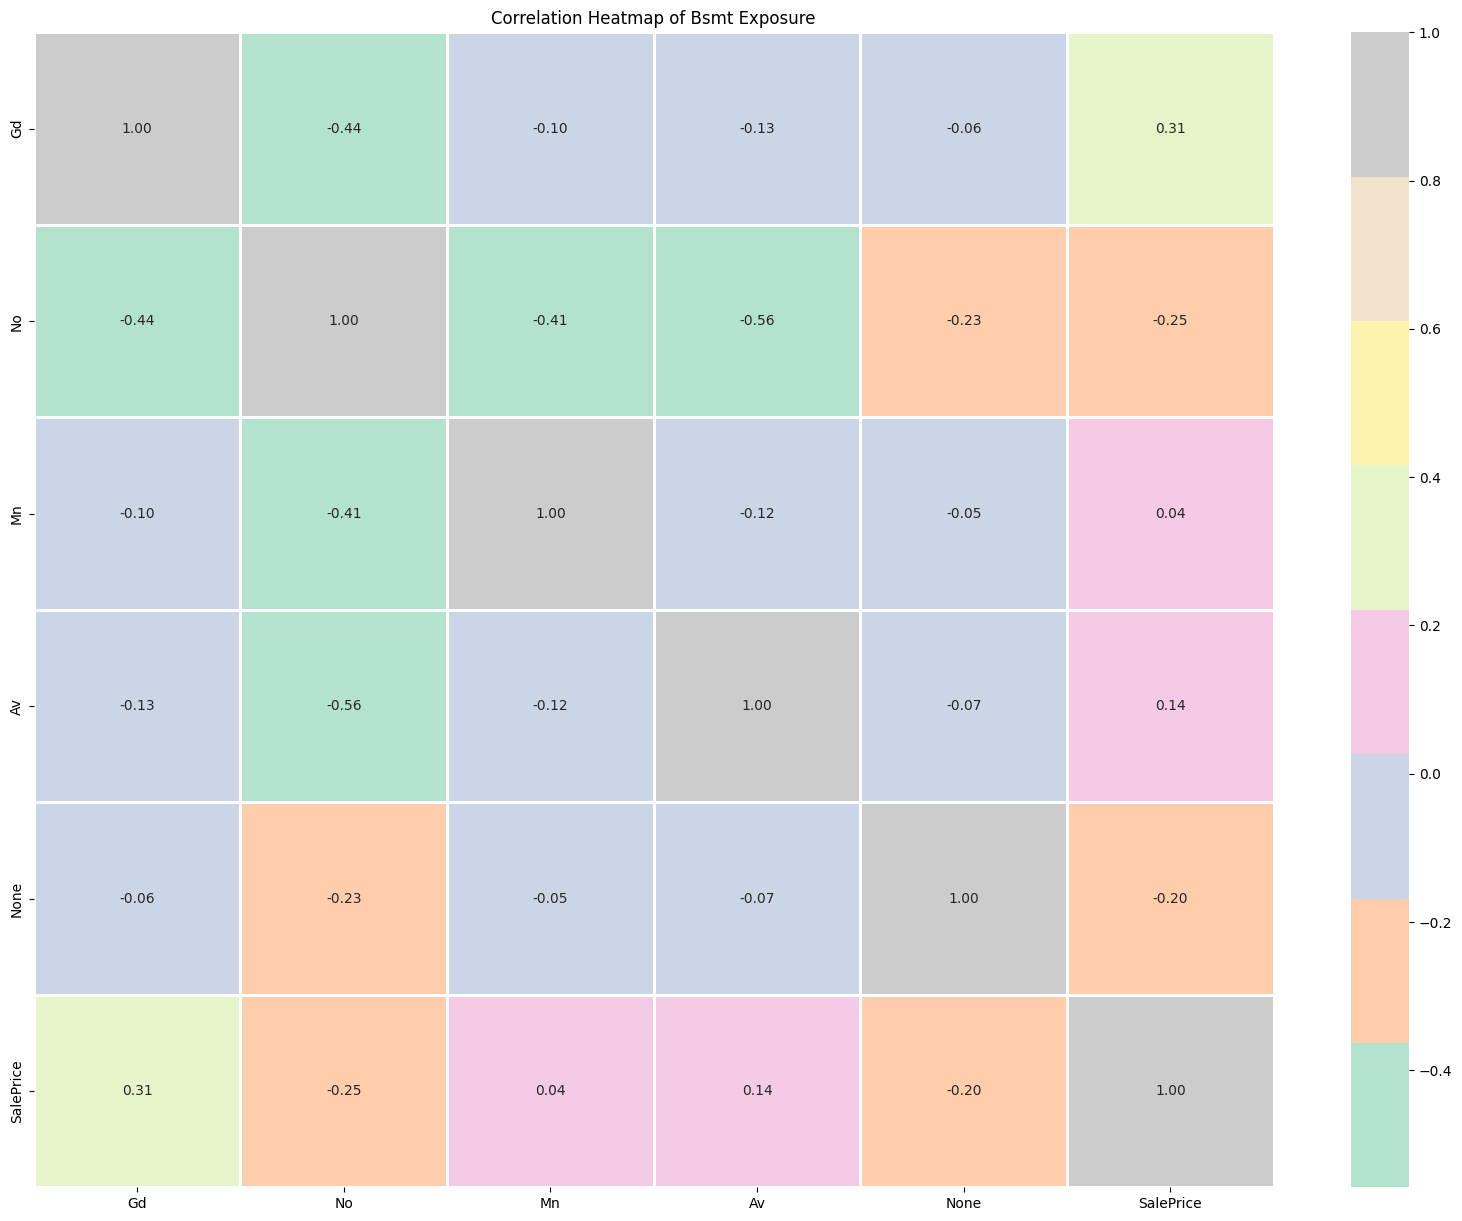

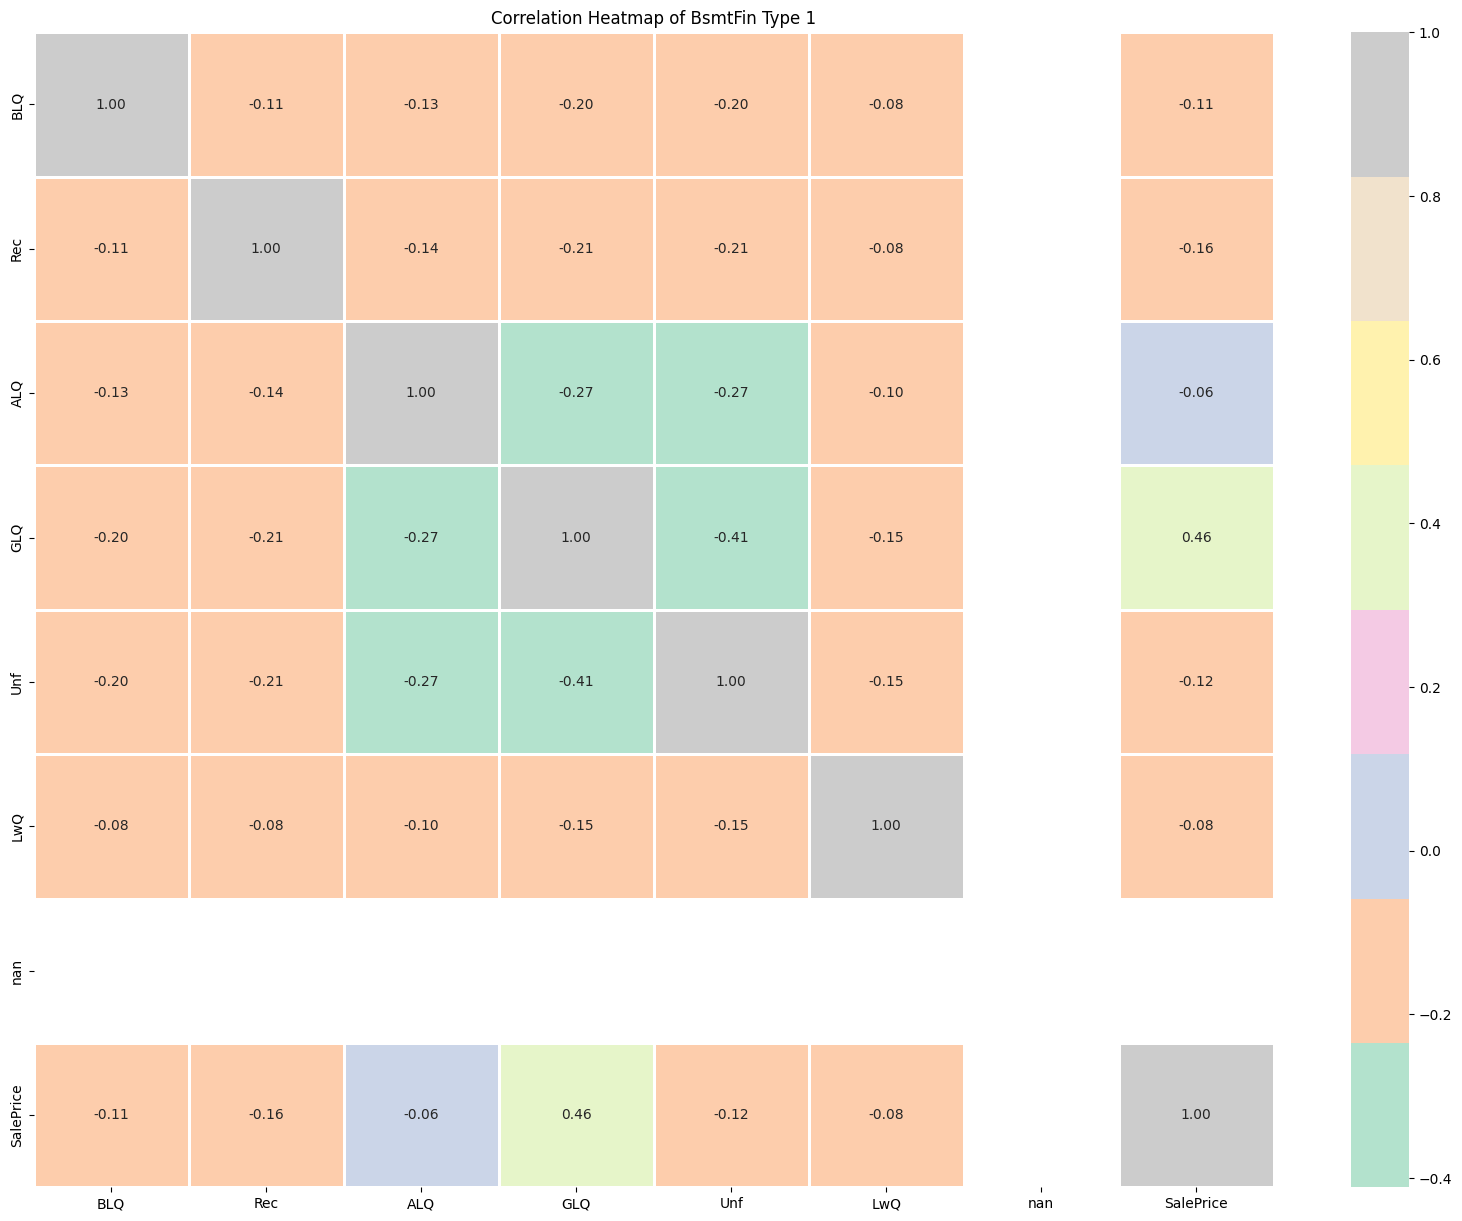

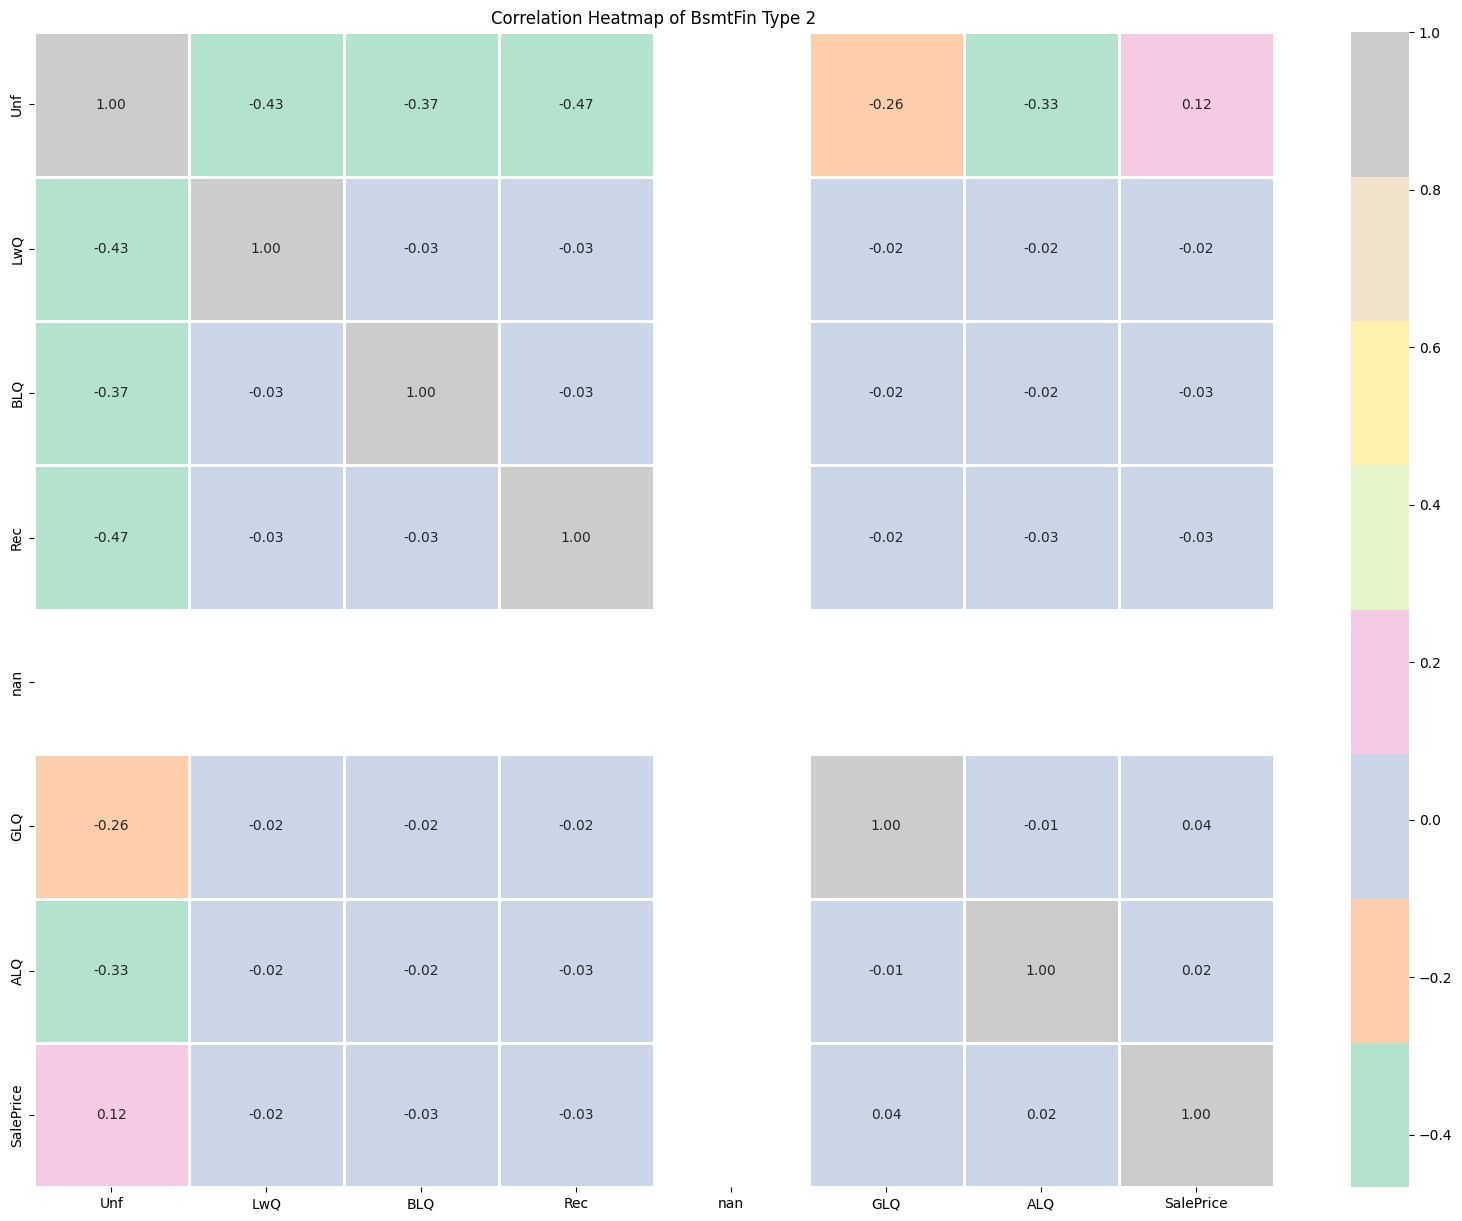

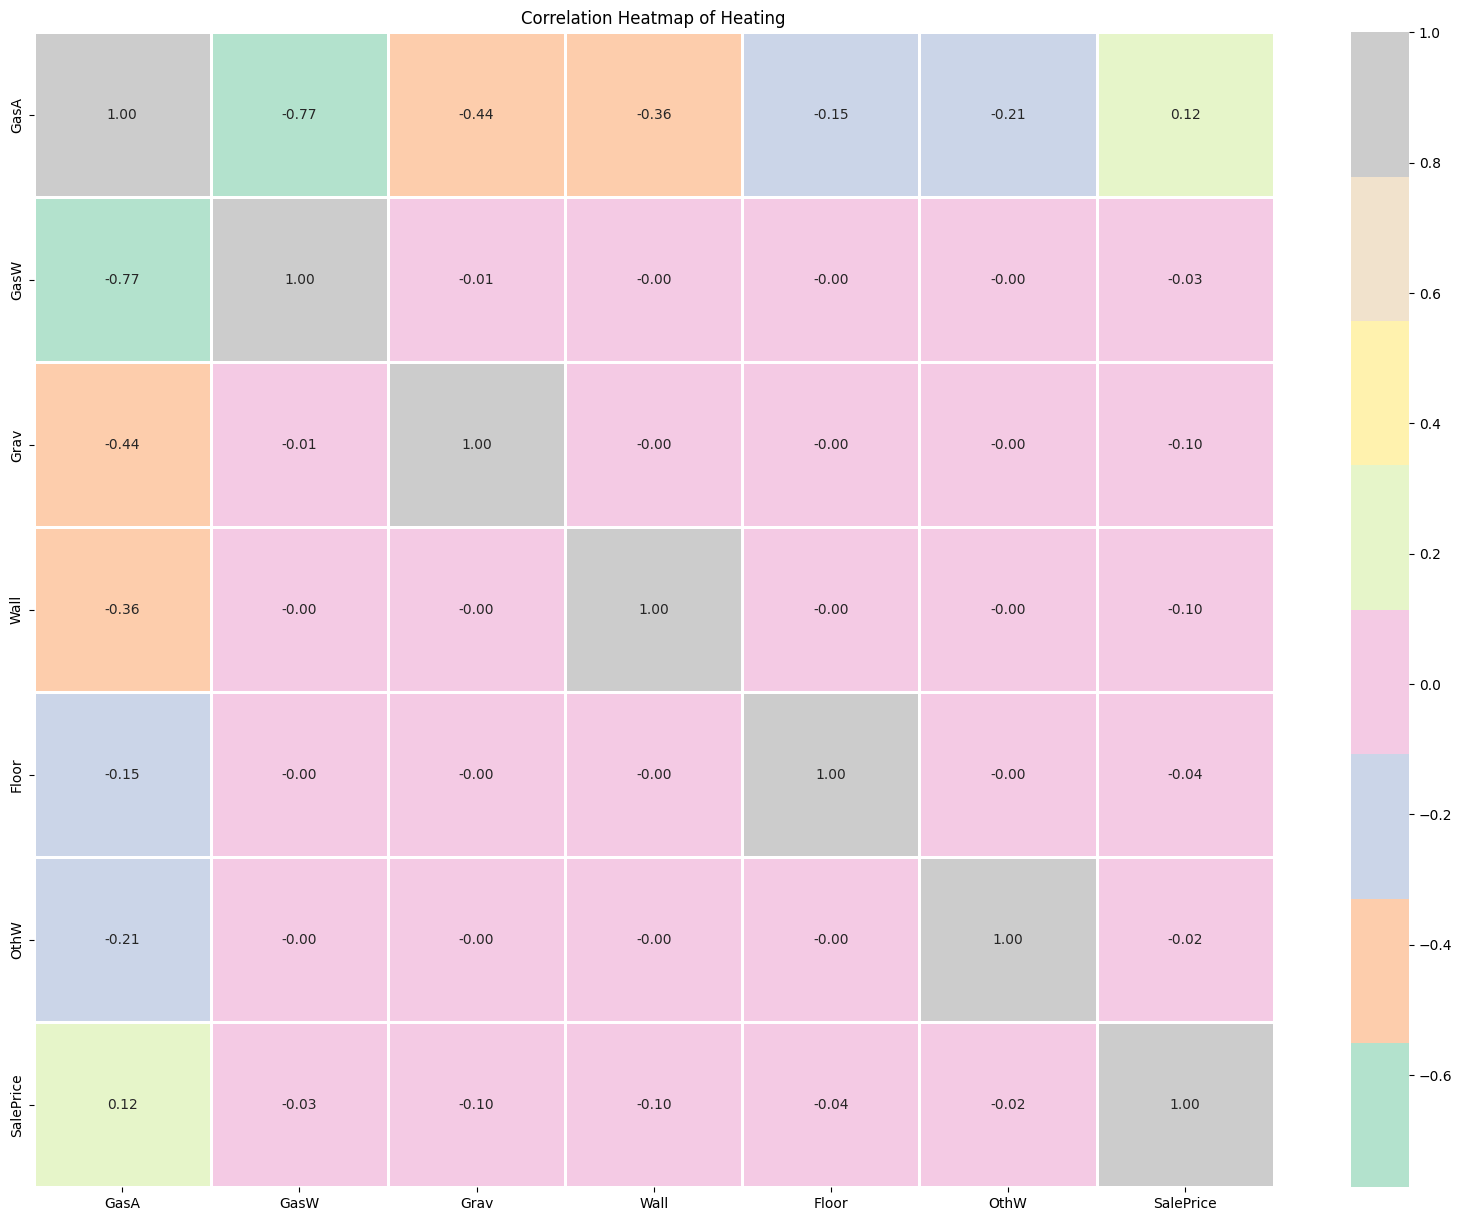

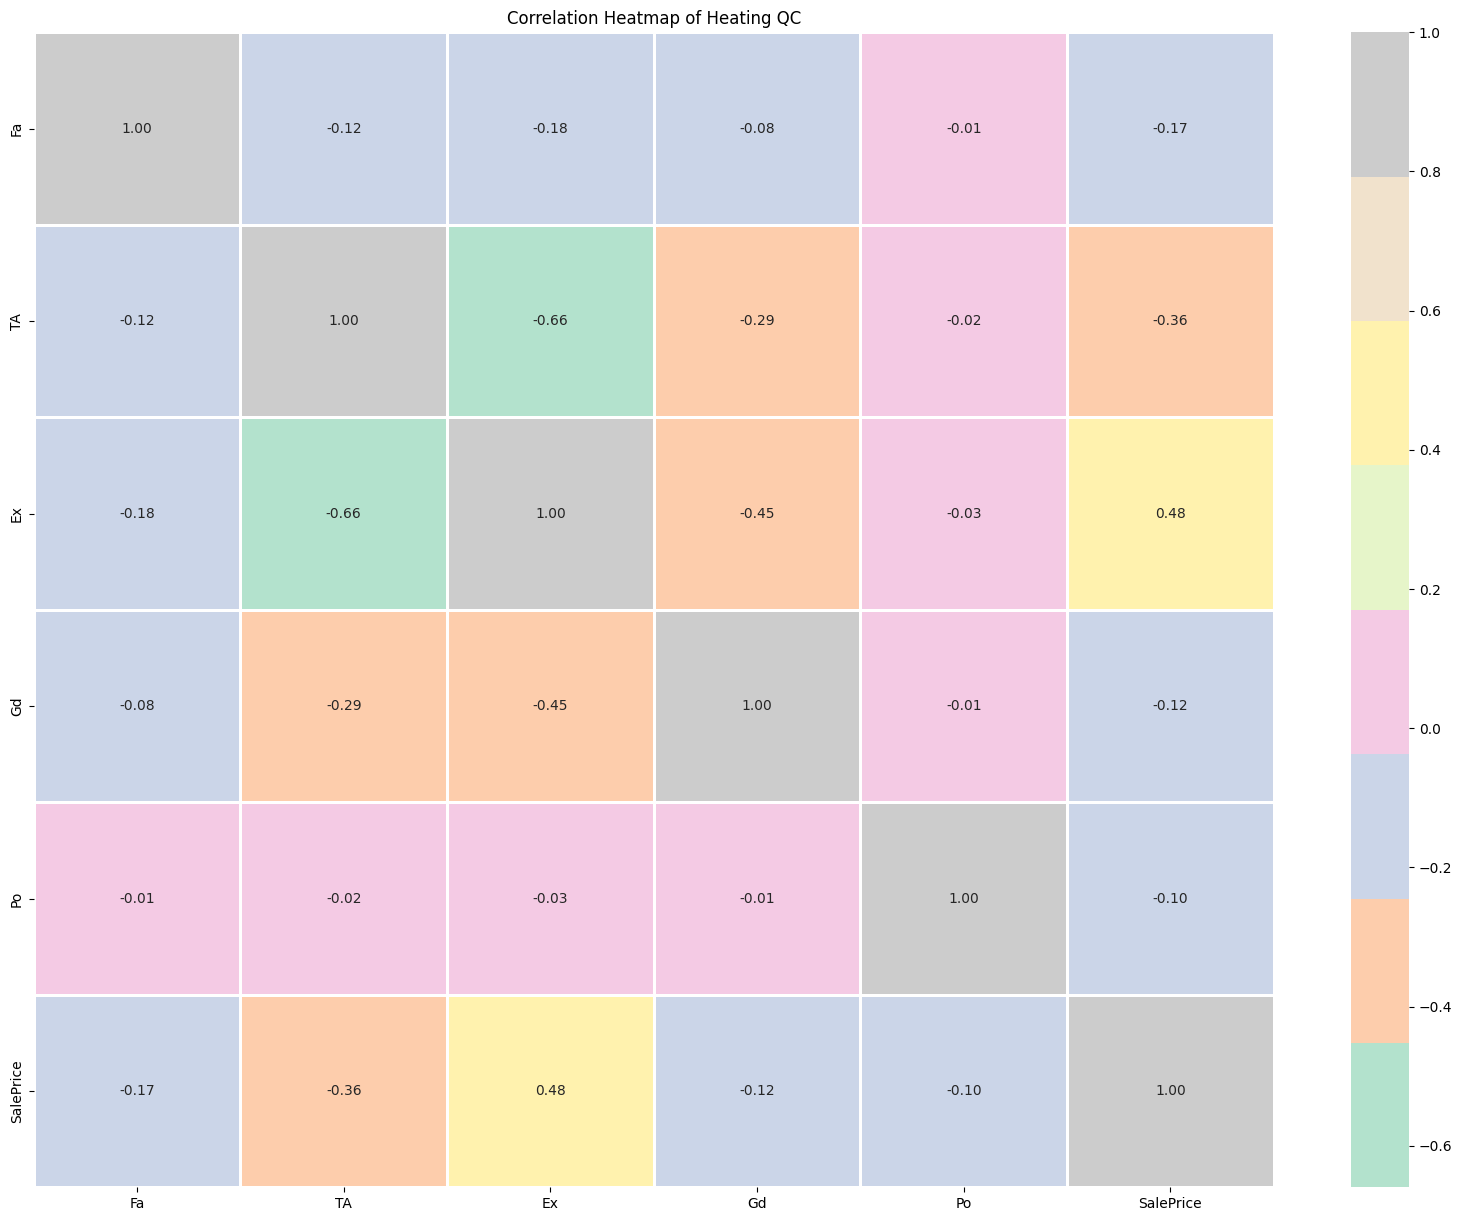

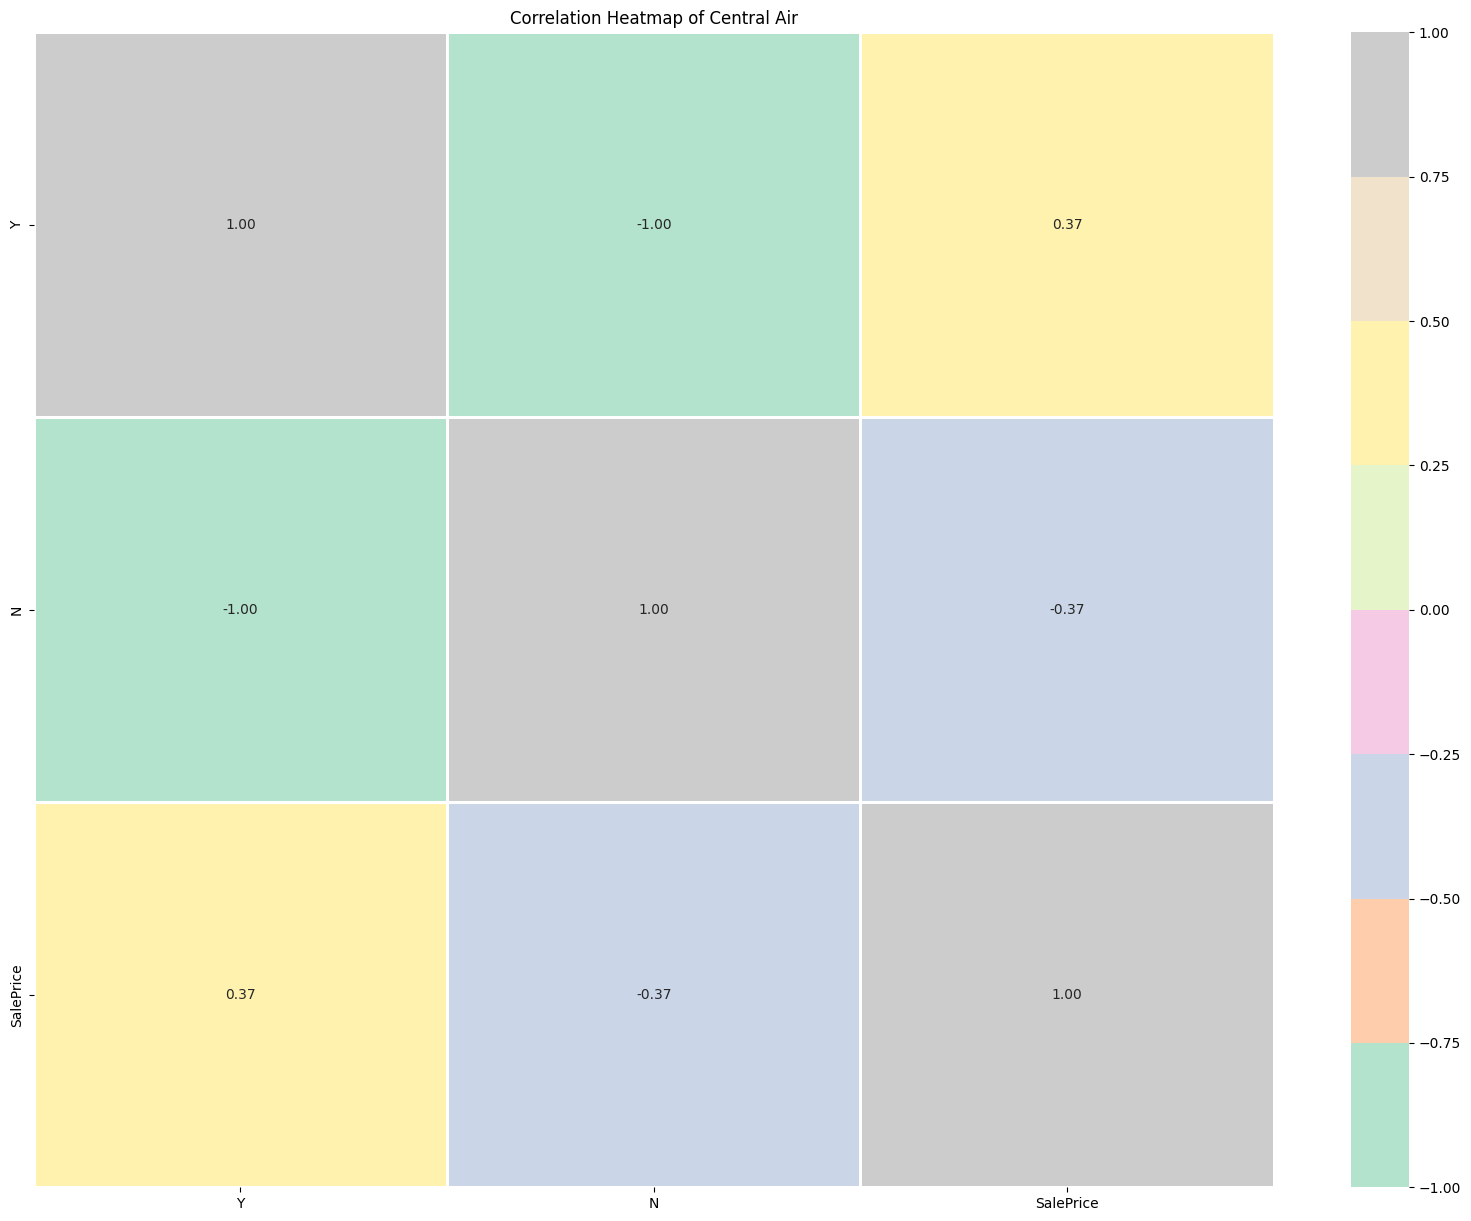

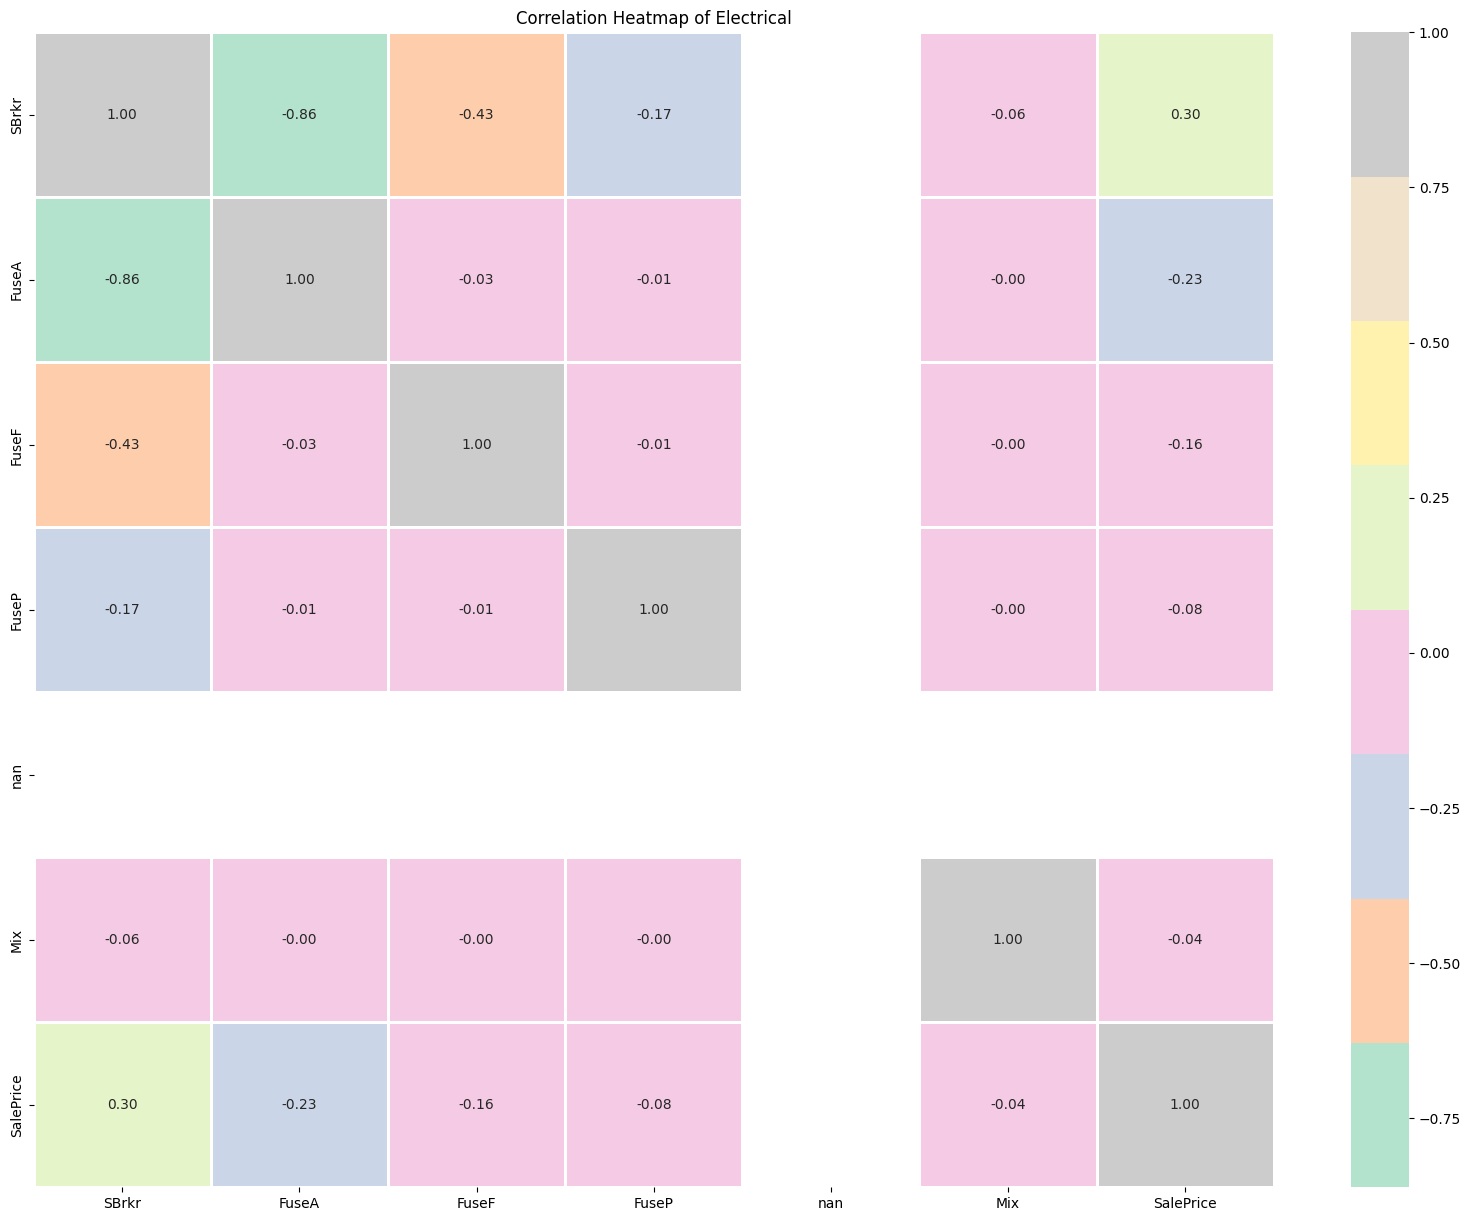

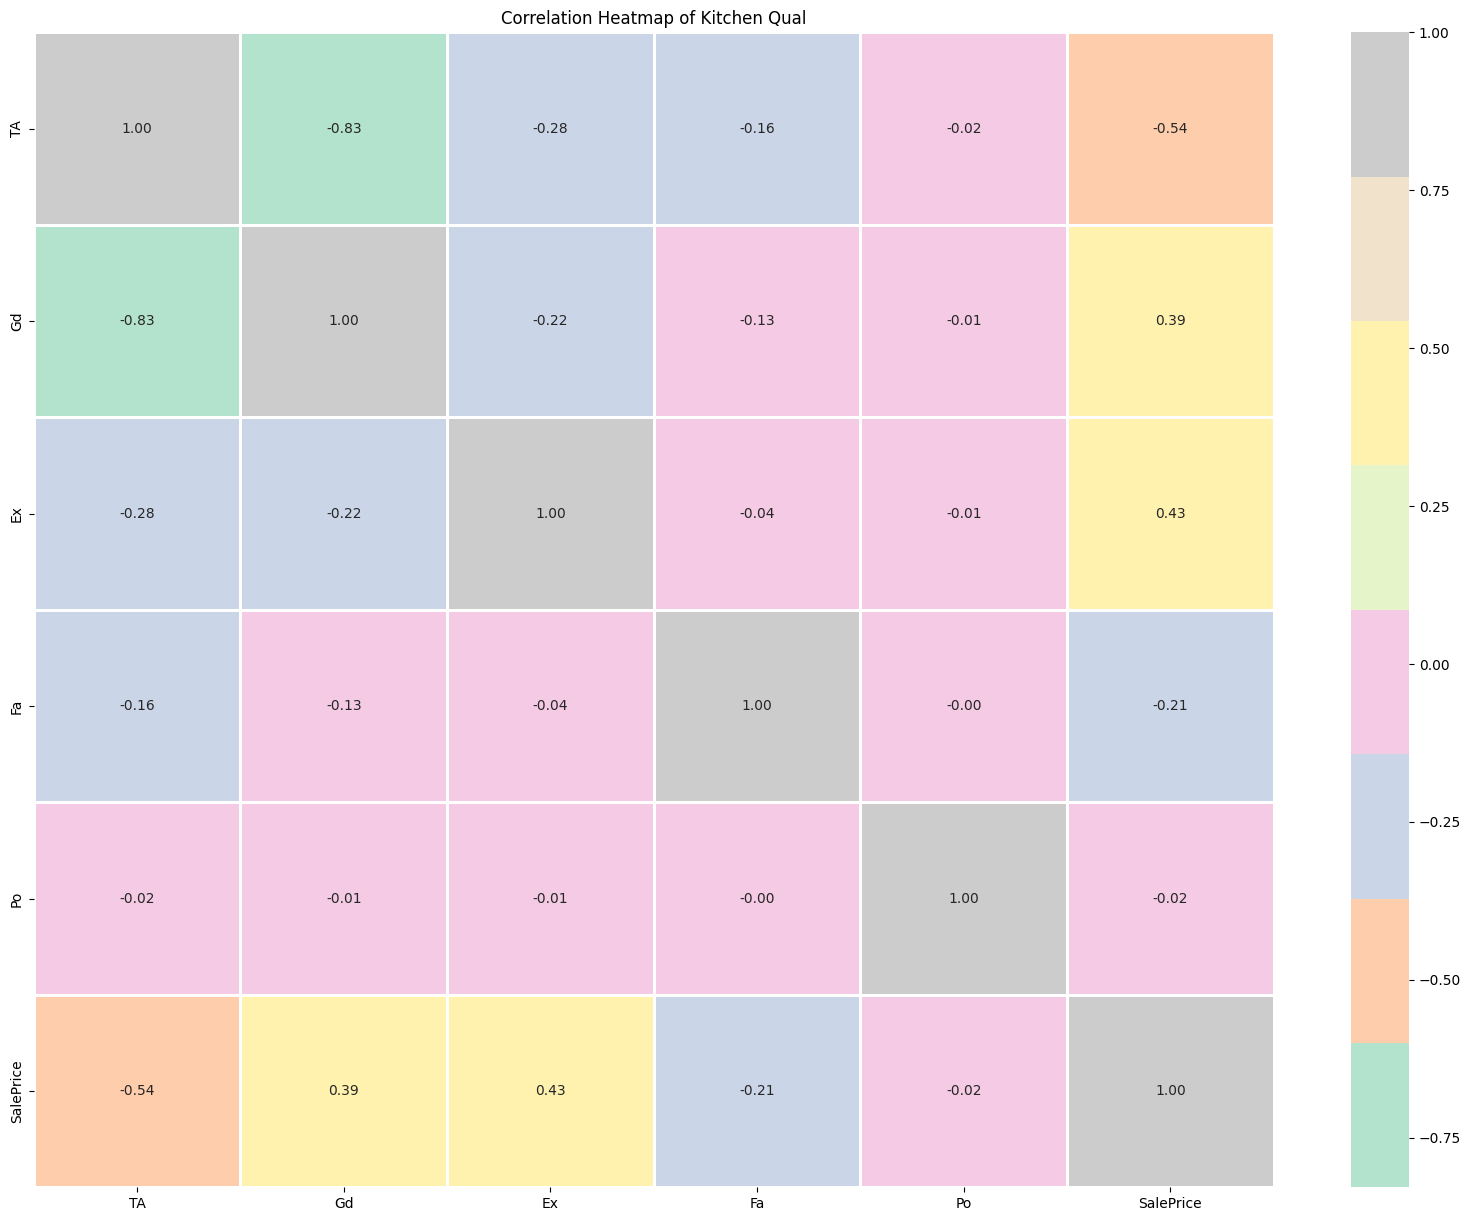

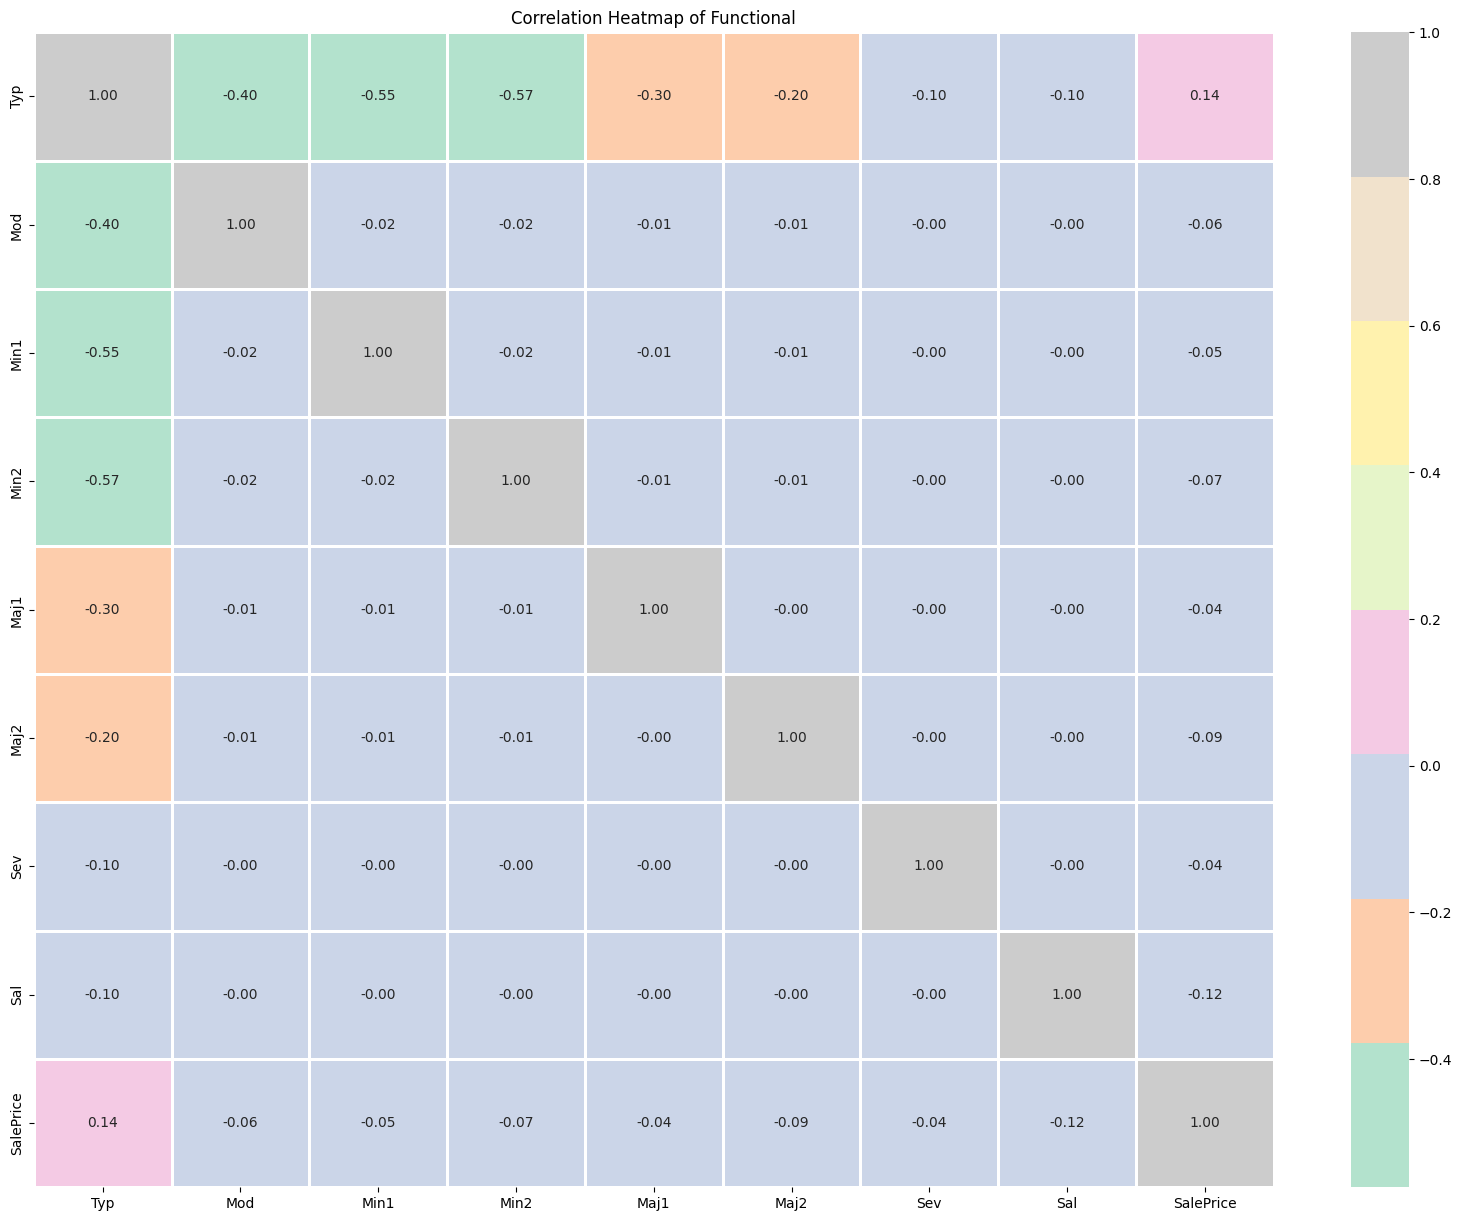

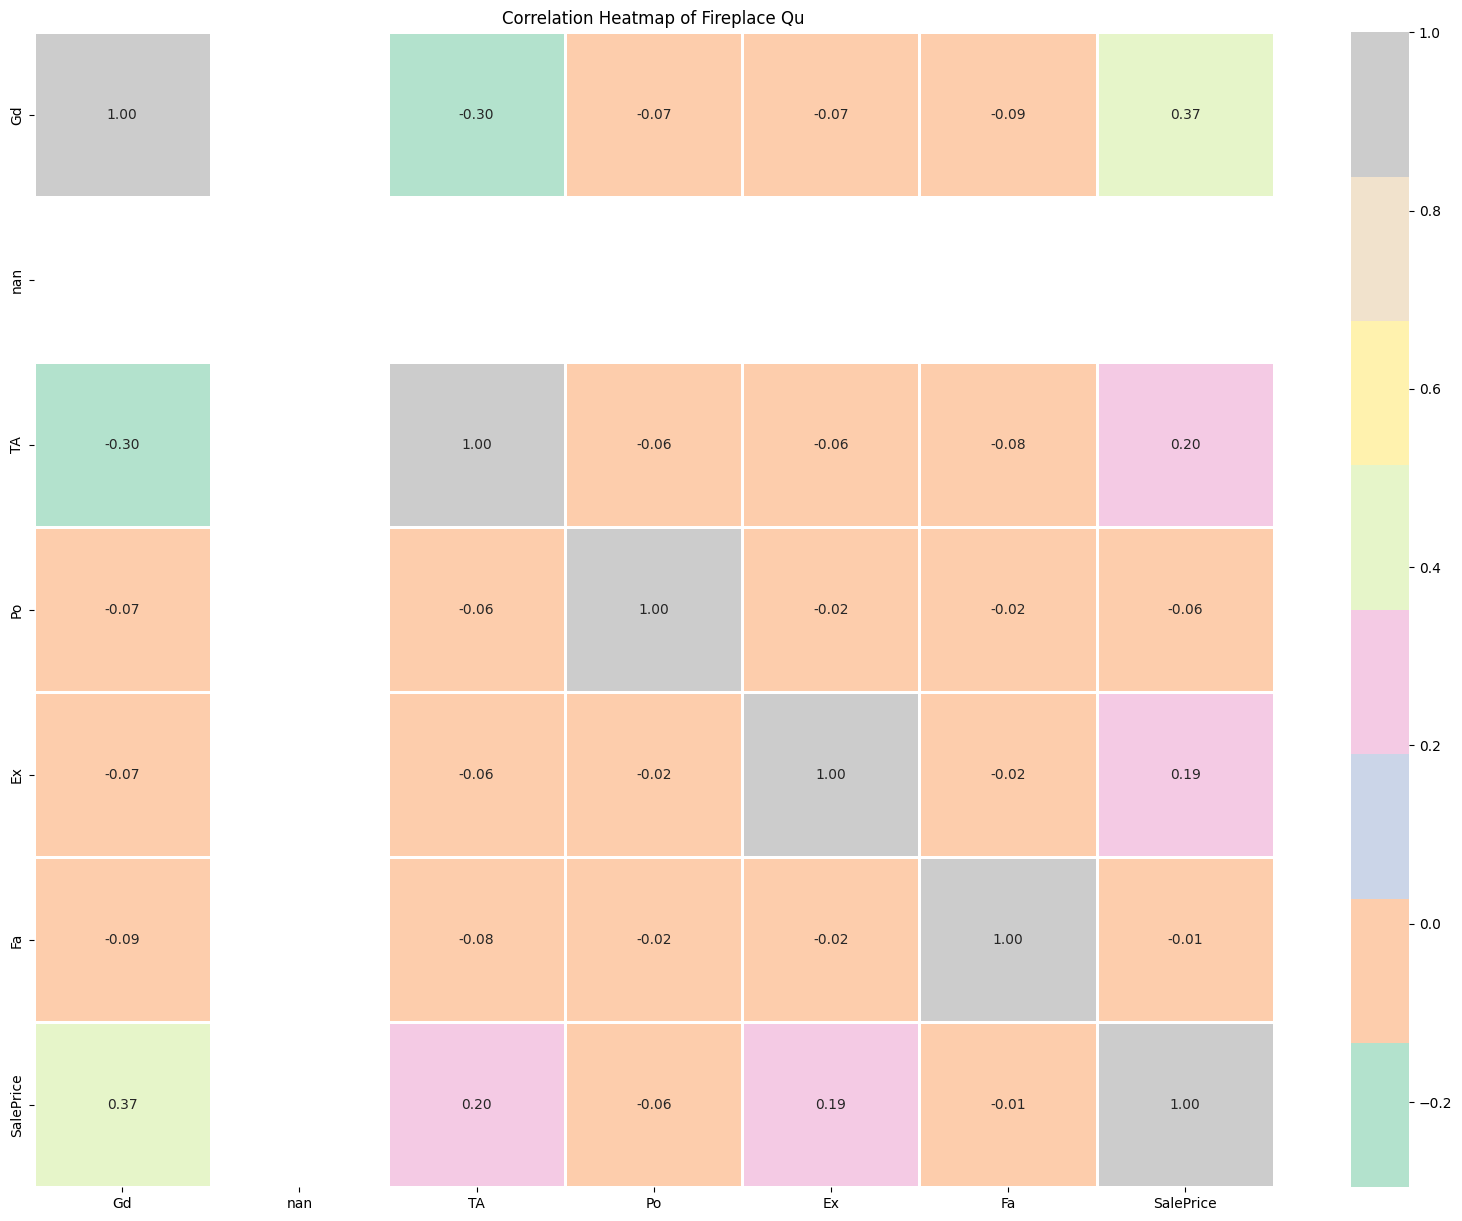

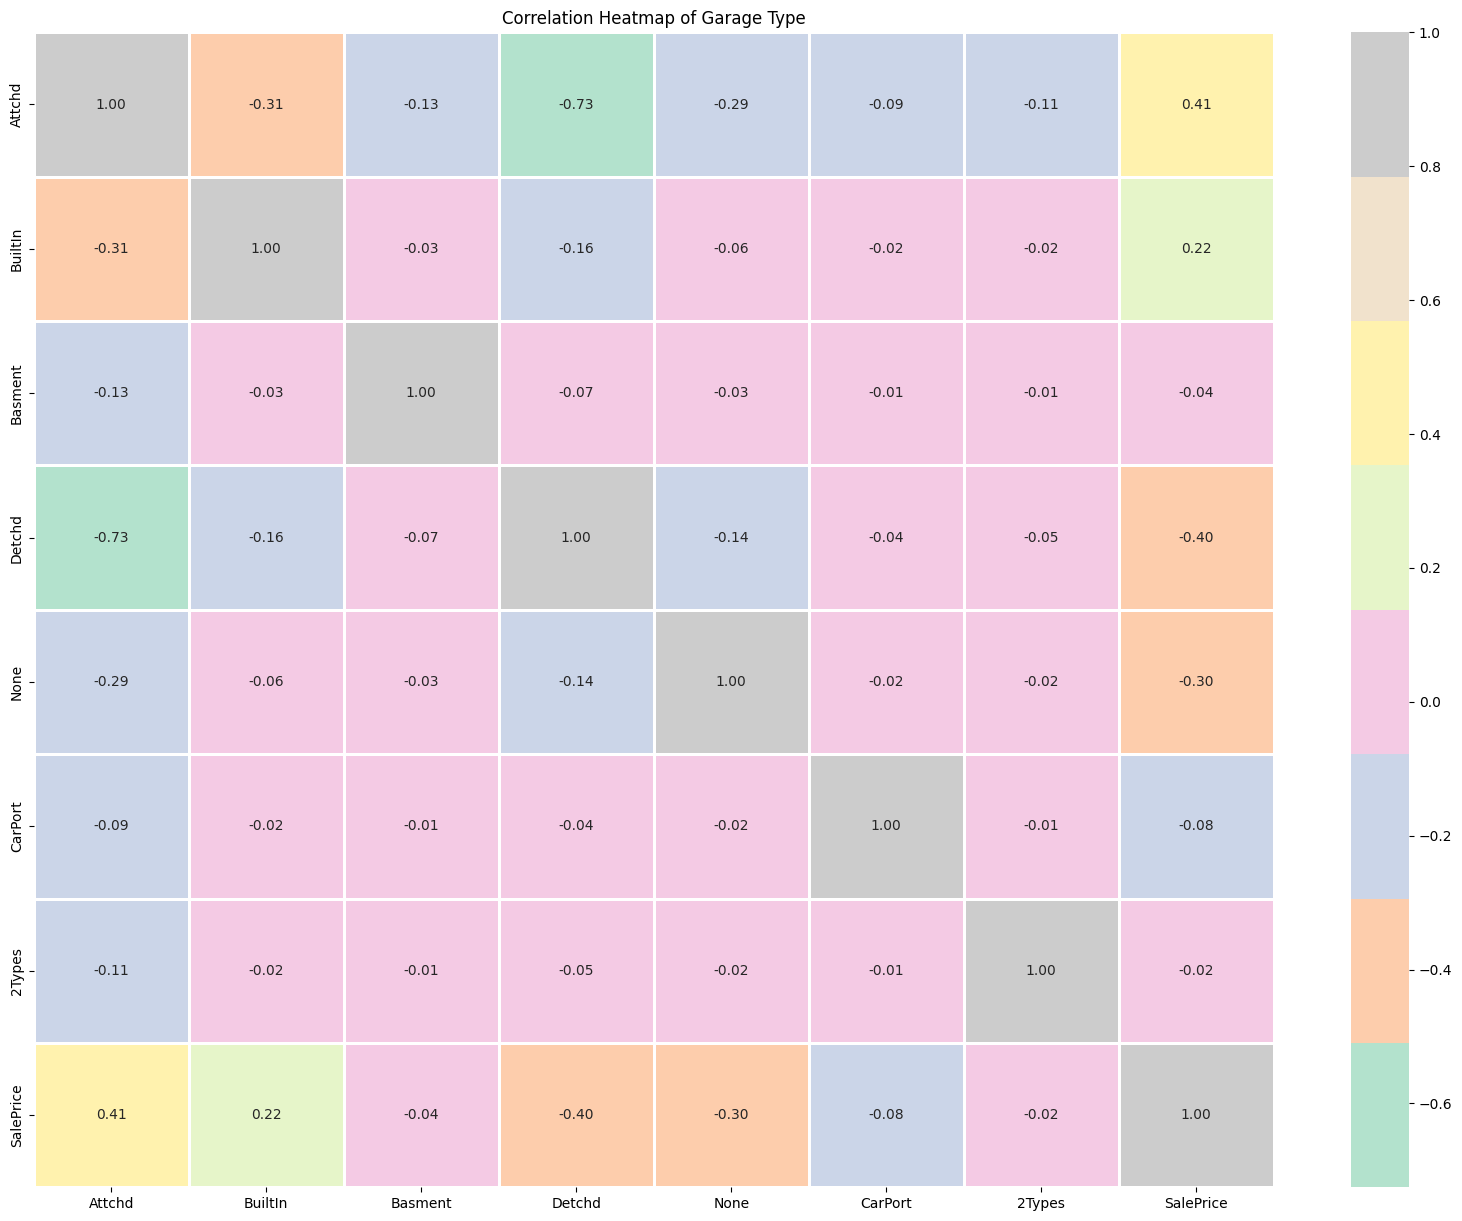

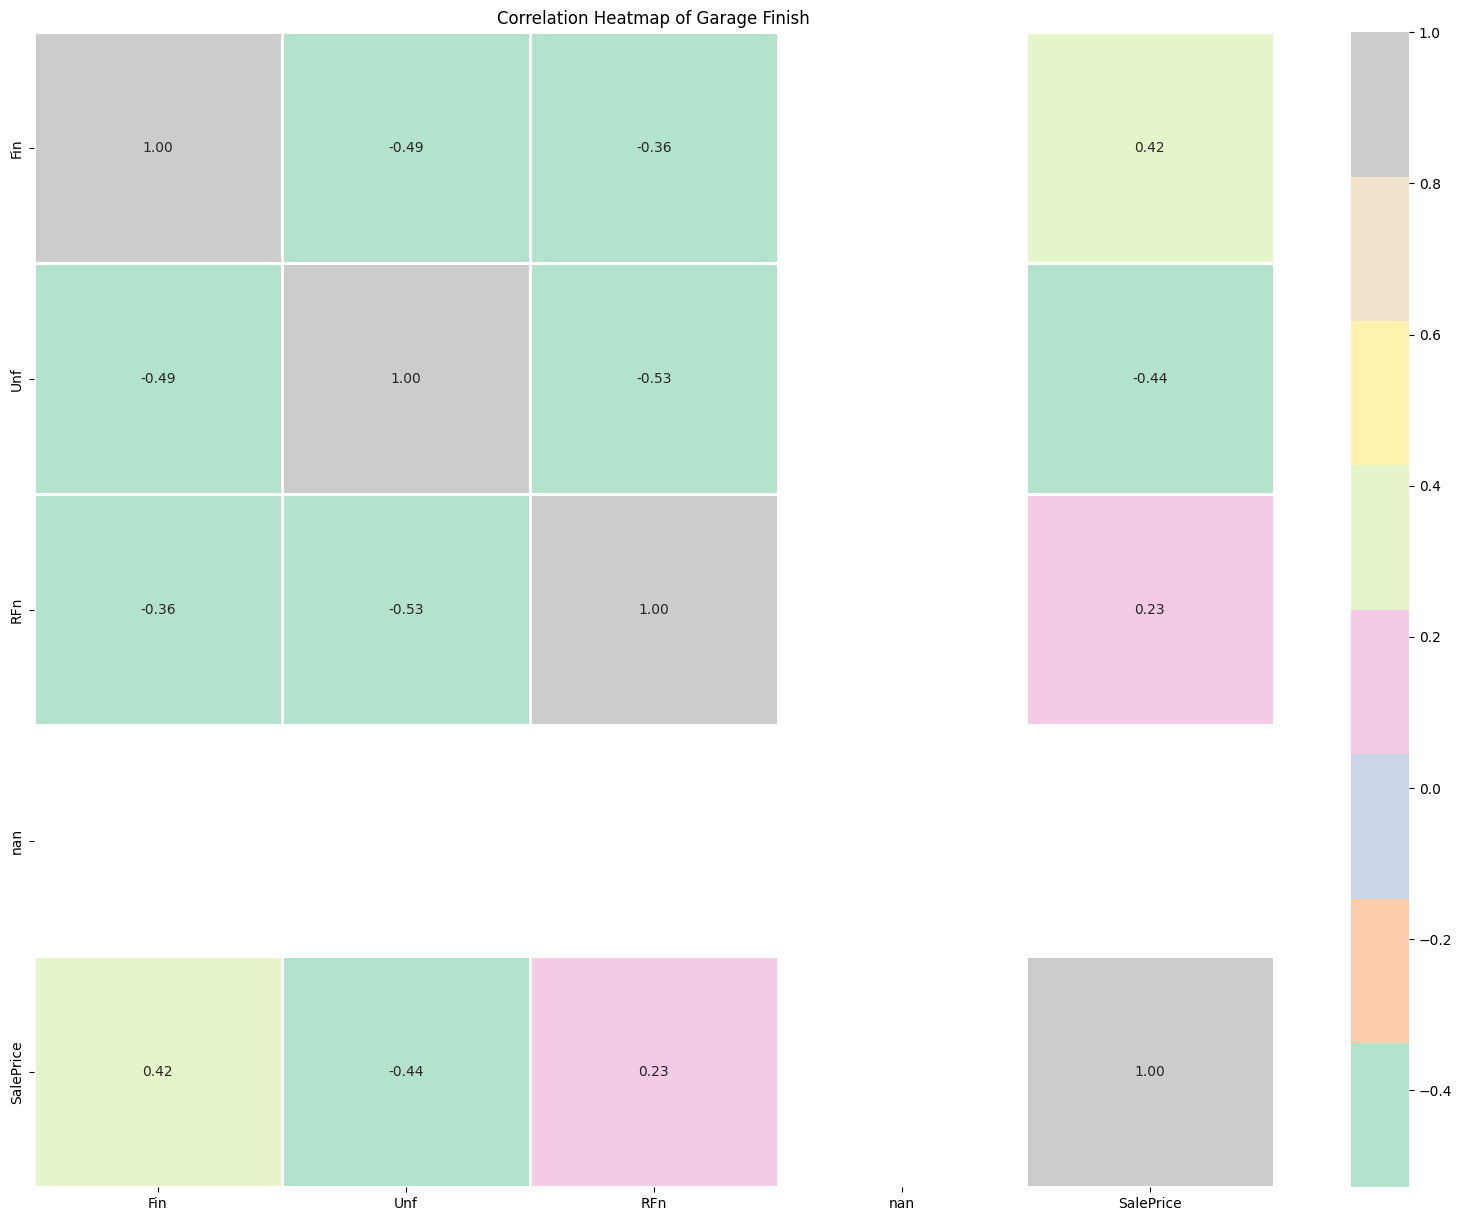

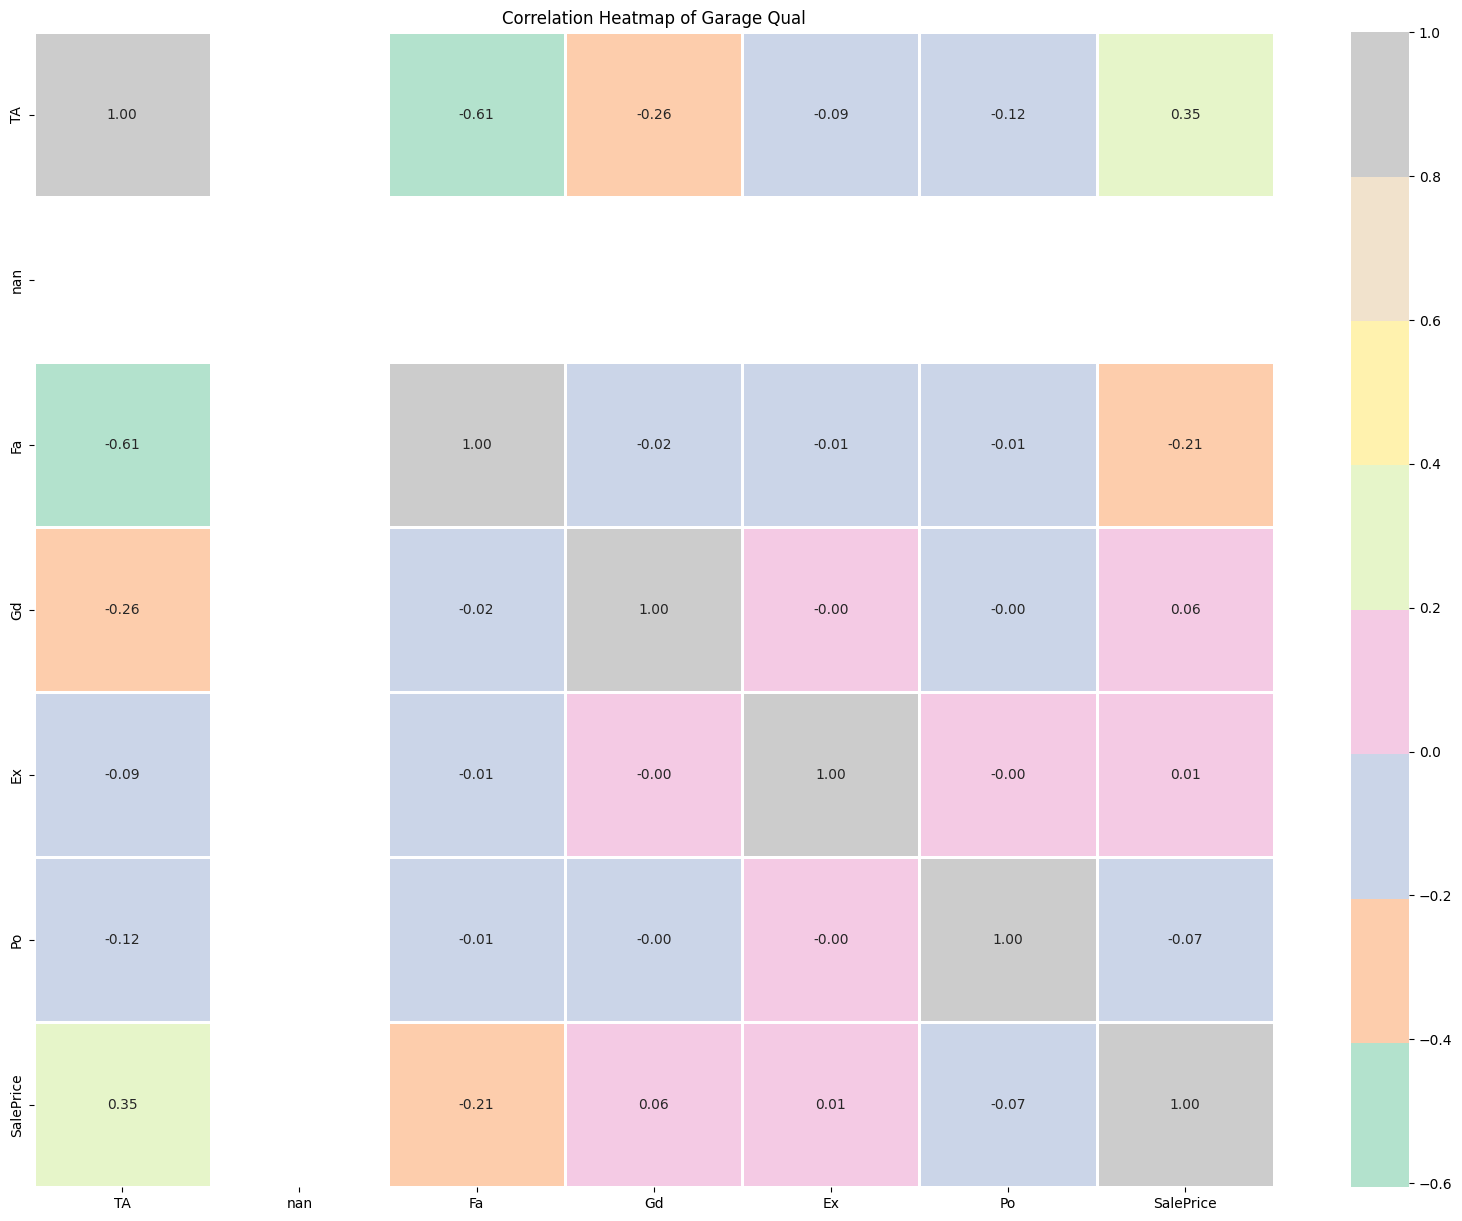

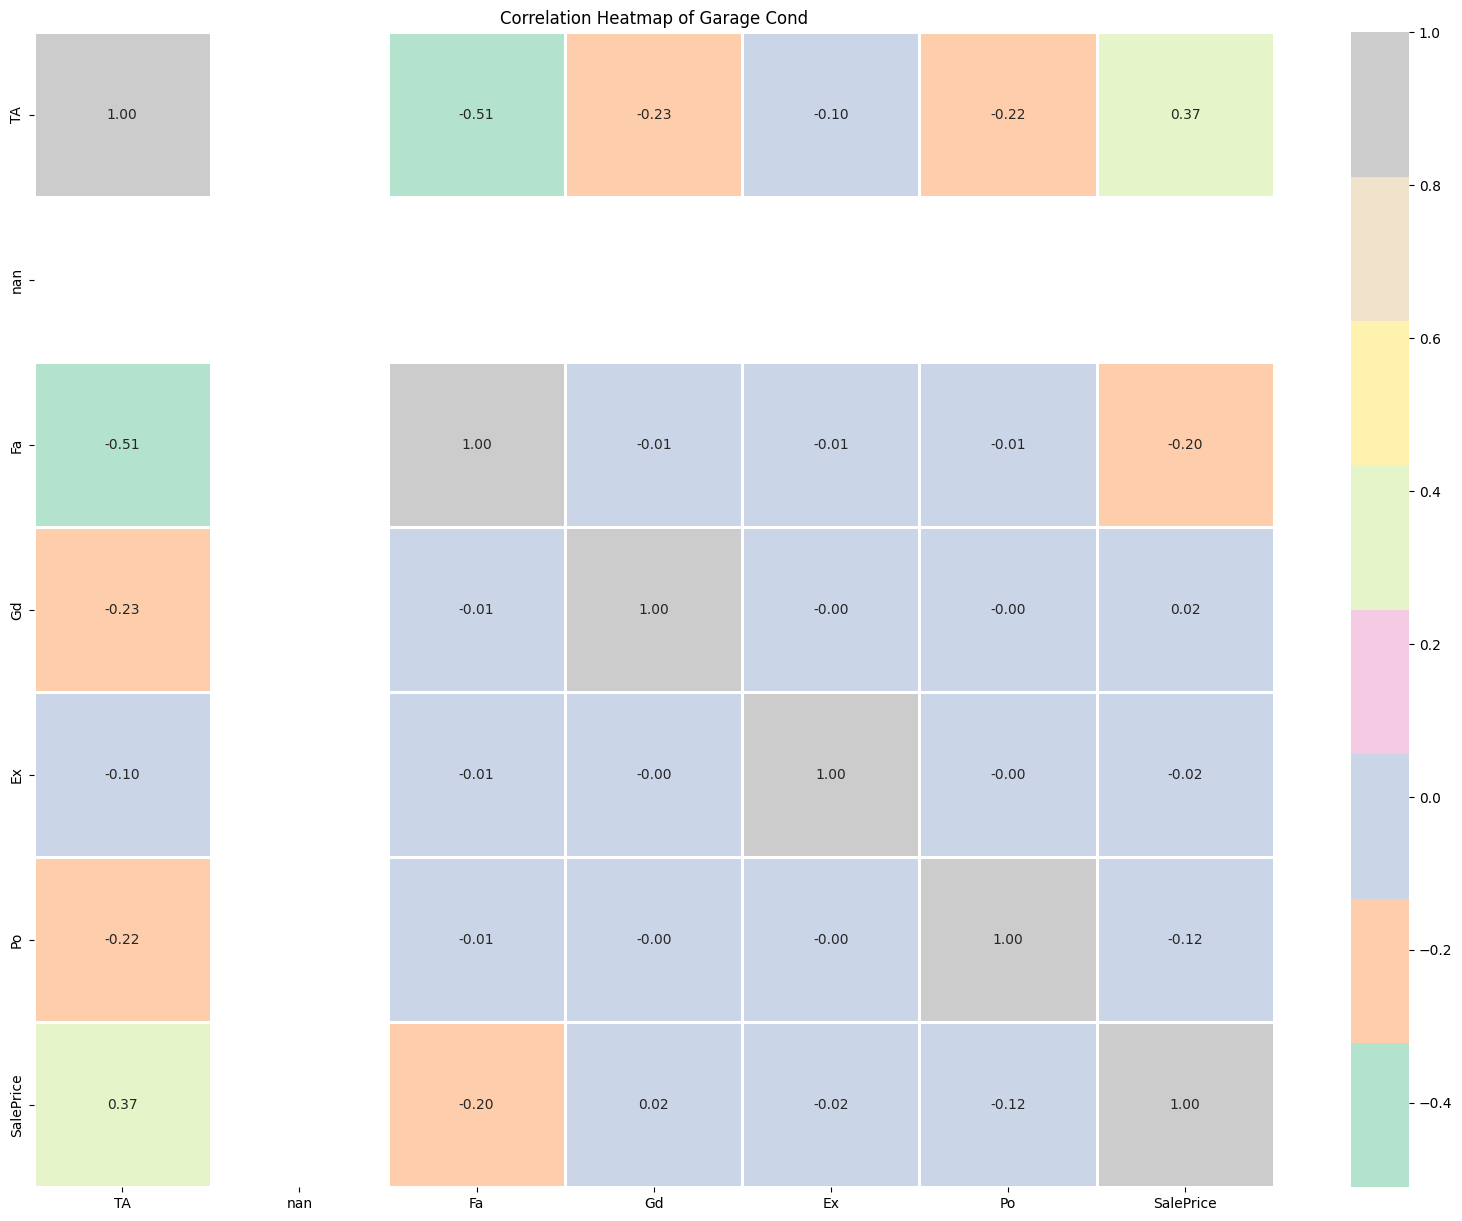

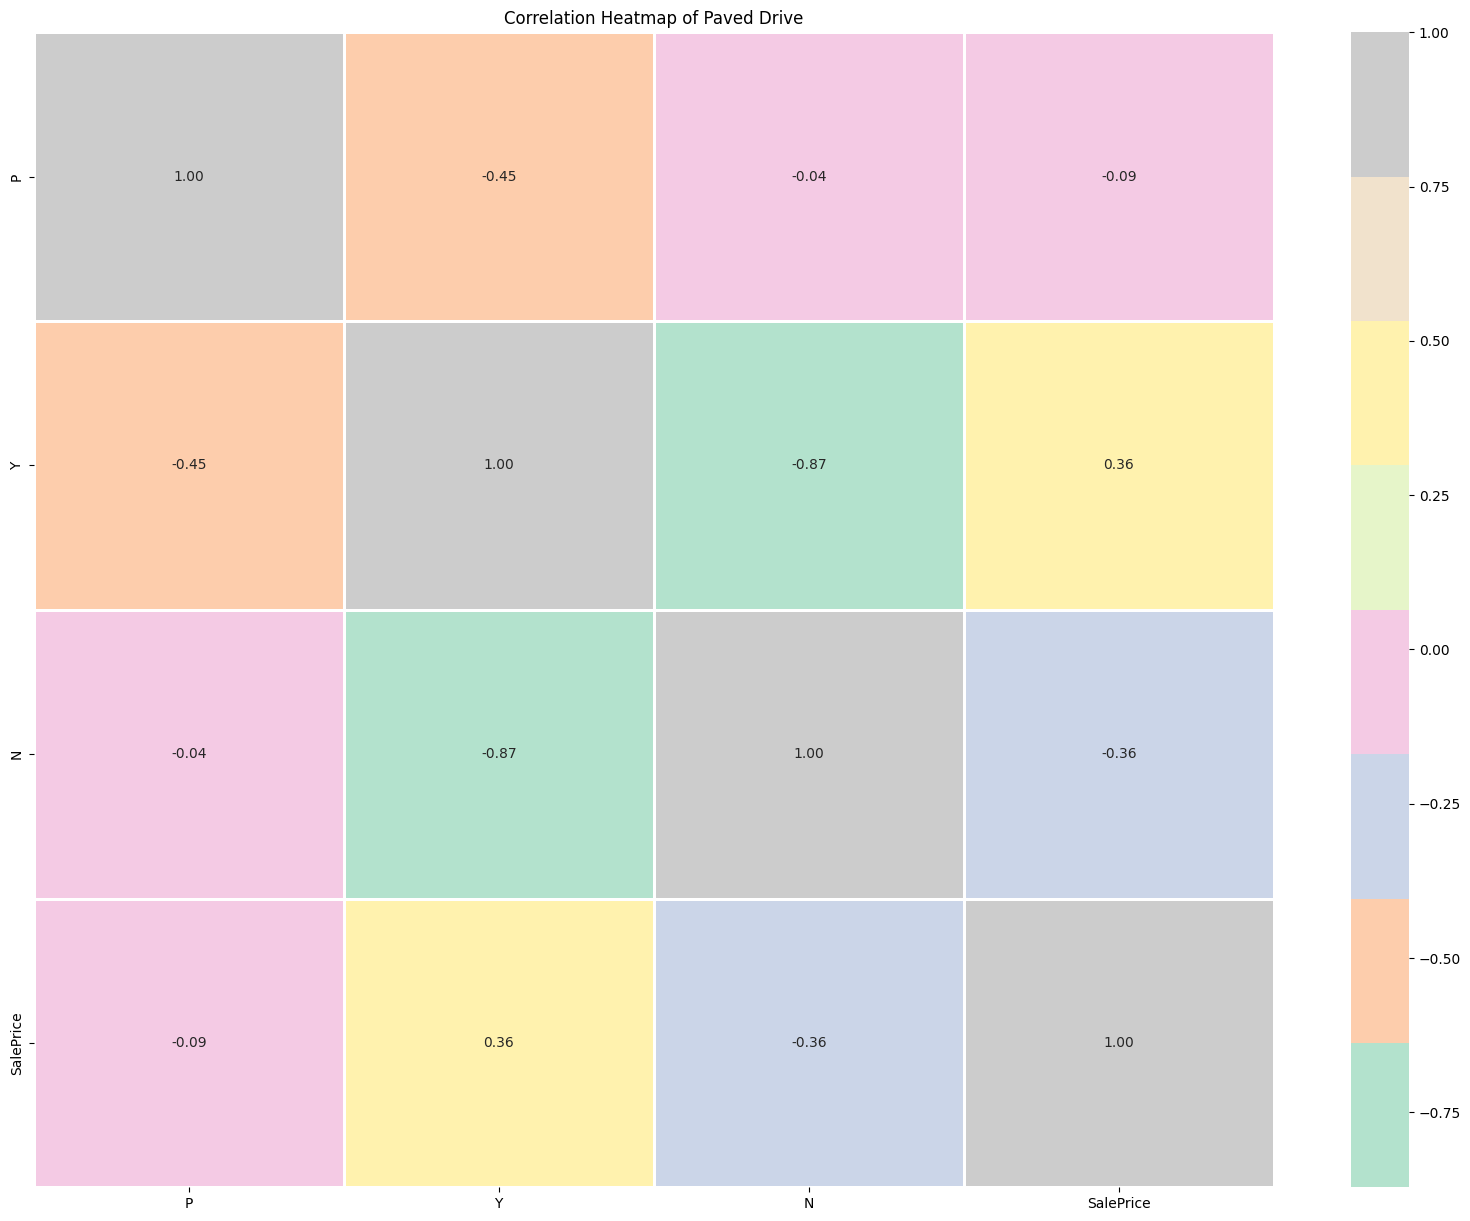

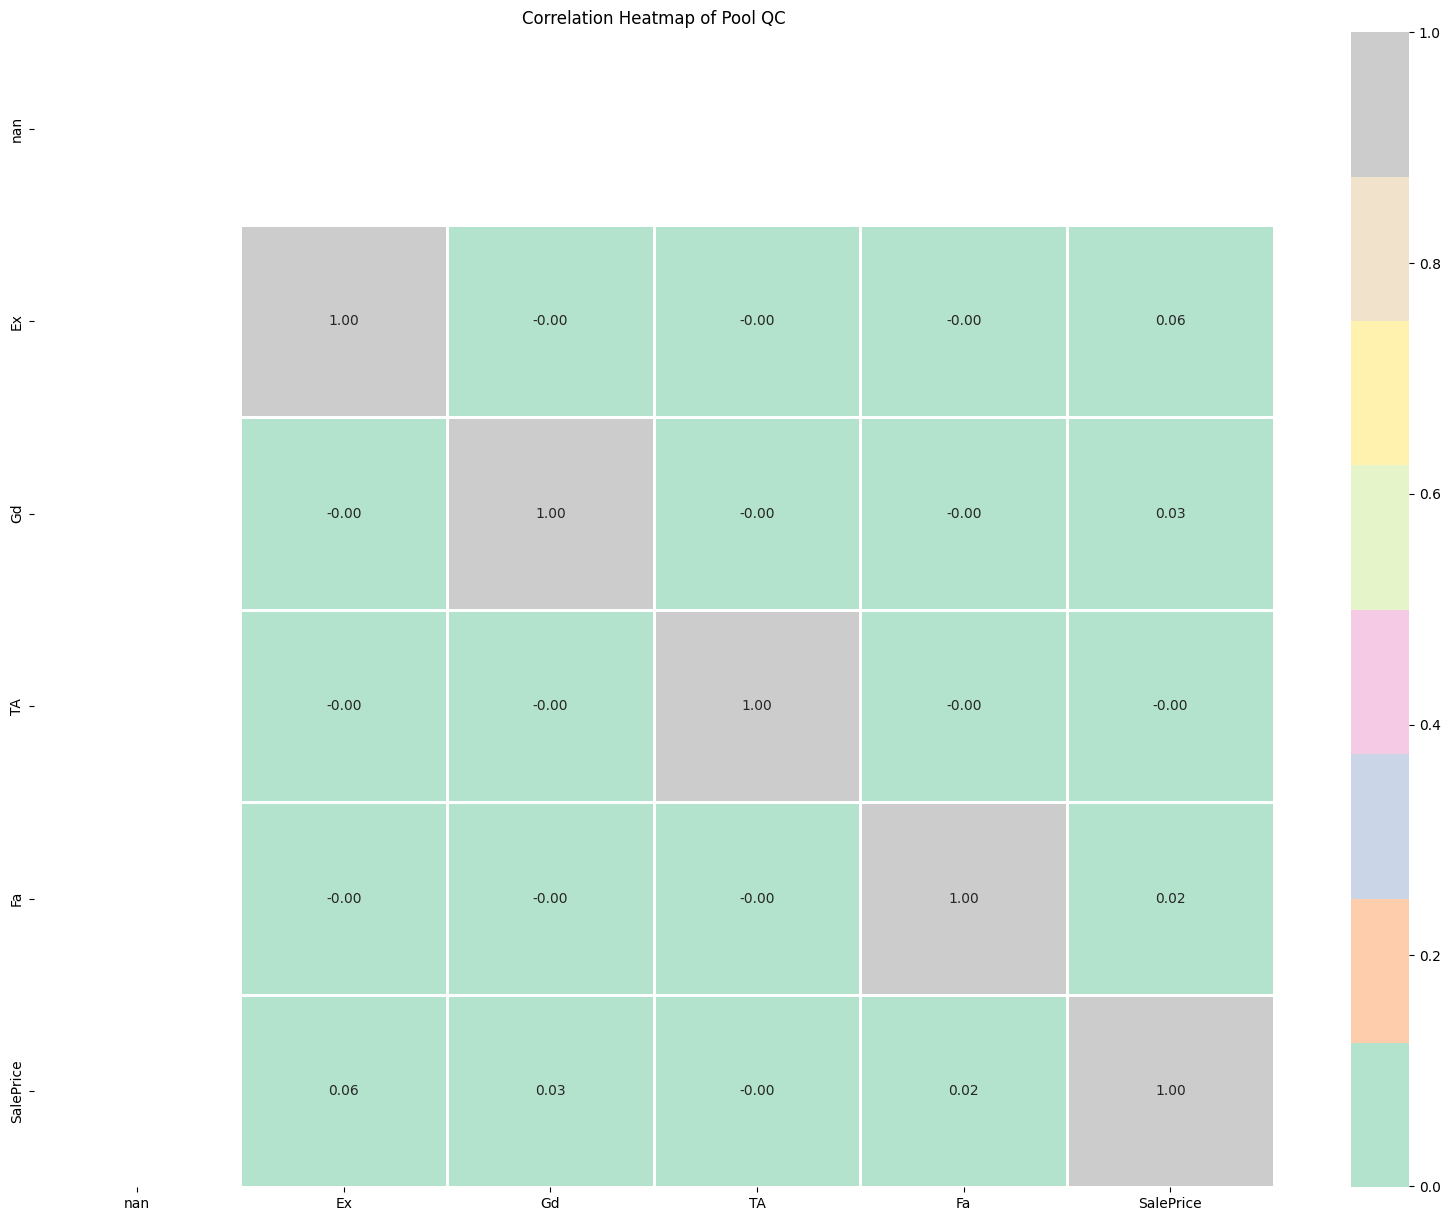

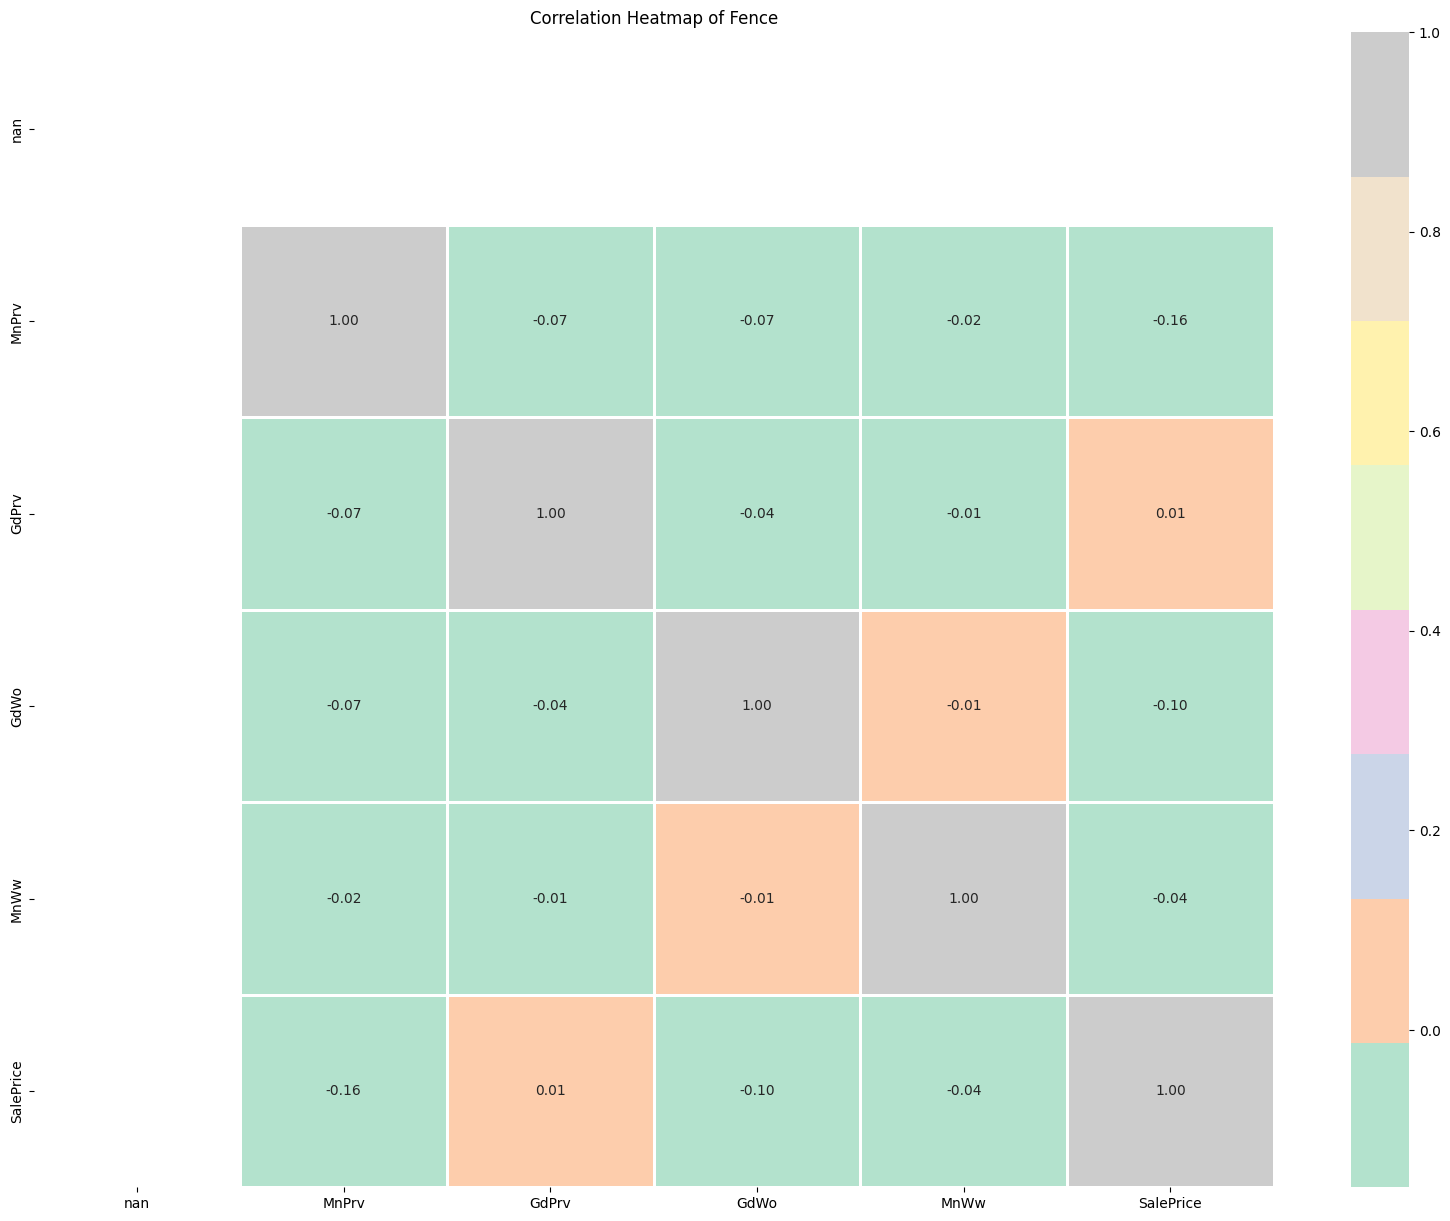

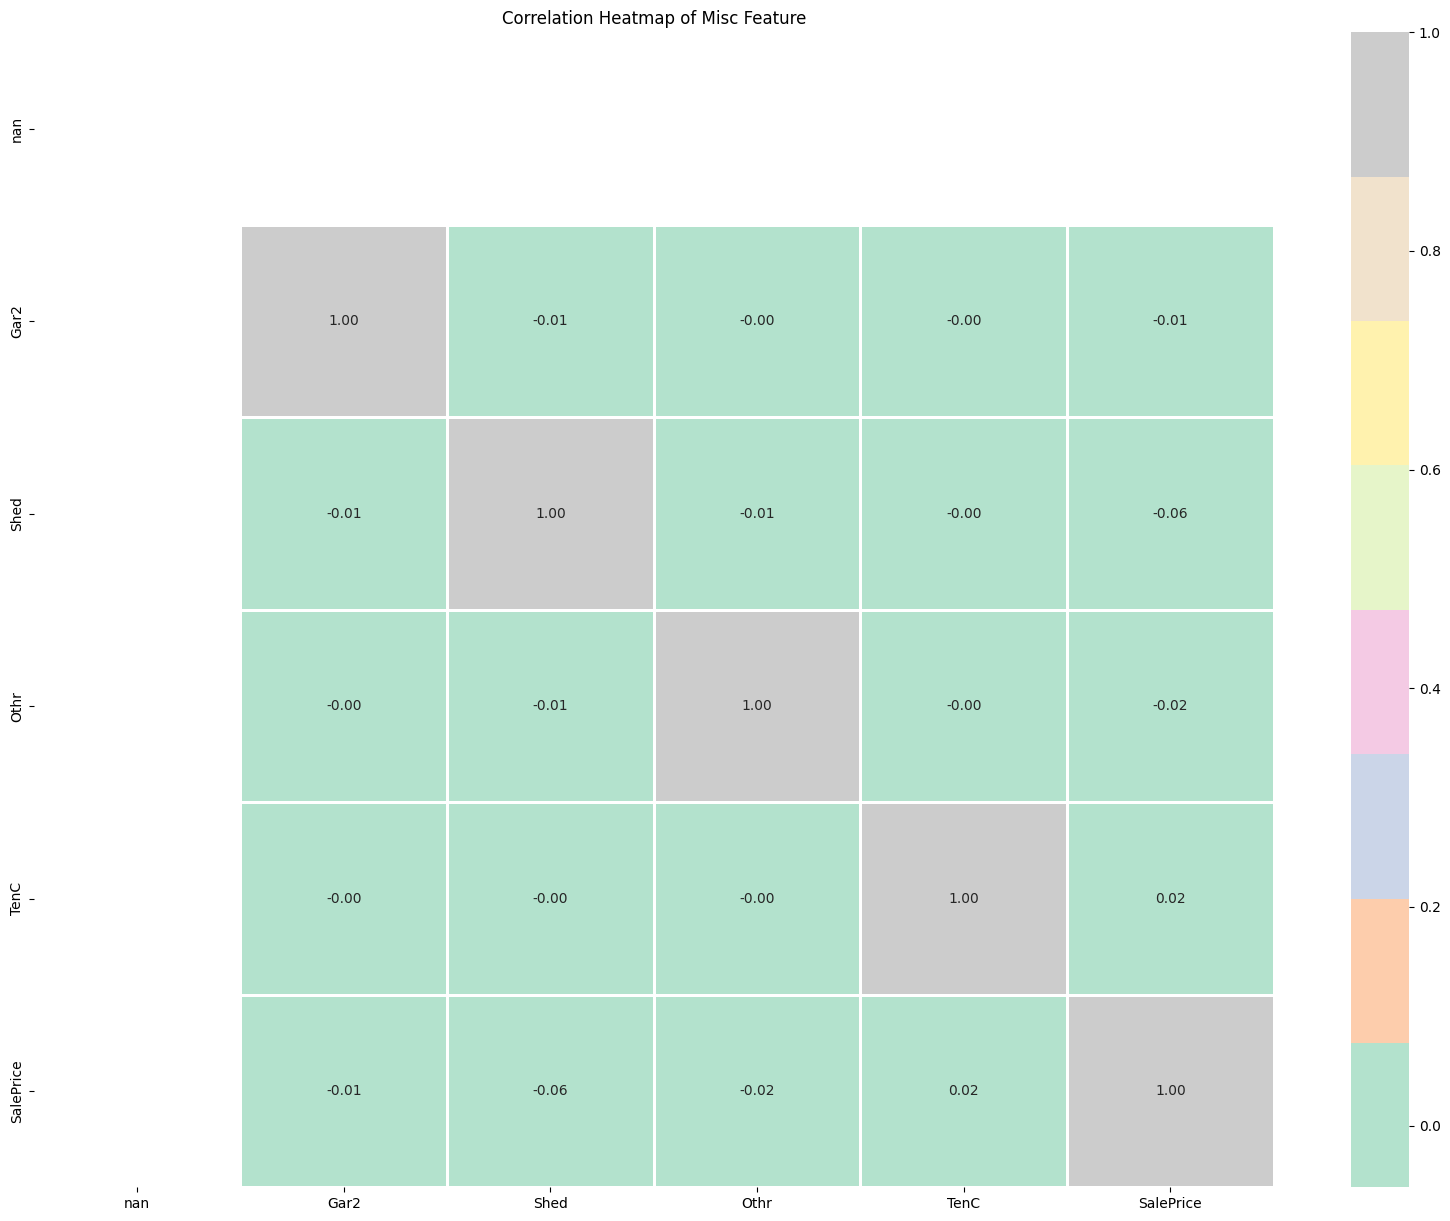

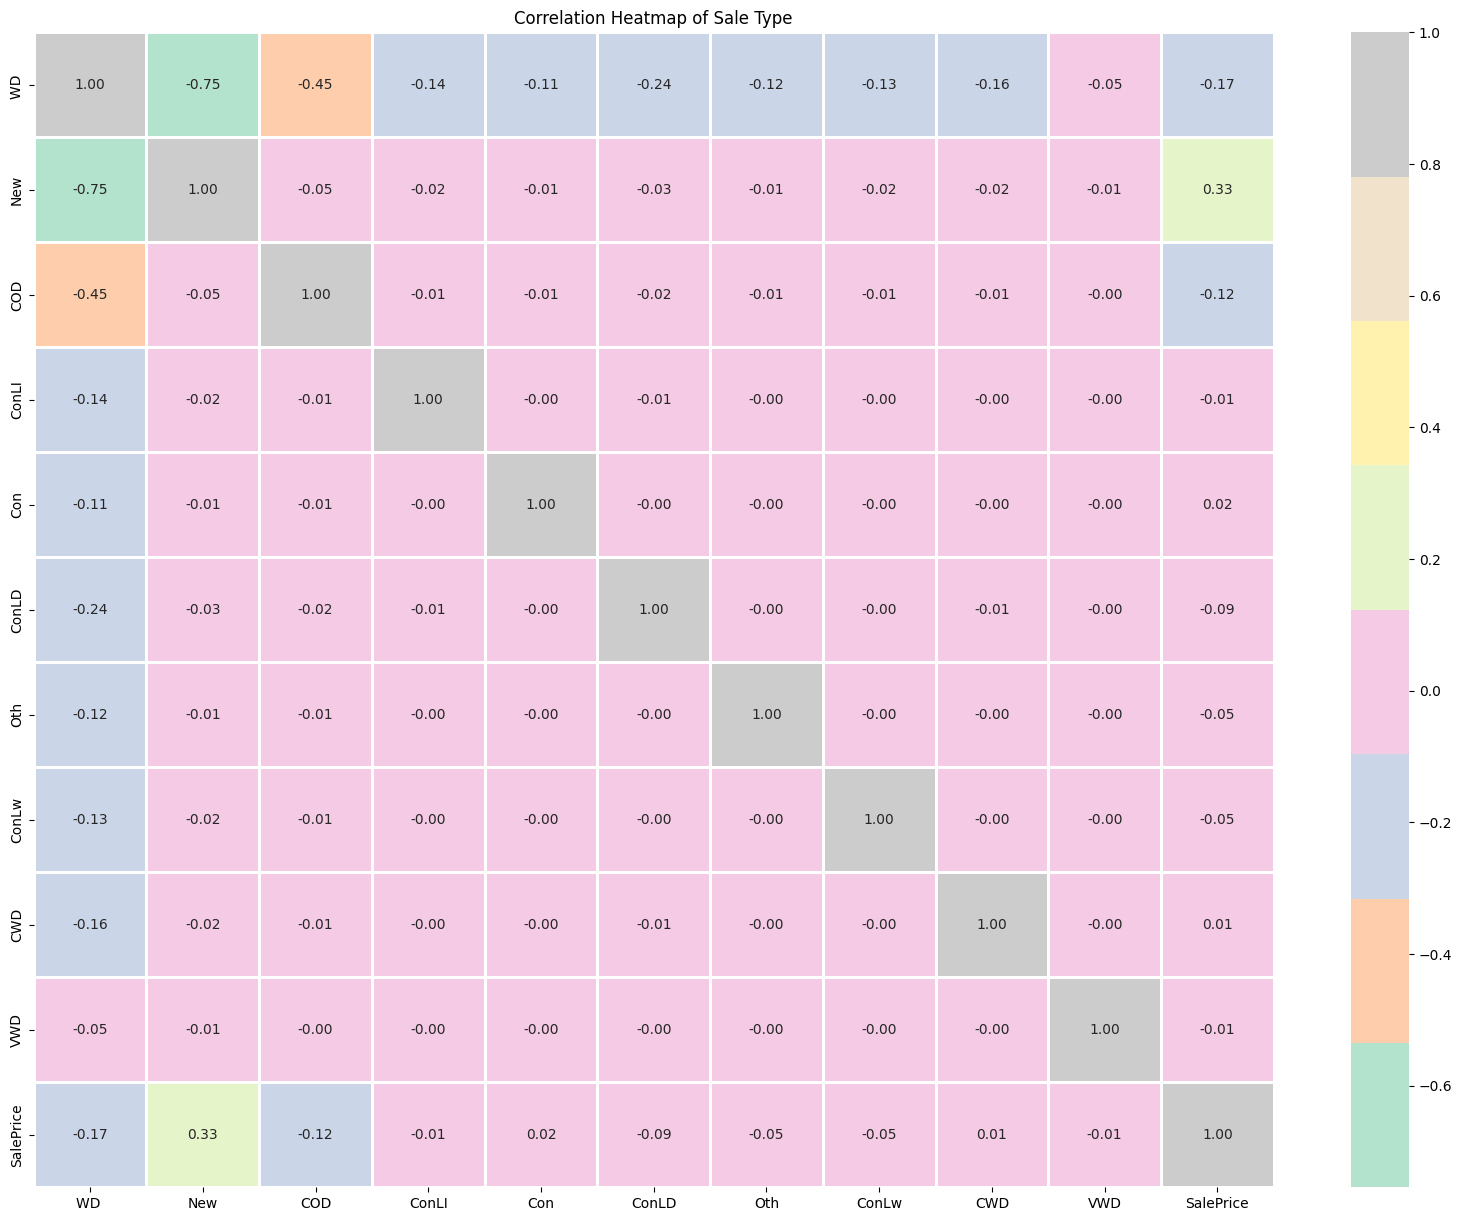

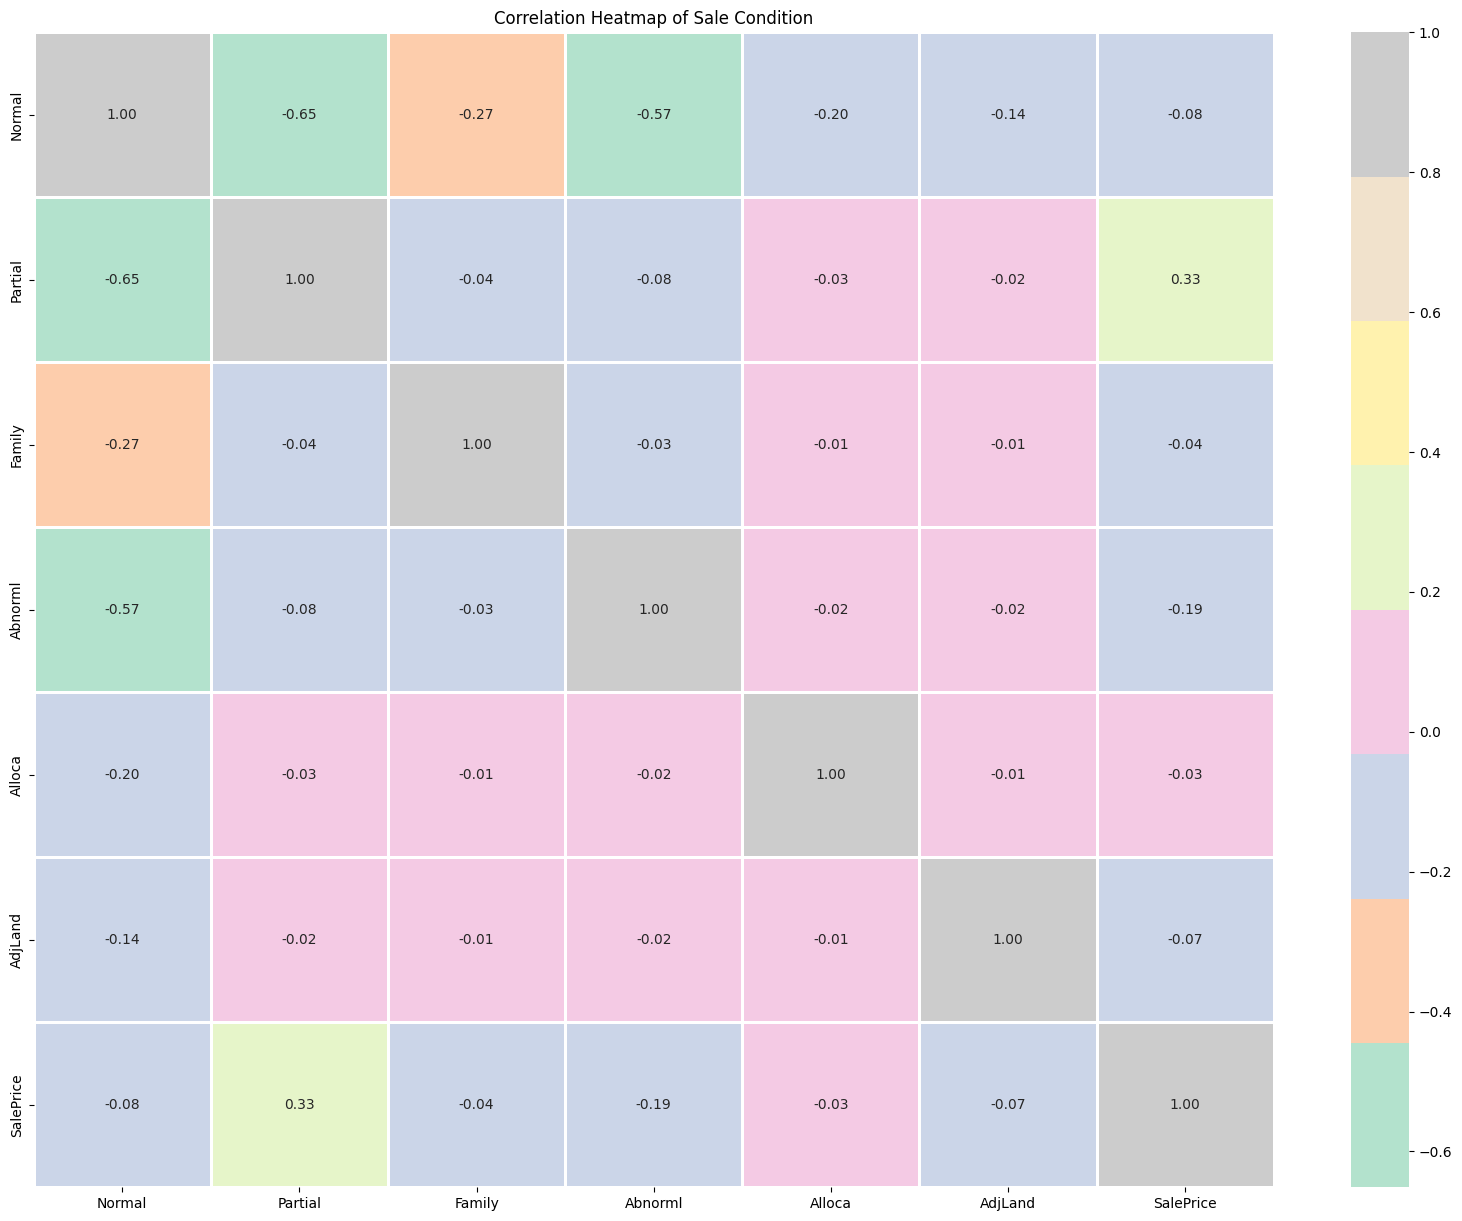

In [7]:
# Draw correlation matrix for all columns with categorical features
for column in data.columns:
    if data[column].dtype == object:
        encoding = apply_onehot_encoding(data[column])
        encoding["SalePrice"] = data["SalePrice"]
        draw_correlation_matrix(encoding, figsize=(20, 15), title="Correlation Heatmap of " + column)

### Feature extraction
Since Lasso automatically performs feature selection, selected features are encoded into categorical features and scale numeric.

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical features
numerical_features = ["Lot Frontage", "Lot Area", "Overall Qual", "Year Built",
                      "Year Remod/Add", "Gr Liv Area", "Total Bsmt SF", "Garage Cars", "Garage Area"]
categorical_features = ["Neighborhood", "MS Zoning", "Sale Type", "Sale Condition"]

# Preprocessing pipeline: Scale numeric & One-hot encode categorical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

### Splitting Data into Training & Testing Sets
Lasso Regression needs a separate train-test split to evaluate performance properly.

In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data[numerical_features + categorical_features]
y = data["SalePrice"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Lasso Regression Model
Lasso Regression helps in feature selection by shrinking irrelevant feature coefficients to zero.

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso

# Identify categorical and numerical features
numerical_features = ["Lot Frontage", "Lot Area", "Overall Qual", "Year Built",
                      "Year Remod/Add", "Gr Liv Area", "Total Bsmt SF", "Garage Cars", "Garage Area"]
categorical_features = ["Neighborhood", "MS Zoning", "Sale Type", "Sale Condition"]

# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),  # Fill missing values with median
        ("scaler", StandardScaler())  # Scale numerical features
    ]), numerical_features),
    
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill categorical NaNs with most common value
        ("encoder", OneHotEncoder(handle_unknown="ignore"))  # One-hot encoding
    ]), categorical_features)
])

# Define Lasso Regression pipeline
lasso_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(alpha=0.001, max_iter=10000))  # Regularization strength α
])

# Train the model
lasso_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Lot Frontage', 'Lot Area',
                                                   'Overall Qual', 'Year Built',
                                                   'Year Remod/Add',
                                                   'Gr Liv Area',
                                                   'Total Bsmt SF',
                                                   'Garage Cars',
                                                   'Garage Area']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Neighborhood', 'MS Zoning',
                                                   'Sale Type',
                                                   'Sale Condition'])])),
                ('lasso', Lasso(alpha=0.001, max_iter=10000))])

### Hyperparameter Tuning for Lasso
We need to optimize α (regularization strength) using GridSearchCV.

In [12]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for alpha tuning
param_grid = {"lasso__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Use GridSearch to find the best alpha value
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_["lasso__alpha"]
print(f"Optimal alpha for Lasso: {best_alpha}")

Optimal alpha for Lasso: 0.0001


### Model Evaluation: Test Performance on New Data
- Standard Model Metrics (RMSE, MAE, R² Score)
- Model Accuracy (Adjusted R², Percentage Error)
- Residual Analysis (Error Distribution, Homoscedasticity Check)
- Feature Importance Analysis (Which Features Matter Most?)
- Comparison Against Baseline Model (Does Lasso Perform Better?)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on train and test sets using lasso_pipeline
y_train_pred = lasso_pipeline.predict(X_train)
y_test_pred = lasso_pipeline.predict(X_test)

# Compute metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print("🔹 Model Performance Summary 🔹")
print(f"Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}, Test MAE: {mae_test:.2f}")
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")

🔹 Model Performance Summary 🔹
Train RMSE: 0.14, Test RMSE: 0.13
Train MAE: 0.10, Test MAE: 0.10
Train R²: 0.8740, Test R²: 0.9058


In [14]:
# Function to calculate Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

n_train, k_train = X_train.shape  # Number of samples & features
n_test, k_test = X_test.shape

adj_r2_train = adjusted_r2(r2_train, n_train, k_train)
adj_r2_test = adjusted_r2(r2_test, n_test, k_test)

print(f"Train Adjusted R²: {adj_r2_train:.4f}, Test Adjusted R²: {adj_r2_test:.4f}")

Train Adjusted R²: 0.8733, Test Adjusted R²: 0.9037


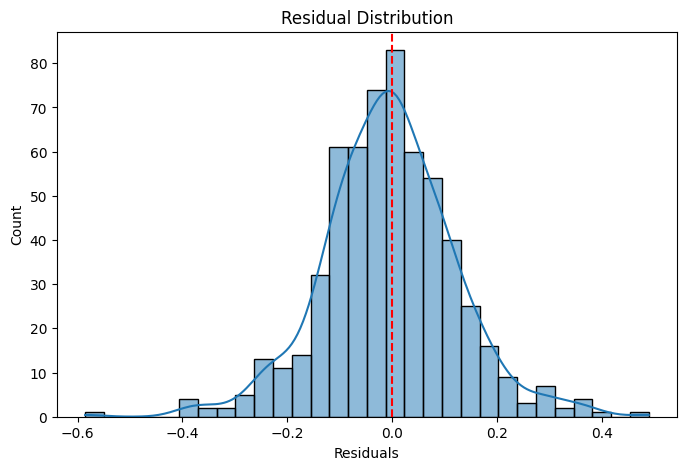

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals = y_test - y_test_pred

# Plot residual distribution
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color="red", linestyle="dashed")
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

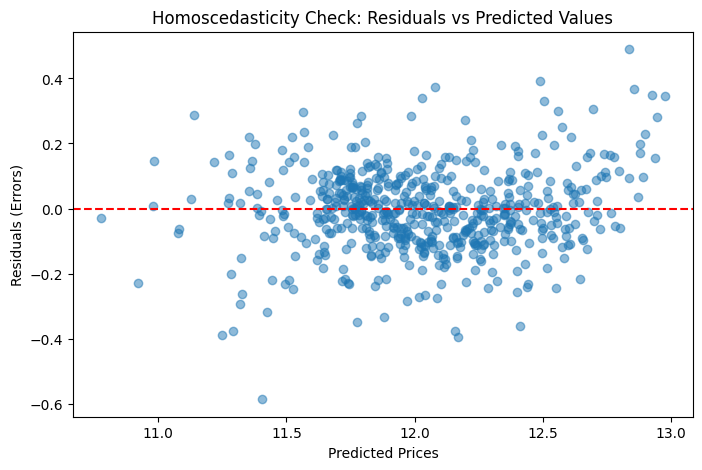

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="dashed")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Errors)")
plt.title("Homoscedasticity Check: Residuals vs Predicted Values")
plt.show()

### Feature Importance Analysis
Lasso automatically selects features by setting some coefficients to zero. Let's extract the most important features

C:\Users\gushi\AppData\Local\Temp\ipykernel_22960\1820775650.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Coefficient"][:10], y=feature_importance["Feature"][:10], palette="Blues_r")


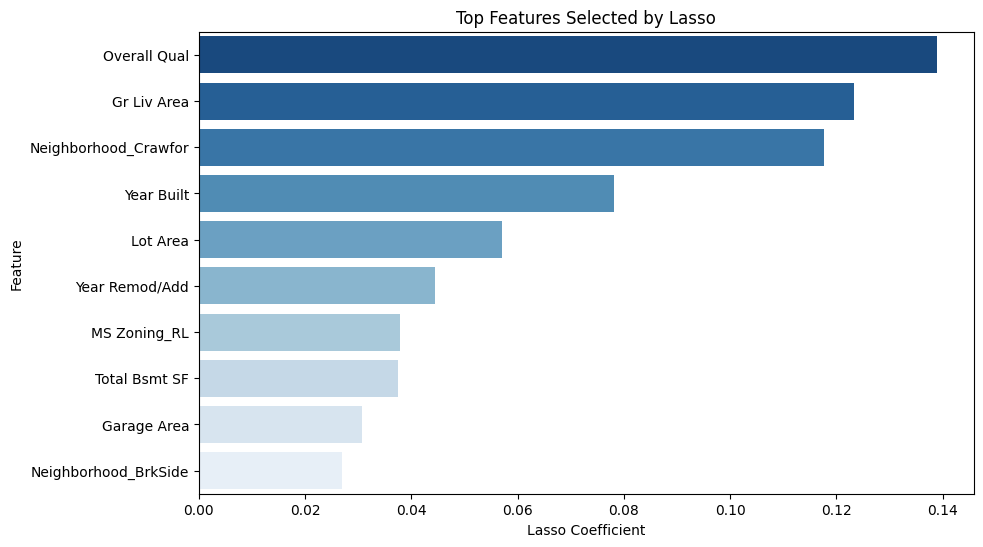

In [17]:
# Extract feature names from the pipeline
feature_names = (numerical_features + 
                 list(lasso_pipeline.named_steps["preprocessor"]
                      .named_transformers_["cat"]
                      .named_steps["encoder"]
                      .get_feature_names_out(categorical_features)))

# Extract Lasso coefficients
lasso_coef = lasso_pipeline.named_steps["lasso"].coef_

# Create DataFrame of feature importance
import pandas as pd
feature_importance = pd.DataFrame({"Feature": feature_names, "Coefficient": lasso_coef})
feature_importance = feature_importance[feature_importance["Coefficient"] != 0]  # Remove zero coefficients
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

# Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance["Coefficient"][:10], y=feature_importance["Feature"][:10], palette="Blues_r")
plt.xlabel("Lasso Coefficient")
plt.ylabel("Feature")
plt.title("Top Features Selected by Lasso")
plt.show()

In [22]:
from tabulate import tabulate

# Extract the top 10 features
top_features = feature_importance.head(10)

# Convert to a table format
table = tabulate(top_features, headers="keys", tablefmt="pretty")

# Print the table
print("🔹 Top 10 Features Selected by Lasso 🔹")
print(table)

🔹 Top 10 Features Selected by Lasso 🔹
+----+----------------------+----------------------+
|    |       Feature        |     Coefficient      |
+----+----------------------+----------------------+
| 2  |     Overall Qual     | 0.13893439081042544  |
| 5  |     Gr Liv Area      | 0.12326935070273203  |
| 15 | Neighborhood_Crawfor | 0.11759078748587691  |
| 3  |      Year Built      | 0.07811298963060961  |
| 1  |       Lot Area       | 0.05713596777260975  |
| 4  |    Year Remod/Add    | 0.04445908766464151  |
| 42 |     MS Zoning_RL     | 0.03783709356142723  |
| 6  |    Total Bsmt SF     | 0.03751338720597067  |
| 8  |     Garage Area      | 0.030766800738106576 |
| 12 | Neighborhood_BrkSide |  0.0269430962257468  |
+----+----------------------+----------------------+


In [18]:
# Compute baseline RMSE (Predicting the average house price)
y_baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline_pred))

print(f"Baseline RMSE (Mean Price Prediction): {baseline_rmse:.2f}")
print(f"Lasso RMSE: {rmse_test:.2f}")

improvement = 100 * (baseline_rmse - rmse_test) / baseline_rmse
print(f"Lasso Model Improves RMSE by: {improvement:.2f}%")

Baseline RMSE (Mean Price Prediction): 0.42
Lasso RMSE: 0.13
Lasso Model Improves RMSE by: 69.32%


In [19]:
print("🔹 Lasso Regression Model Summary 🔹")
print(f"✅ Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
print(f"✅ Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
print(f"✅ Train R²: {r2_train:.4f} | Test R²: {r2_test:.4f}")
print(f"✅ Train Adjusted R²: {adj_r2_train:.4f} | Test Adjusted R²: {adj_r2_test:.4f}")
print(f"✅ Baseline RMSE: {baseline_rmse:.2f} | Lasso RMSE Improvement: {improvement:.2f}%")

🔹 Lasso Regression Model Summary 🔹
✅ Train RMSE: 0.14 | Test RMSE: 0.13
✅ Train MAE: 0.10 | Test MAE: 0.10
✅ Train R²: 0.8740 | Test R²: 0.9058
✅ Train Adjusted R²: 0.8733 | Test Adjusted R²: 0.9037
✅ Baseline RMSE: 0.42 | Lasso RMSE Improvement: 69.32%


In [23]:
# Extract Lasso model parameters
lasso_model = lasso_pipeline.named_steps["lasso"]

print("🔹 Lasso Regression Model Attributes:")
print(f"Alpha (Regularization Strength): {lasso_model.alpha}")
print(f"Max Iterations: {lasso_model.max_iter}")
print(f"Tolerance: {lasso_model.tol}")
print(f"Feature Selection Strategy: {lasso_model.selection}")
print(f"Fit Intercept: {lasso_model.fit_intercept}")

🔹 Lasso Regression Model Attributes:
Alpha (Regularization Strength): 0.001
Max Iterations: 10000
Tolerance: 0.0001
Feature Selection Strategy: cyclic
Fit Intercept: True
